# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

**Business objective**
The business objective for this project is to develop a model that helps to identify key characteristics such as year, make, model, and mileage  that determine the price of used cars and, in the process, identify features that consumers value in a used car. 
Car dealerships can use this information to predict the price of used cars in the future and market the cars by highlighting features that matter,

**Business Goals**
- Increase Sales: By accurately predicting car prices, the dealership can price cars competitively to increase sales.
- Improve Customer Satisfaction: Providing fair and transparent pricing can enhance customer trust and satisfaction.
- Optimize Inventory Management: Understanding price determinants can help in better inventory management and procurement strategies.

**Business Success Criteria**
- Achieving a prediction accuracy of at least 80%.
- Reducing the time taken to price a used car by 50%.
- Increasing the sales conversion rate by 20%.

**Data Analysis Goals**
- Identify the key factors that influence the price of used cars.
- Develop a machine learning model to predict car prices.
- Validate the model using historical data and refine it for better accuracy.

**Data Analysis Plan**
- Step 1: Exploratory Data Analysis 
- Step 2: Data Cleaning and Prep
- Step 3: Model Development, Evaluation and Refinement
- Step 4: Deployment 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

**Vehicle Data Information**
- Data had over 426K rows of data 
- 18 columns of data - 3 numeric and rest categorical
- price is the target

**Vehicle Data quality findings**
- Vehicle Price data had outliers - 0 price and very high price value
- Vehicle odometer had outliers - vehicles with very high mileage 
- Year data - too wide a range from 1900 to 2022 
- Model data on vehicles also had variations with counts less than 10

**Vehicle data - findings on distribution of price**
- After filtering outlier prices, the prices are not normally distributed
- The mean price of the vehicle data is around $17K, price ranges from $500 to $44500

**Vehicle data - findings on feature columns**
- Odometer - mileage
  - After filtering out the outliers the mileage data is not normally distributed
  - The mean mileage of the vehicle data is around 90K miles, miles range from 0 to 280K
- Vehicle -Manufacturer
  - Ford, Chevrolet and Toyota are the three most represented manufacturers
  - Average price of Tesla, Alfa Romeo and Ram are the highest while Mercury and Saturn are cheapest
- Vehicle Model
  - F150, Silverado and 1500 are the most popular models
  - Average price of 1500 crew cab big horn, camaro ss coupe, Silverado 1500 crew are highest
  - Average price of focus, versa and liberty are the cheapest
- Vehicle Year
  - Most of the cars are from 2012 to 2017
  - Average price of cars increase as the manufacturing year of the car increases from 2000 to 2020
  - However average price of car falls for 2021 and 2022, may be driven by mix of vehicles
- Vehicle Cylinders
  - Most of the cars are 4,6 and 8 cylinders
  - Average price of cars are much higher for 6,8,10 and 12 cylinder cars as compared to 4 cylinder cars
- Vehicle Fuel
  - Most vehicles are gas powered
  - Average price of gas powered vehicles are less than diesel and electric
- Vehicle Fuel
  - Most vehicles are full-sized 
  - Average price of full-sized vehicles are highest
  - Average price of mid-sized, compact and sub-compact are very similar
- Vehicle condition
  - Most vehicles are in good or excellent condition
  - Average price of vehicles in fair and salvage condition is significantly less than others
- Vehicle Type
  - Most vehicles are SUV and Sedans
  - Average price of "pick up" is highest while "mini-van" is the lowest
- Vehicle Transmission
  - Most vehicles have automatic transmission
  - Average price of vehicles with "other" type of transmission is significantly higher
- Vehicle Drive
  - Most vehicles are 4wd and fwd
  - Average price of 4wd and fwd vehicles are similar and they are higher than rwd vehicles
- Vehicle Paint
  - Most vehicles are white, black and silver
  - Average price of white and black vehicles are highest while green is lowest
- Vehicle Title
  - Most vehicles have clean title
  - Average price of vehicles with clean and lien title are much higher than the rest
- Vehicle State
  - Most vehicles are from CA, FL and TX while DE, WY, ND have the fewest
  - Average price of vehicles in MT, AK and WV are the highest while CT and NJ have the lowest average price
- Vehicle Region
  - Number of vehicles across regions range from 2000 to 3000
  - Most vehicles are from Columbus and Omaha/ Council Bluffs region
  - Average price of vehicles in Bakersfield and Columbia/Jeff City are the highest
  - Average price of vehicles in Philadelphia and Milwaukee are the lowest


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [16]:
vehicles_data = pd.read_csv('data/vehicles.csv')
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [17]:
null_counts = vehicles_data.isnull().sum()
print(null_counts)

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [18]:
min_price=vehicles_data['price'].min()
max_price=vehicles_data['price'].max()
mean_price=vehicles_data['price'].mean()
print(f"The min price {min_price}")
print(f"The max price is {max_price}")
print(f"The mean price is {mean_price}")
print(f"The median price is {mean_price}")

The min price 0
The max price is 3736928711
The mean price is 75199.0331873126
The median price is 75199.0331873126


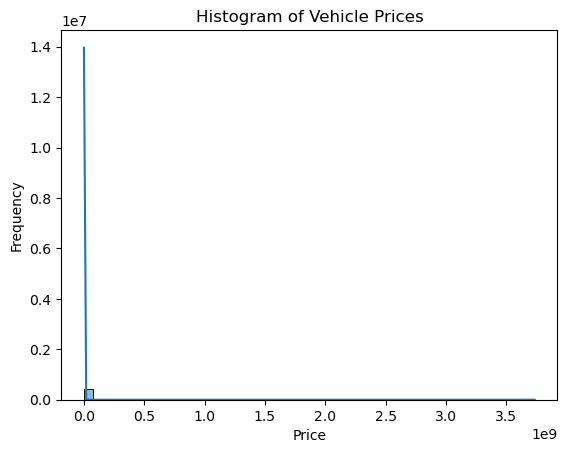

In [235]:
sns.histplot(vehicles_data['price'], bins=50, kde=True)
plt.title('Histogram of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [20]:
lower_bound =vehicles_data['price'].quantile(0.10)
upper_bound = vehicles_data['price'].quantile(0.95)
print(f"The lower bound for the price is {lower_bound}")
print(f"The upper bound for the price is {upper_bound}")
filtered_data = vehicles_data[
    (vehicles_data['price'] >= lower_bound) & 
    (vehicles_data['price'] <= upper_bound)
]
filtered_data = filtered_data.sort_values(by='price', ascending=True)
mean_price=filtered_data['price'].mean()
print(f"The mean price of vehicle is {mean_price}")

The lower bound for the price is 500.0
The upper bound for the price is 44500.0
The mean price of vehicle is 17026.902430703623


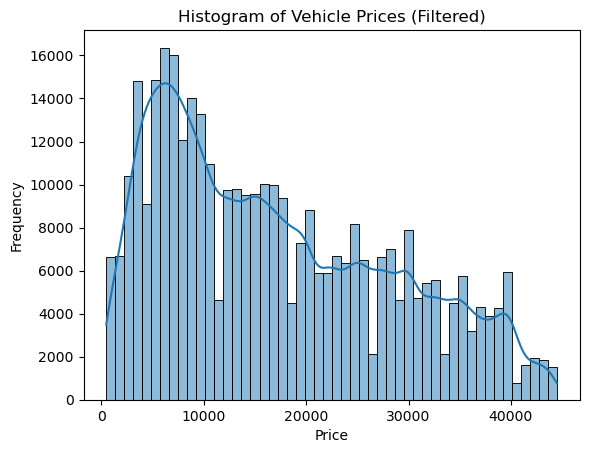

In [21]:
#filtered_data = vehicles_data[vehicles_data['price'] < 100000]  # Adjust the threshold as needed
sns.histplot(filtered_data['price'], bins=50, kde=True)
plt.title('Histogram of Vehicle Prices (Filtered)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

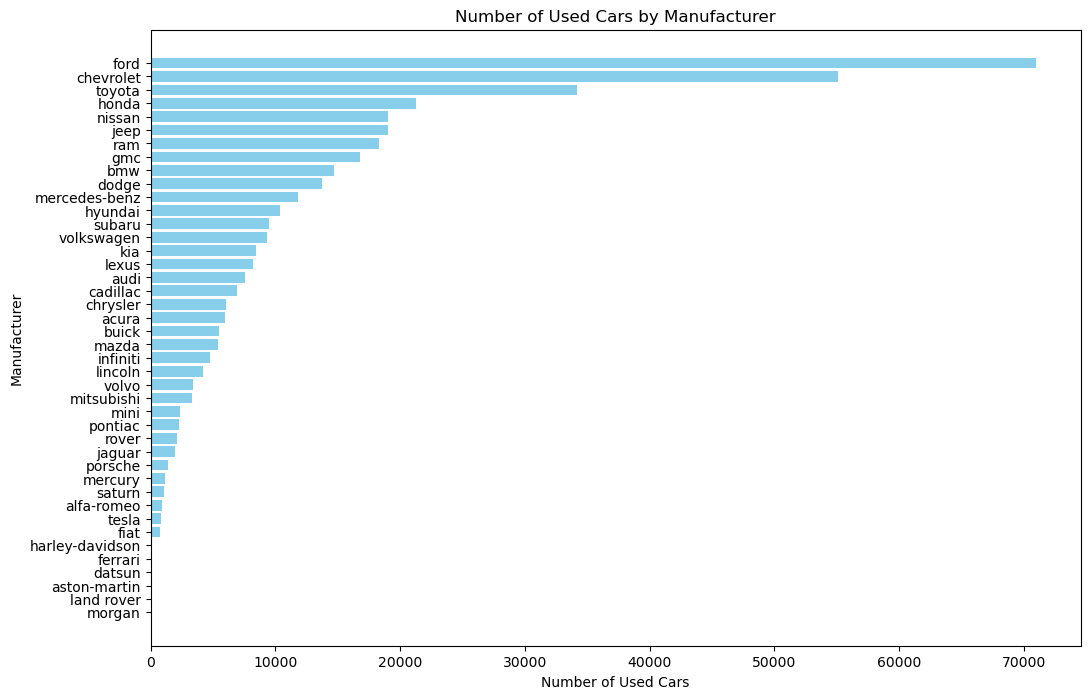

In [22]:
manufacturer_counts = vehicles_data['manufacturer'].value_counts().reset_index()
manufacturer_counts.columns = ['manufacturer', 'count']
plt.figure(figsize=(12, 8))
plt.barh(manufacturer_counts['manufacturer'], manufacturer_counts['count'], color='skyblue')
plt.xlabel('Number of Used Cars')
plt.ylabel('Manufacturer')
plt.title('Number of Used Cars by Manufacturer')
plt.gca().invert_yaxis()  # Invert y-axis to have the manufacturer with the highest count at the top
plt.show()

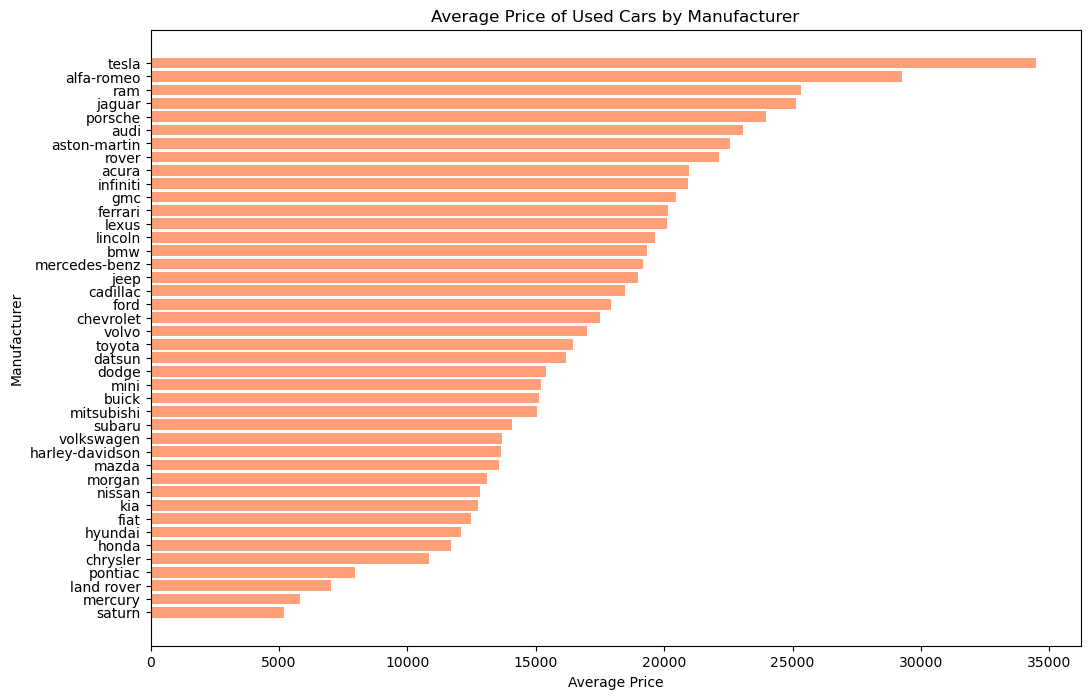

In [23]:
avg_price_by_manufacturer = filtered_data.groupby('manufacturer')['price'].mean().reset_index()
avg_price_by_manufacturer = avg_price_by_manufacturer.sort_values(by='price', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(avg_price_by_manufacturer['manufacturer'], avg_price_by_manufacturer['price'], color='lightsalmon')
plt.xlabel('Average Price')
plt.ylabel('Manufacturer')
plt.title('Average Price of Used Cars by Manufacturer')
plt.gca().invert_yaxis()  # Invert y-axis to have the manufacturer with the highest average price at the top
plt.show()

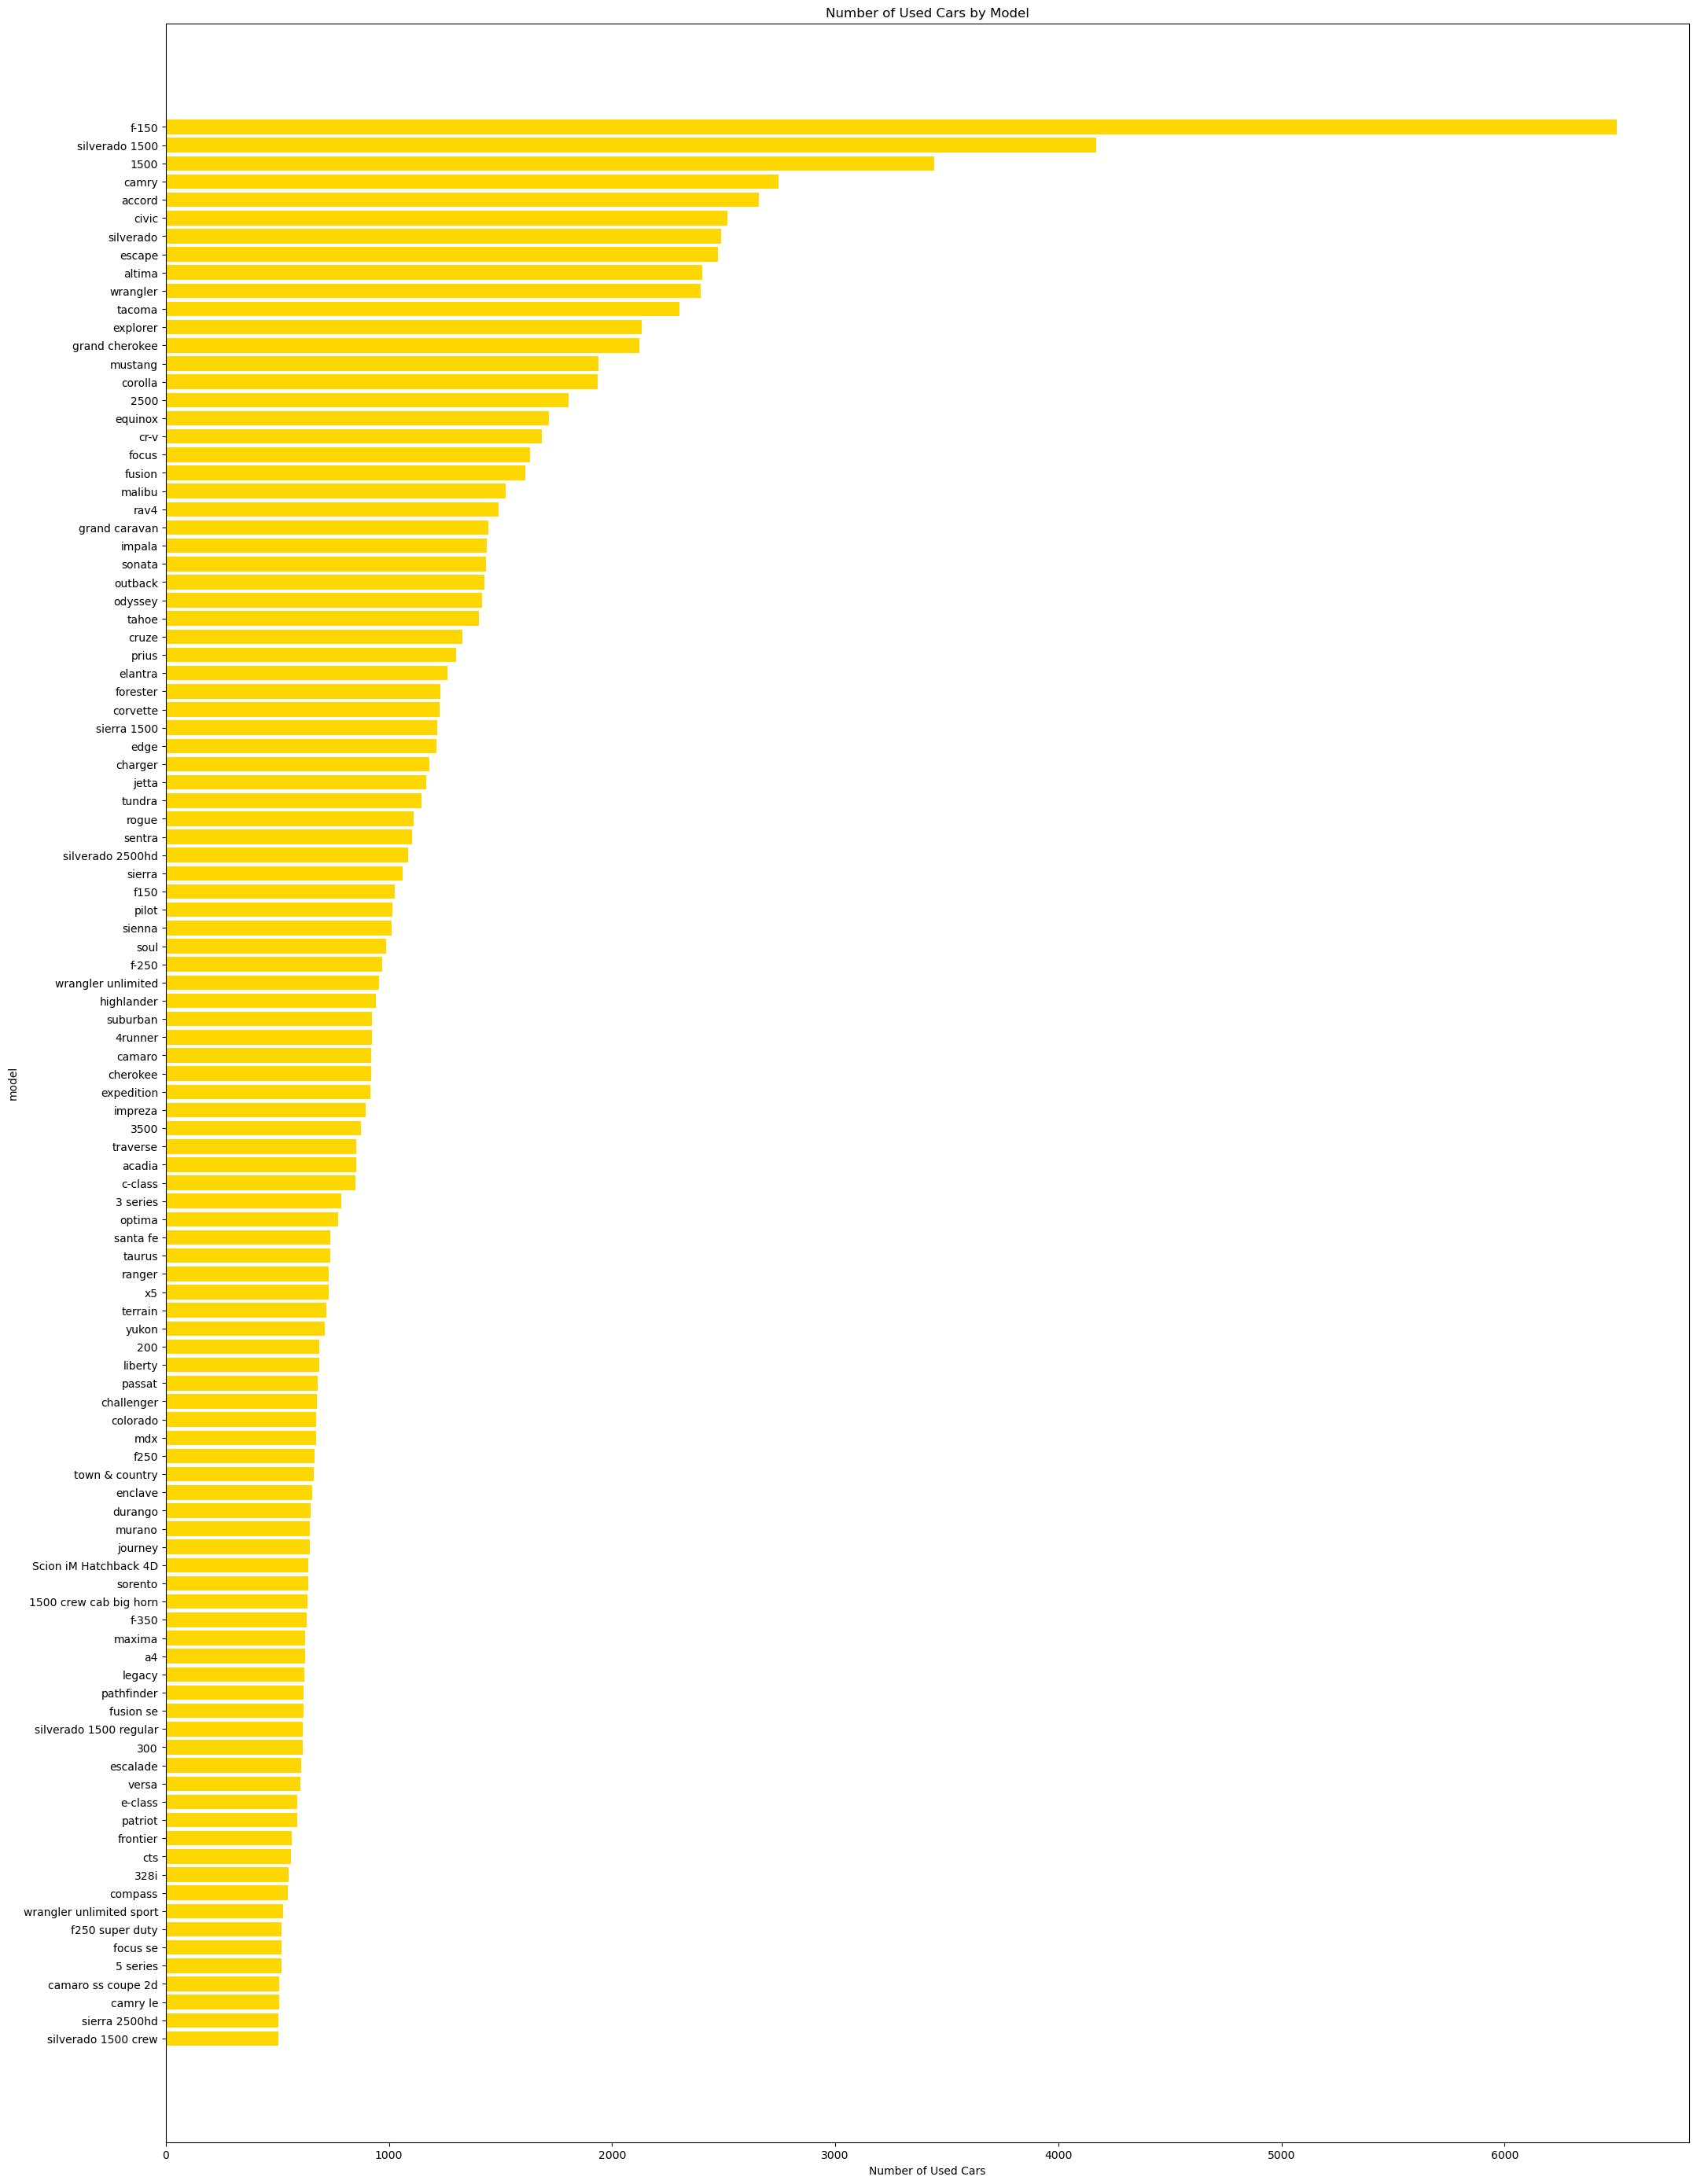

In [24]:
model_counts = filtered_data['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']
filtered_model_counts = model_counts[model_counts['count'] >= 500]
plt.figure(figsize=(25, 35))
plt.barh(filtered_model_counts['model'], filtered_model_counts['count'], color='gold')
plt.xlabel('Number of Used Cars')
plt.ylabel('model')
plt.title('Number of Used Cars by Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the model with the highest count at the top
plt.show()

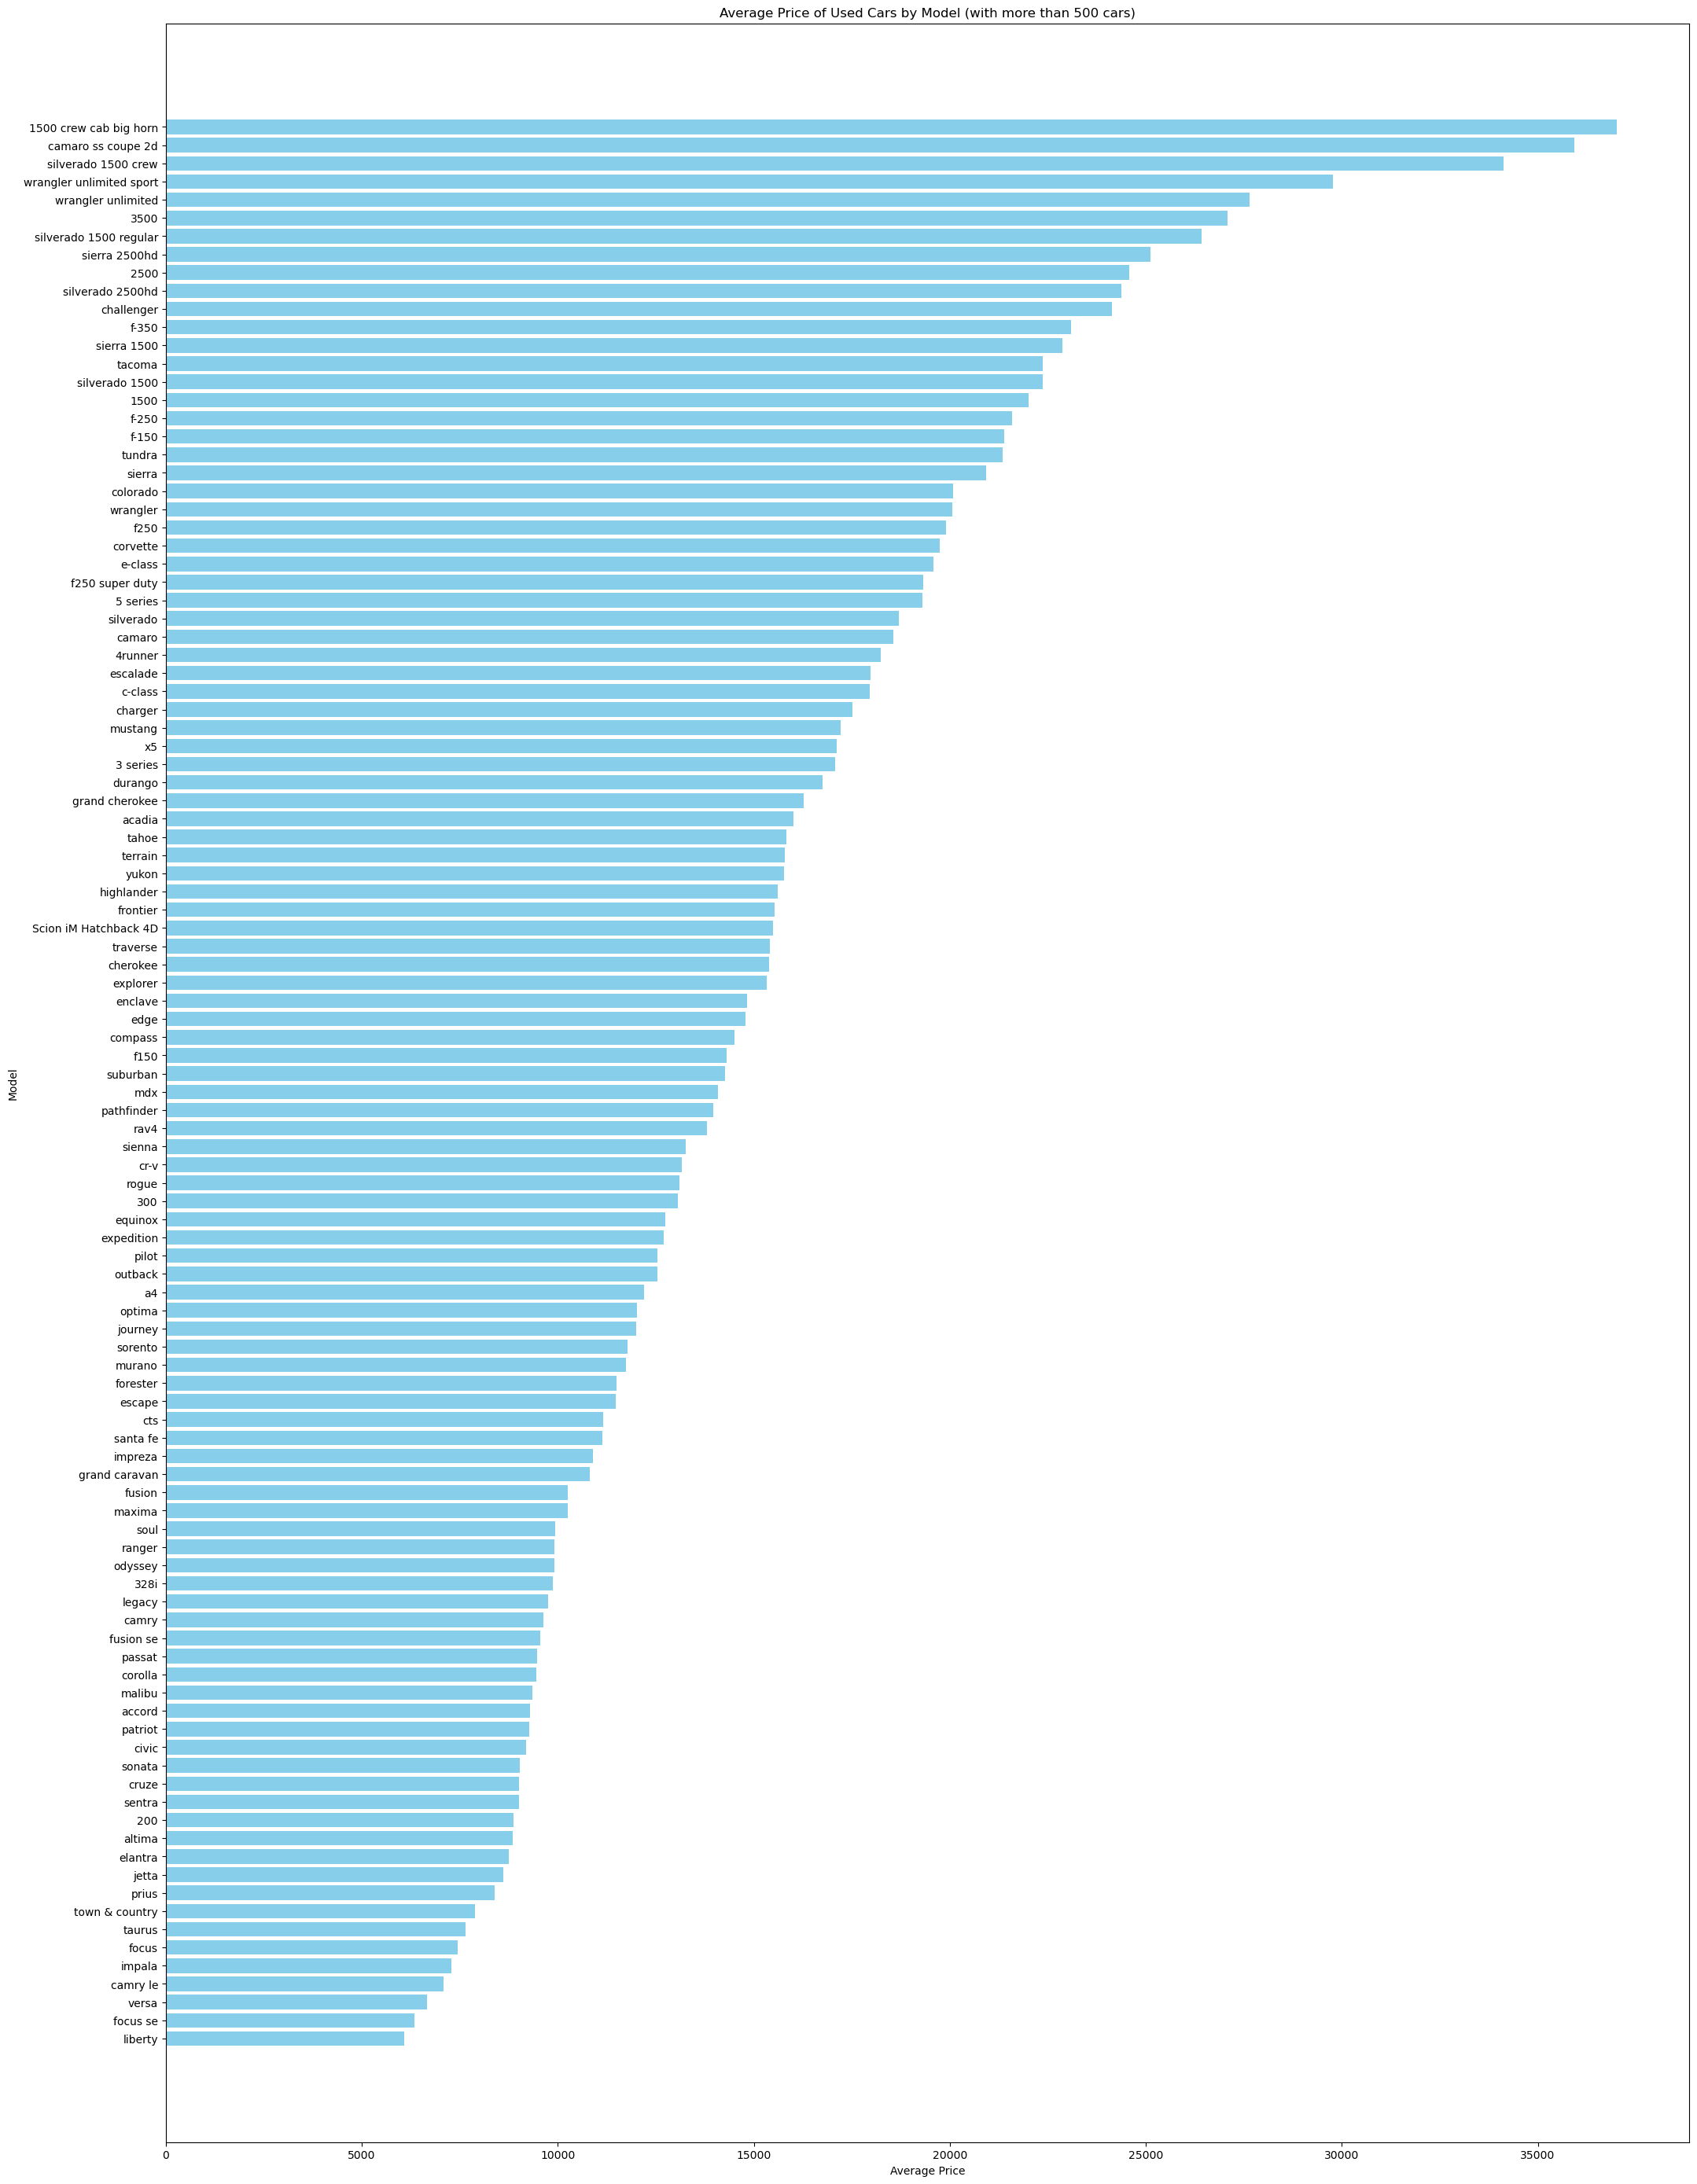

In [25]:
model_counts = filtered_data['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']
filtered_models = model_counts[model_counts['count'] >= 500]['model']
filtered_model_data = filtered_data[filtered_data['model'].isin(filtered_models)]
avg_price_by_model = filtered_model_data.groupby('model')['price'].mean().reset_index()
avg_price_by_model = avg_price_by_model.sort_values(by='price', ascending=False)
plt.figure(figsize=(25, 35))
plt.barh(avg_price_by_model['model'], avg_price_by_model['price'], color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('Model')
plt.title('Average Price of Used Cars by Model (with more than 500 cars)')
plt.gca().invert_yaxis()  # Invert y-axis to have the model with the highest average price at the top
plt.show()

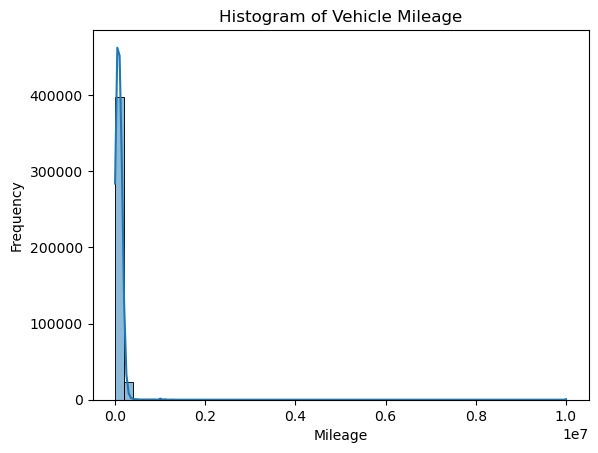

In [26]:
sns.histplot(vehicles_data['odometer'], bins=50, kde=True)
plt.title('Histogram of Vehicle Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

In [27]:
Q1_mileage = filtered_data['odometer'].quantile(0.25)
Q3_mileage = filtered_data['odometer'].quantile(0.75)
IQR = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR
upper_bound_mileage = Q3_mileage + 1.5 * IQR
filtered_odometer_data = filtered_data[
    (filtered_data['odometer'] >= lower_bound_mileage) & 
    (filtered_data['odometer'] <= upper_bound_mileage)
]
filtered_odometer_data = filtered_odometer_data.sort_values(by='odometer', ascending=True)
mean_mileage = filtered_odometer_data['odometer'].mean()
print(f"The lower bound of vehicle mileage is {lower_bound_mileage}")
print(f"The upper bound of vehicle mileage is {upper_bound_mileage}")
print(f"The mean value of vehicle mileage is {mean_mileage}")

The lower bound of vehicle mileage is -104728.75
The upper bound of vehicle mileage is 284845.25
The mean value of vehicle mileage is 94083.8488022113


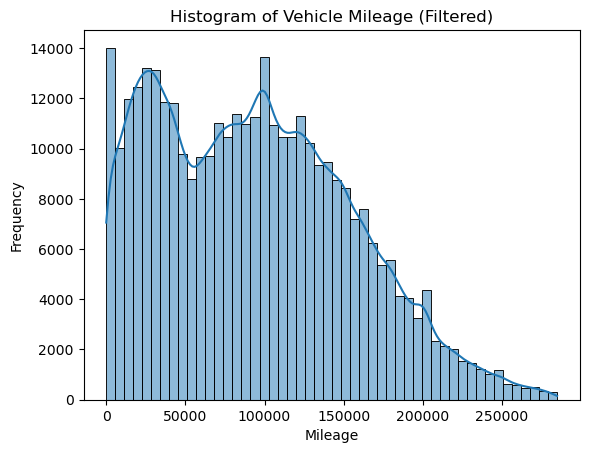

In [28]:
#filtered_data = vehicles_data[vehicles_data['odometer'] < 250000]  # Adjust the threshold as needed
sns.histplot(filtered_odometer_data['odometer'], bins=50, kde=True)
plt.title('Histogram of Vehicle Mileage (Filtered)')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

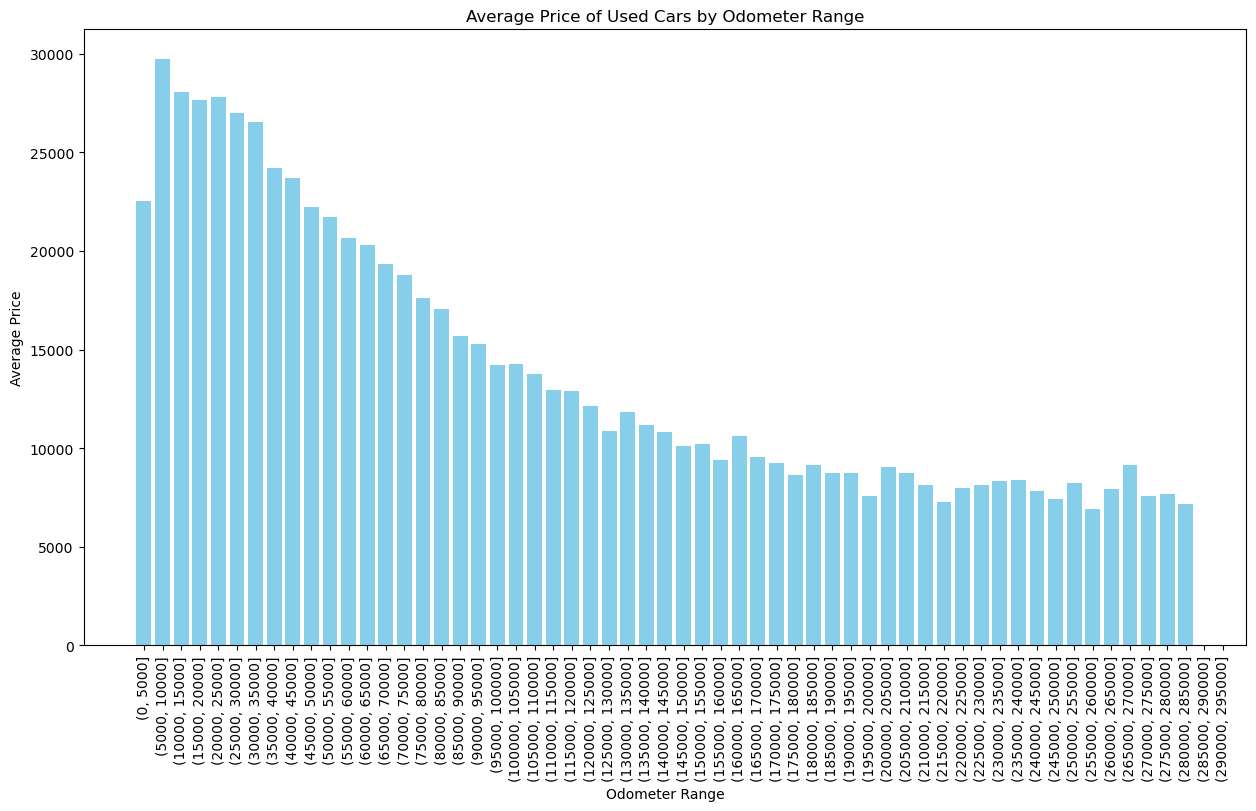

In [29]:
filtered_odometer_data['odometer_bin'] = pd.cut(filtered_odometer_data['odometer'], bins=np.arange(0, 300000, 5000))
avg_price_by_odometer_bin = filtered_odometer_data.groupby('odometer_bin')['price'].mean().reset_index()
plt.figure(figsize=(15, 8))
plt.bar(avg_price_by_odometer_bin['odometer_bin'].astype(str), avg_price_by_odometer_bin['price'], color='skyblue')
plt.xlabel('Odometer Range')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by Odometer Range')
plt.xticks(rotation=90)
plt.show()

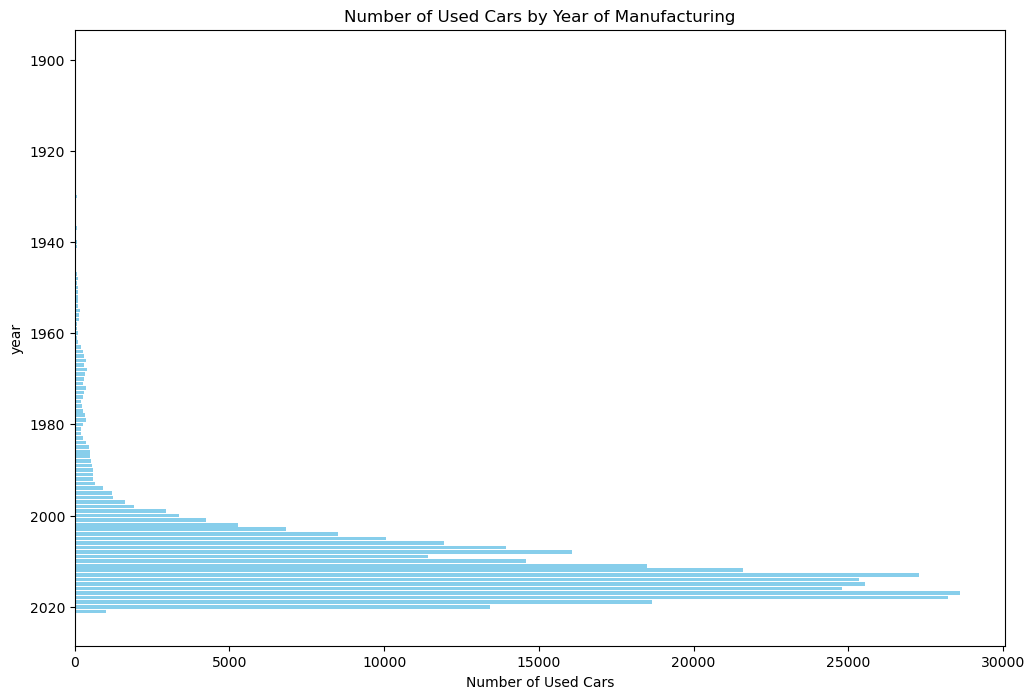

In [30]:
year_counts = filtered_data['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']
plt.figure(figsize=(12, 8))
plt.barh(year_counts['year'], year_counts['count'], color='skyblue')
plt.xlabel('Number of Used Cars')
plt.ylabel('year')
plt.title('Number of Used Cars by Year of Manufacturing')
plt.gca().invert_yaxis()  # Invert y-axis to have the year with the highest count at the top
plt.show()

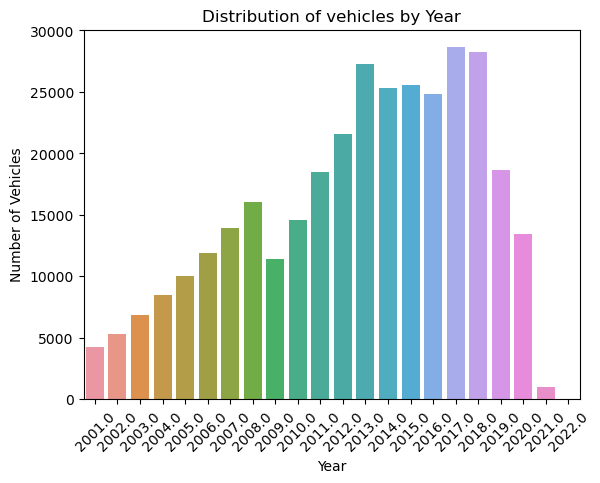

In [31]:
year_data = filtered_data[vehicles_data['year'] > 2000.0]  # Adjust the threshold as needed
year_plot=sns.countplot(x='year', data=year_data)
year_plot.set_xticklabels(year_plot.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Year")
plt.show()

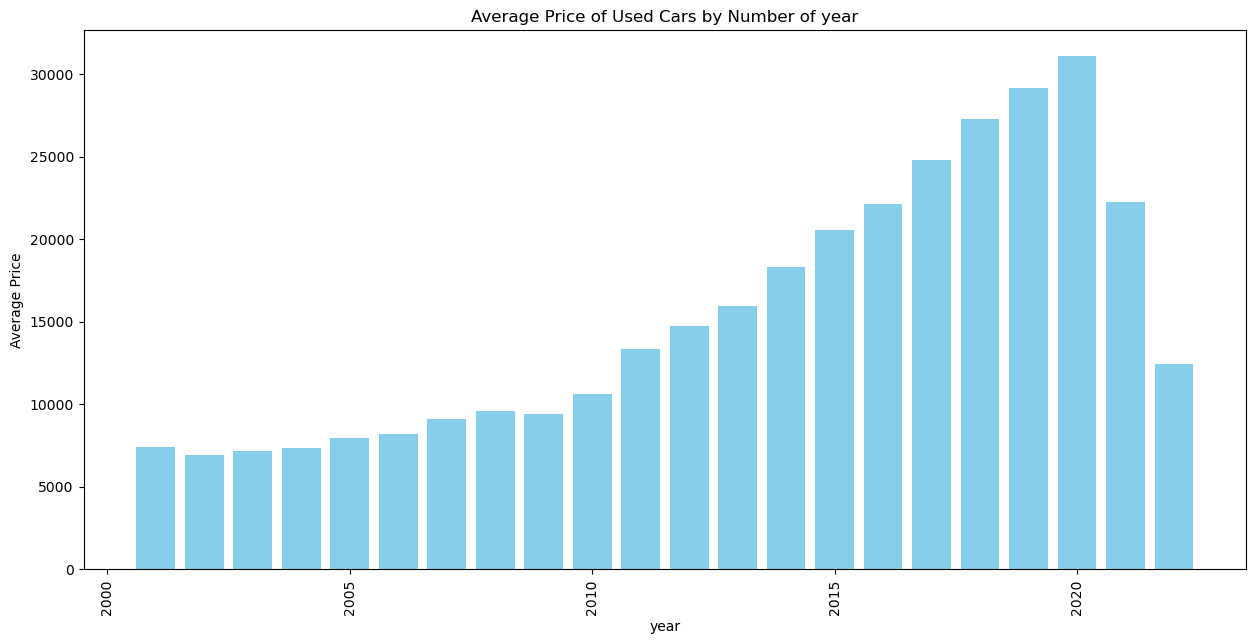

In [32]:
avg_price_by_year = year_data.groupby('year')['price'].mean().reset_index()
avg_price_by_year = avg_price_by_year.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_year['year'], avg_price_by_year['price'], color='skyblue')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by Number of year')
plt.xticks(rotation=90)
plt.show()

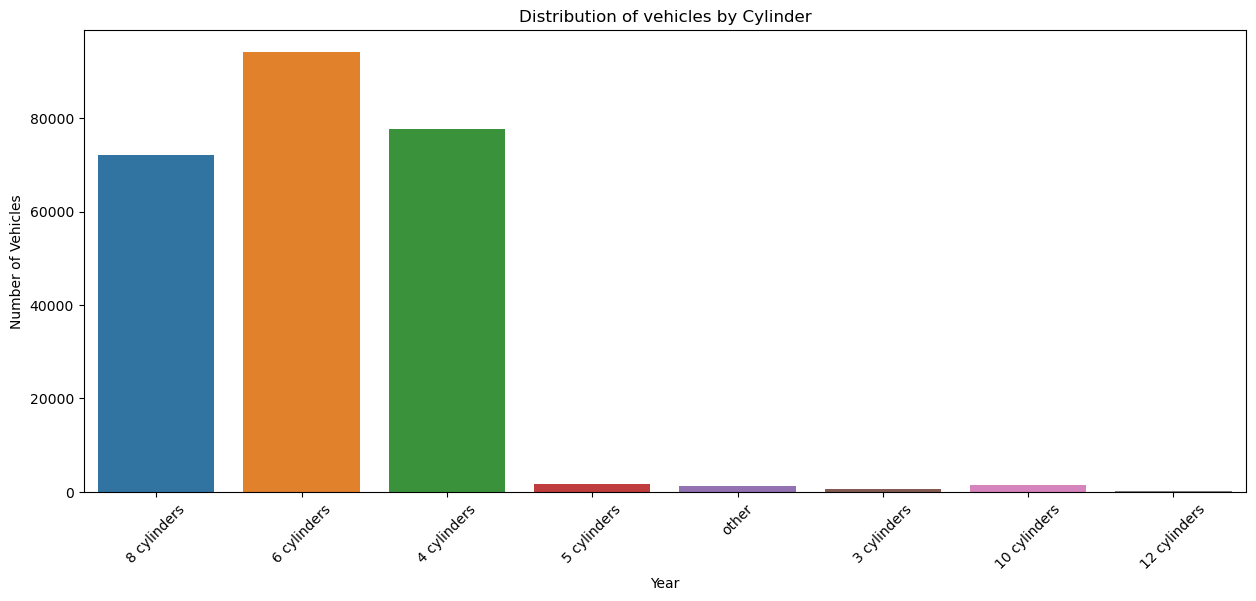

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
cylinder_plot=sns.countplot(x='cylinders', data=vehicles_data, ax=ax)
cylinder_plot.set_xticklabels(cylinder_plot.get_xticklabels(), rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Cylinder")
plt.show()

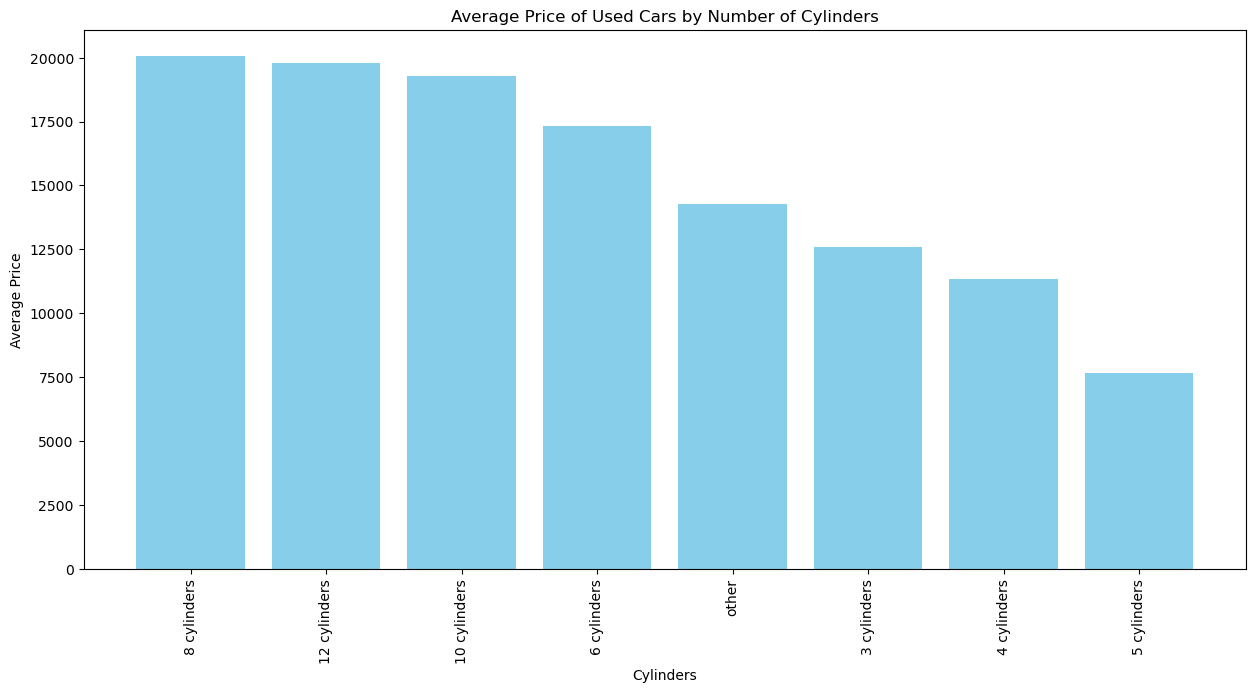

In [34]:
avg_price_by_cylinder = filtered_data.groupby('cylinders')['price'].mean().reset_index()
avg_price_by_cylinder = avg_price_by_cylinder.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_cylinder['cylinders'], avg_price_by_cylinder['price'], color='skyblue')
plt.xlabel('Cylinders')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by Number of Cylinders')
plt.xticks(rotation=90)
plt.show()

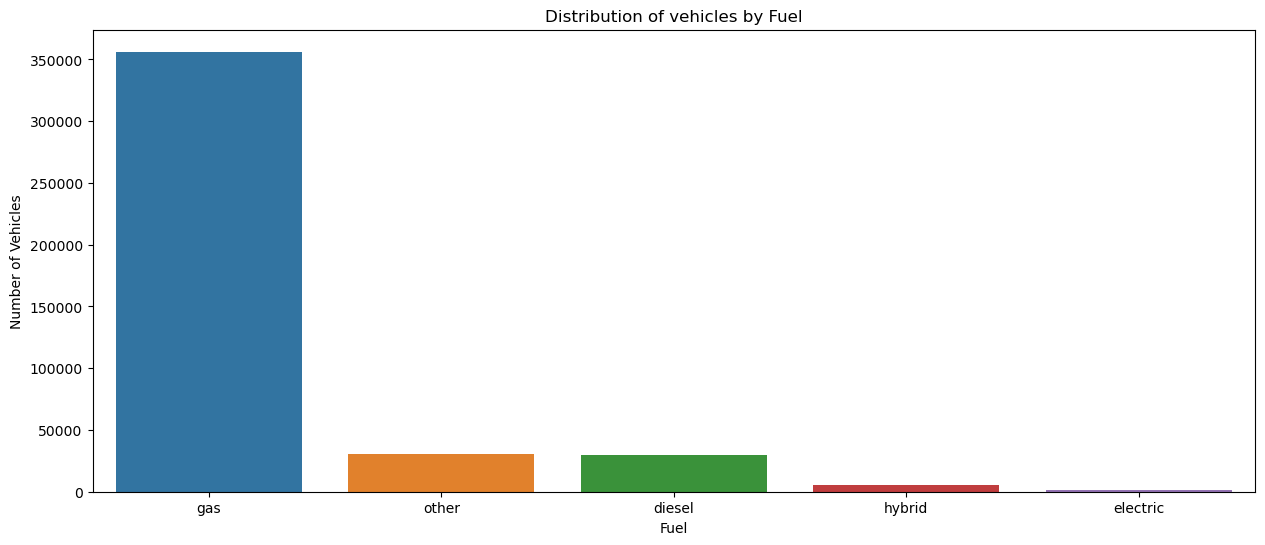

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
fuel_plot=sns.countplot(x='fuel', data=vehicles_data, ax=ax)
cylinder_plot.set_xticklabels(cylinder_plot.get_xticklabels(), rotation=45)
plt.xlabel("Fuel")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Fuel")
plt.show()

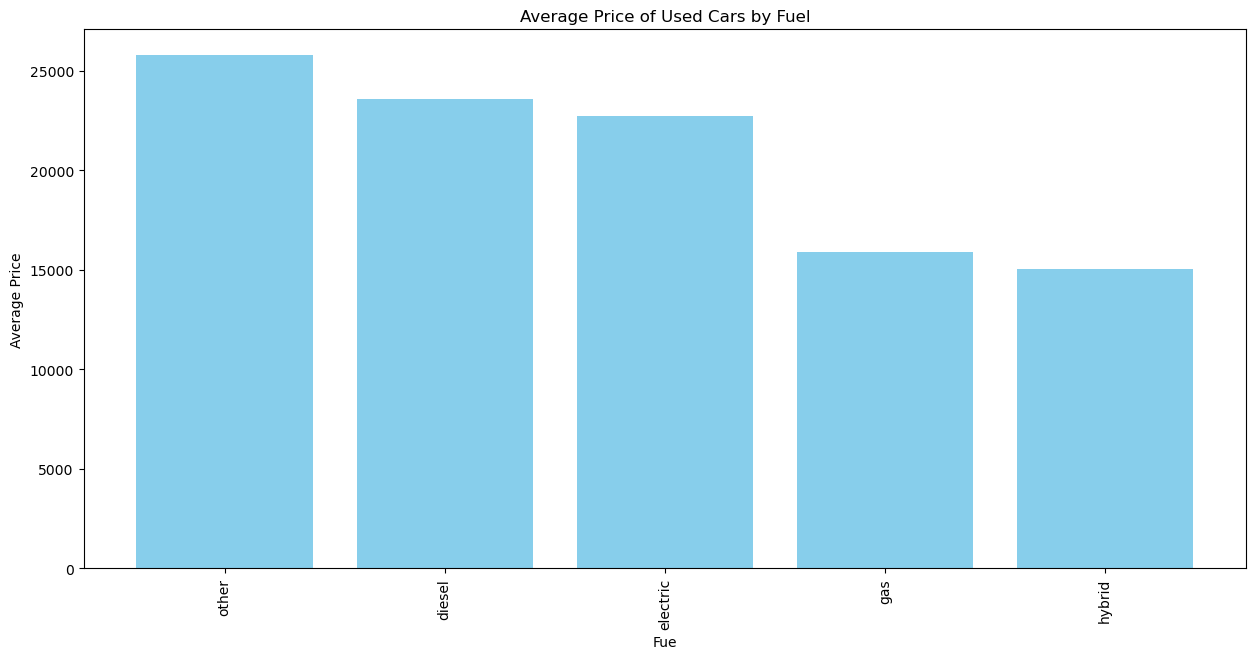

In [36]:
avg_price_by_fuel = filtered_data.groupby('fuel')['price'].mean().reset_index()
avg_price_by_fuel = avg_price_by_fuel.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_fuel['fuel'], avg_price_by_fuel['price'], color='skyblue')
plt.xlabel('Fue')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by Fuel')
plt.xticks(rotation=90)
plt.show()

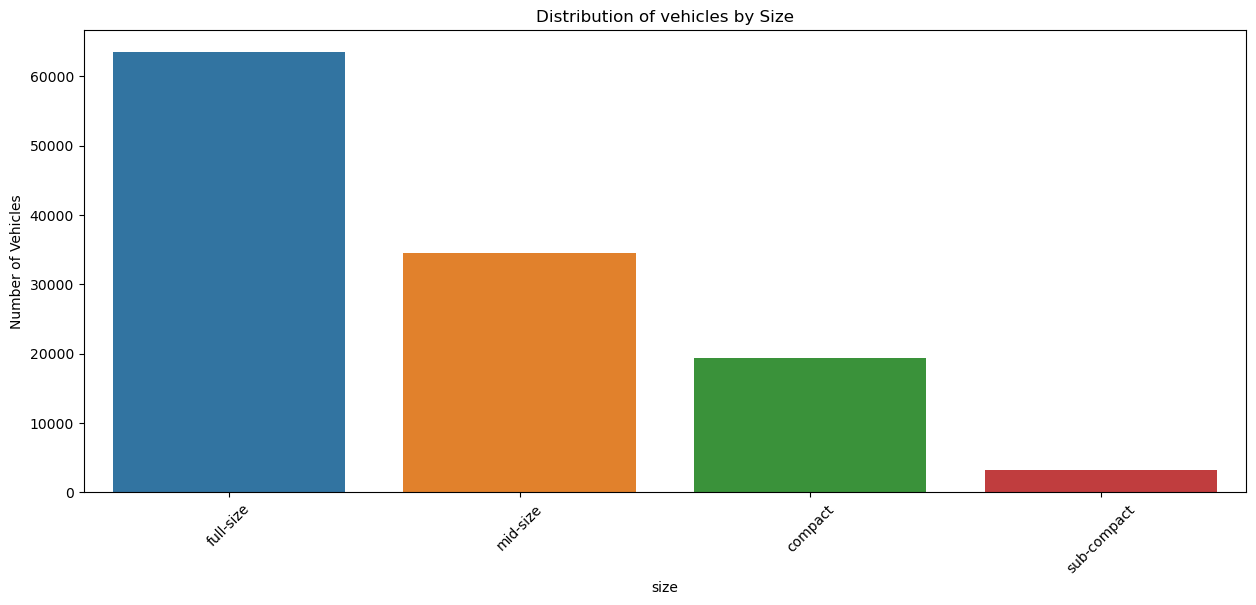

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
size_plot=sns.countplot(x='size', data=vehicles_data, ax=ax)
size_plot.set_xticklabels(size_plot.get_xticklabels(), rotation=45)
plt.xlabel("size")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Size")
plt.show()

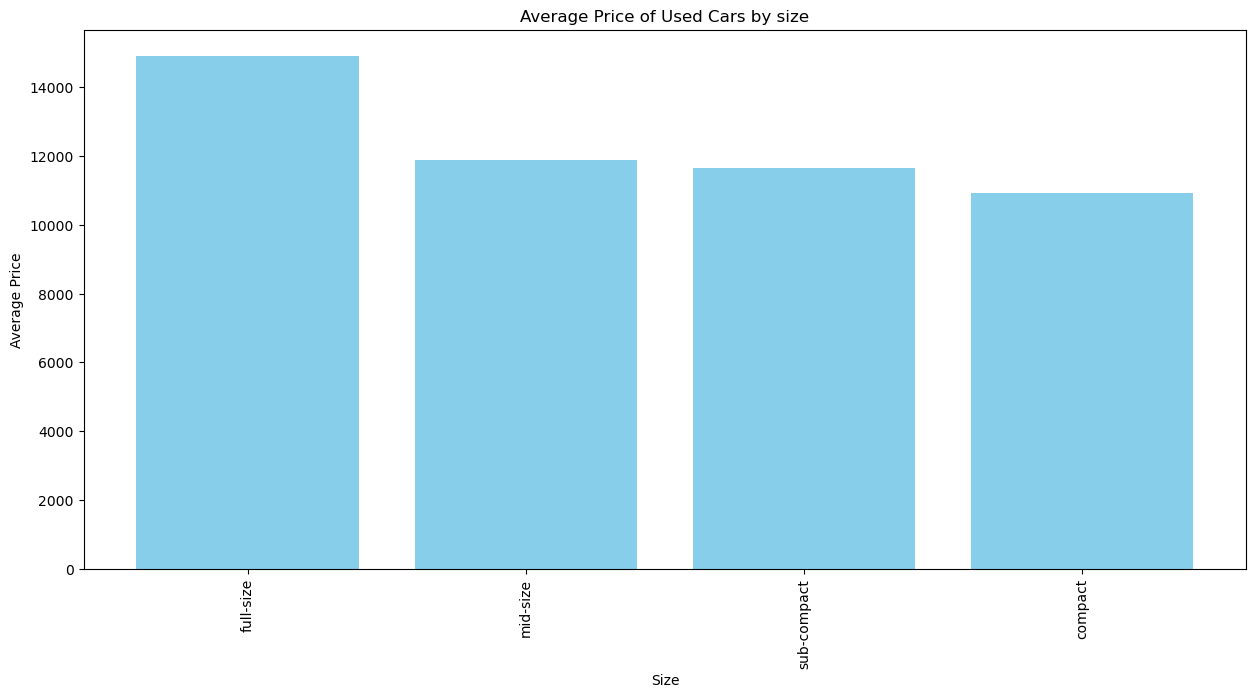

In [38]:
avg_price_by_size = filtered_data.groupby('size')['price'].mean().reset_index()
avg_price_by_size = avg_price_by_size.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_size['size'], avg_price_by_size['price'], color='skyblue')
plt.xlabel('Size')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by size')
plt.xticks(rotation=90)
plt.show()

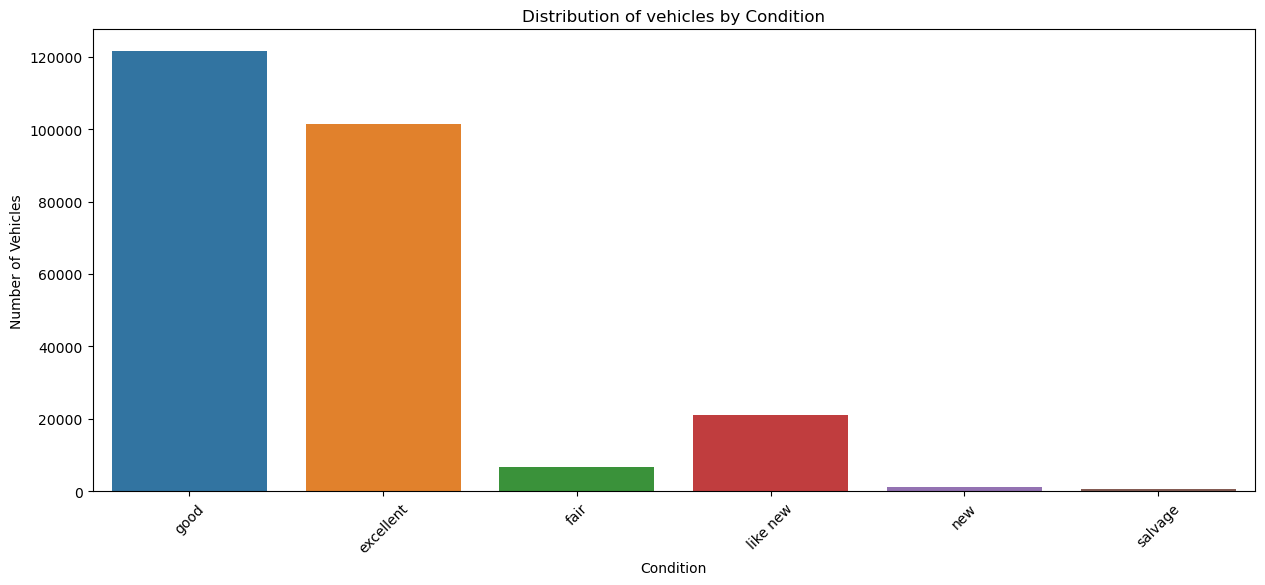

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
condition_plot=sns.countplot(x='condition', data=vehicles_data, ax=ax)
condition_plot.set_xticklabels(condition_plot.get_xticklabels(), rotation=45)
plt.xlabel("Condition")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Condition")
plt.show()

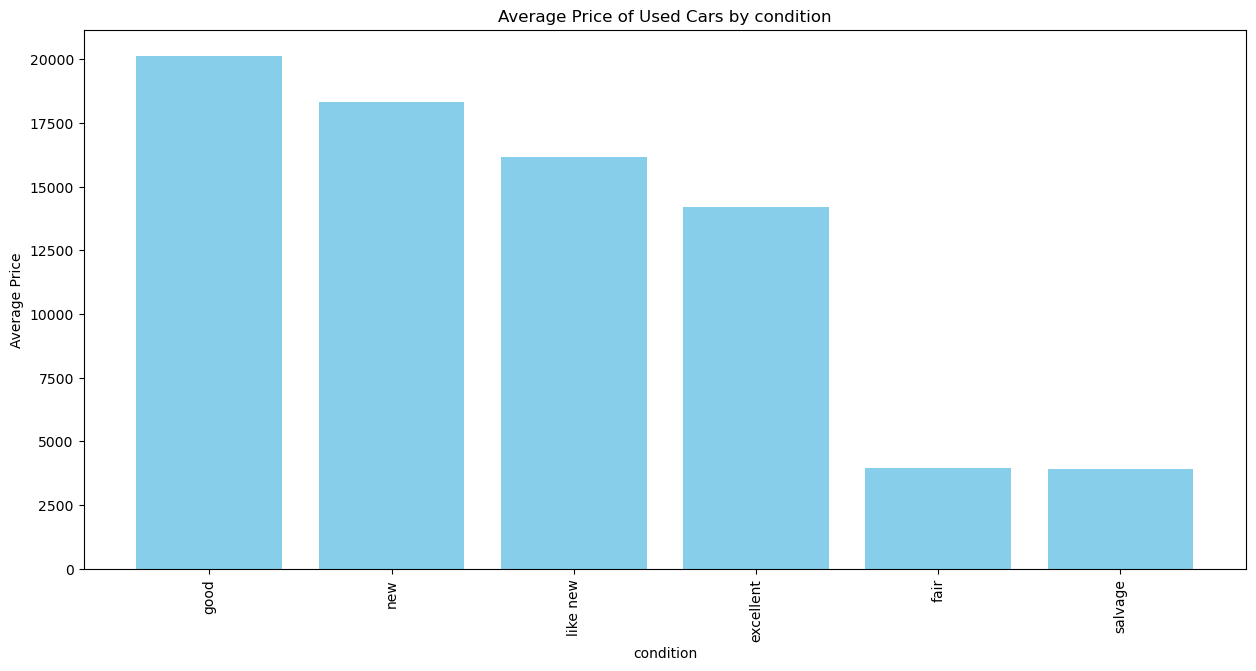

In [40]:
avg_price_by_condition = filtered_data.groupby('condition')['price'].mean().reset_index()
avg_price_by_condition = avg_price_by_condition.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_condition['condition'], avg_price_by_condition['price'], color='skyblue')
plt.xlabel('condition')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by condition')
plt.xticks(rotation=90)
plt.show()

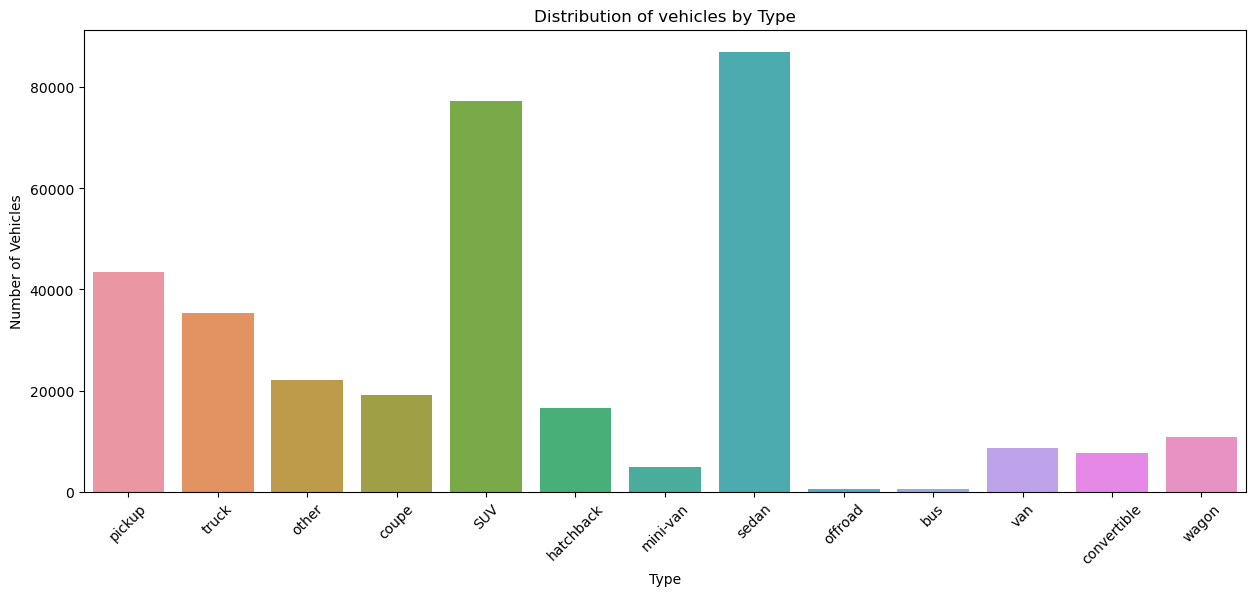

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
type_plot=sns.countplot(x='type', data=vehicles_data, ax=ax)
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=45)
plt.xlabel("Type")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Type")
plt.show()

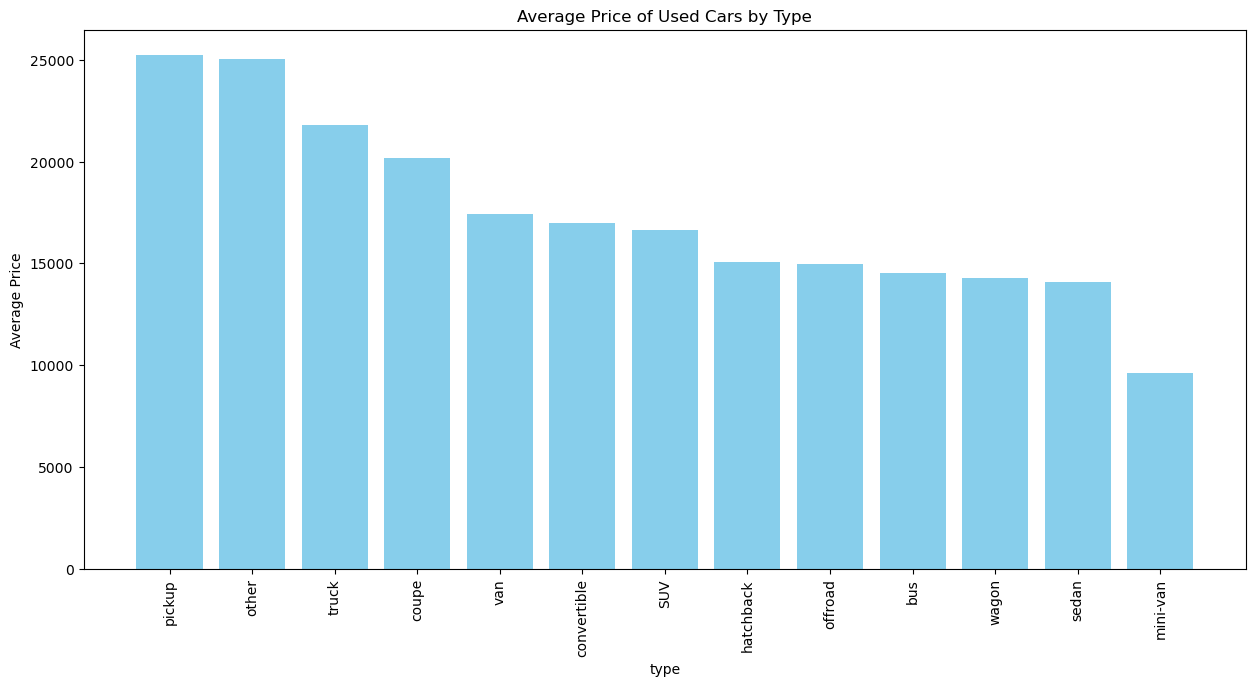

In [42]:
avg_price_by_type = filtered_data.groupby('type')['price'].mean().reset_index()
avg_price_by_type = avg_price_by_type.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_type['type'], avg_price_by_type['price'], color='skyblue')
plt.xlabel('type')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by Type')
plt.xticks(rotation=90)
plt.show()

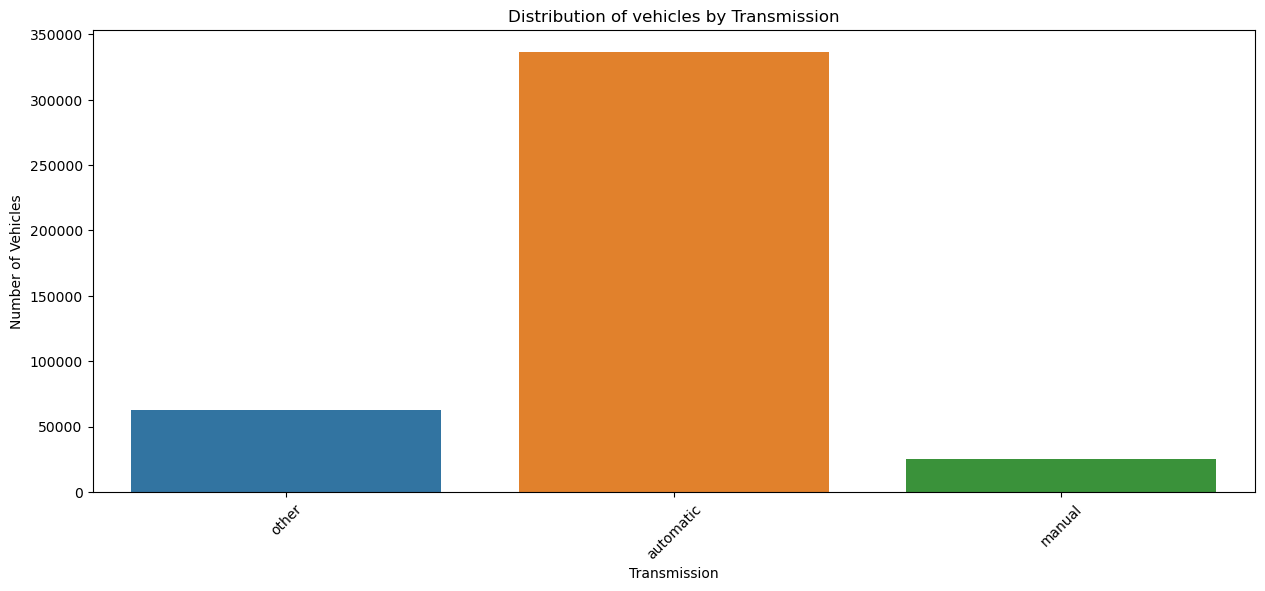

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))
trx_plot=sns.countplot(x='transmission', data=vehicles_data, ax=ax)
trx_plot.set_xticklabels(trx_plot.get_xticklabels(), rotation=45)
plt.xlabel("Transmission")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Transmission")
plt.show()

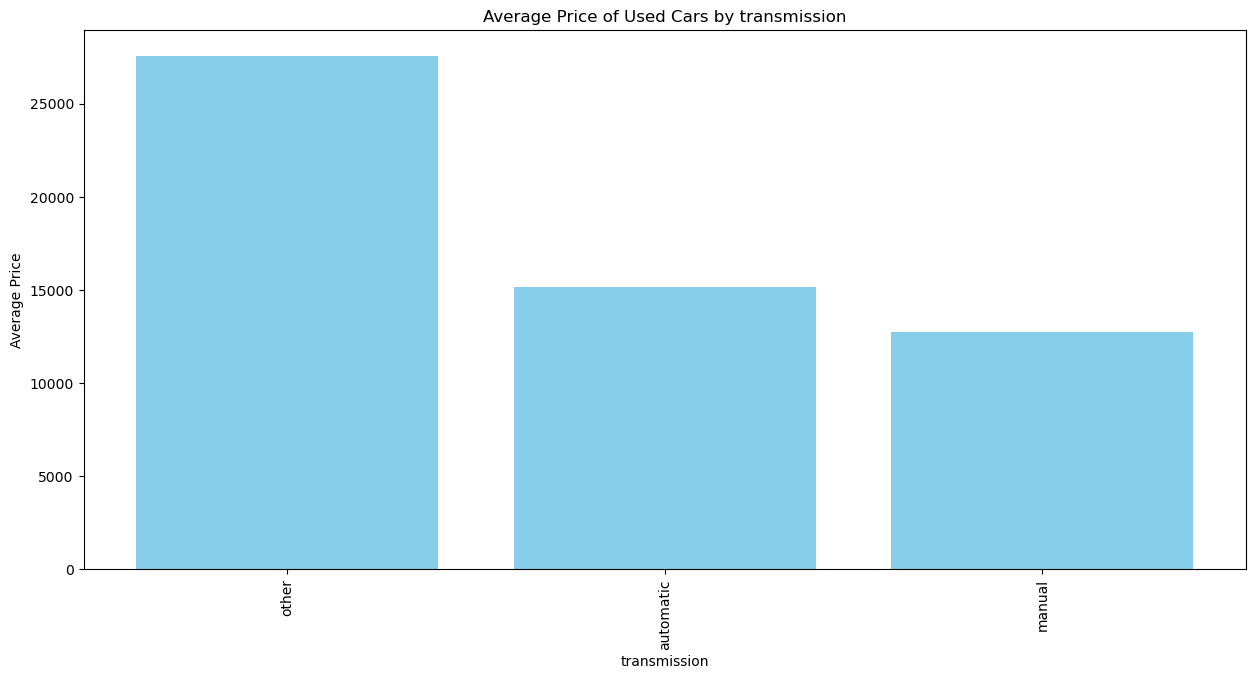

In [44]:
avg_price_by_transmission = filtered_data.groupby('transmission')['price'].mean().reset_index()
avg_price_by_transmission = avg_price_by_transmission.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_transmission['transmission'], avg_price_by_transmission['price'], color='skyblue')
plt.xlabel('transmission')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by transmission')
plt.xticks(rotation=90)
plt.show()

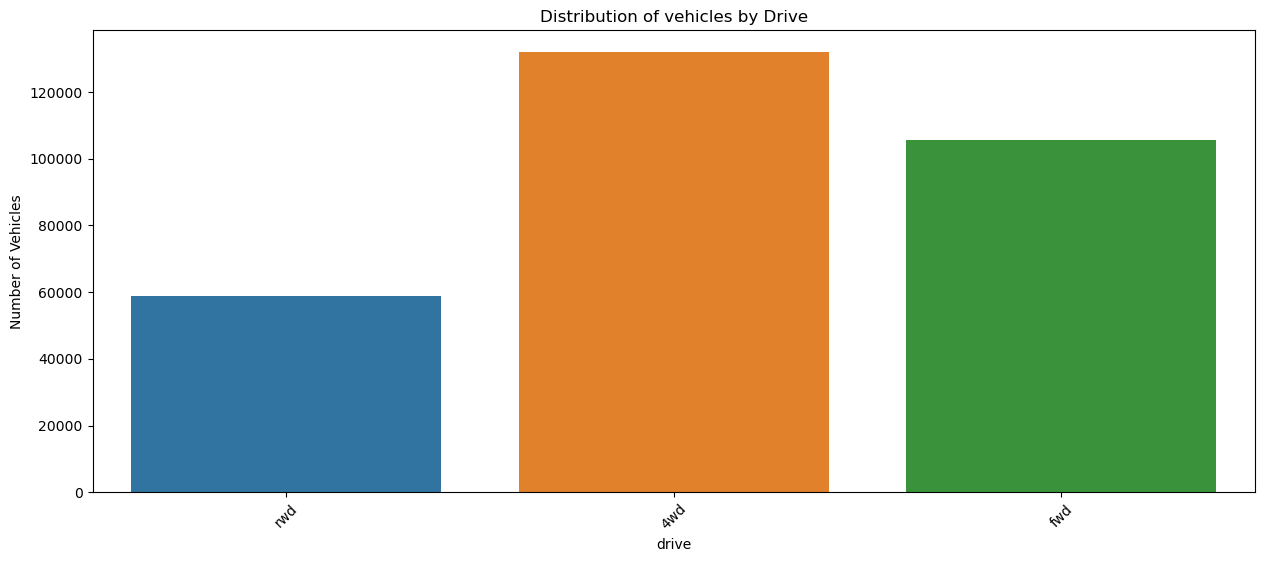

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))
drive_plot=sns.countplot(x='drive', data=vehicles_data, ax=ax)
drive_plot.set_xticklabels(drive_plot.get_xticklabels(), rotation=45)
plt.xlabel("drive")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Drive")
plt.show()

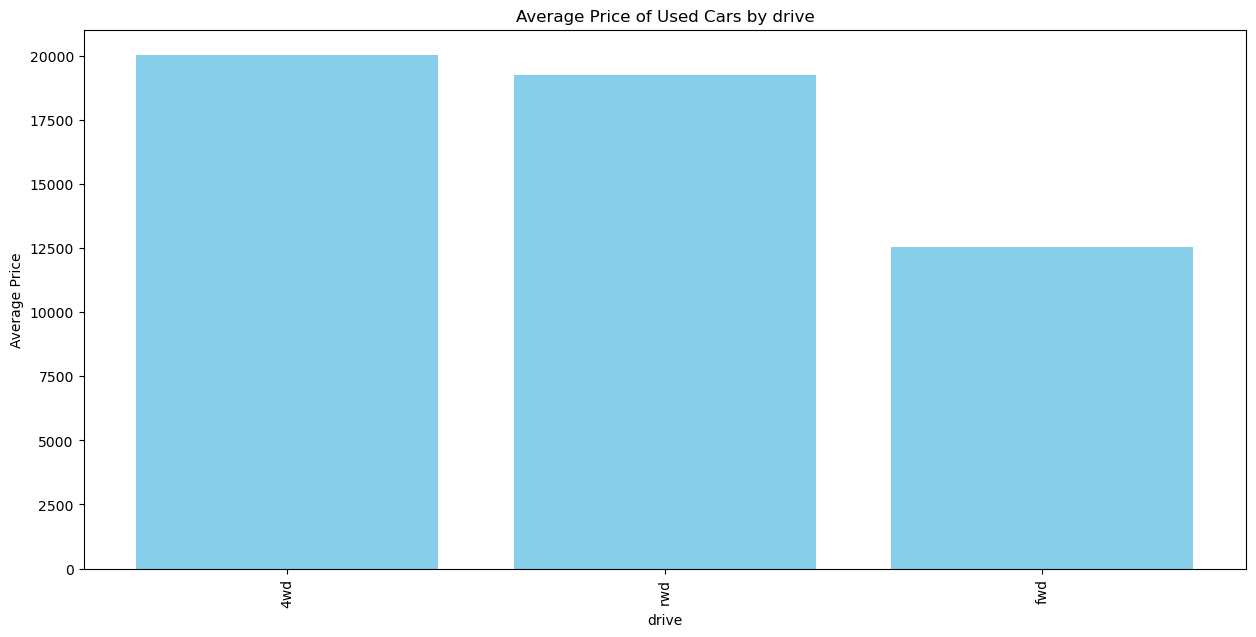

In [46]:
avg_price_by_drive = filtered_data.groupby('drive')['price'].mean().reset_index()
avg_price_by_drive = avg_price_by_drive.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_drive['drive'], avg_price_by_drive['price'], color='skyblue')
plt.xlabel('drive')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by drive')
plt.xticks(rotation=90)
plt.show()

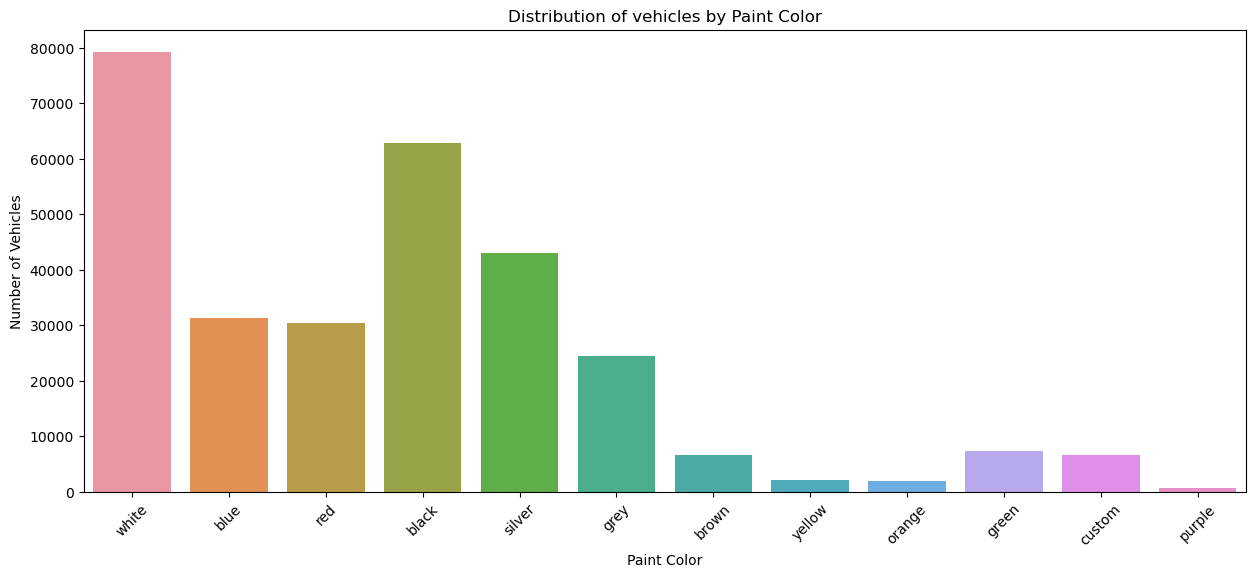

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))
paint_plot=sns.countplot(x='paint_color', data=vehicles_data, ax=ax)
paint_plot.set_xticklabels(paint_plot.get_xticklabels(), rotation=45)
plt.xlabel("Paint Color")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Paint Color")
plt.show()

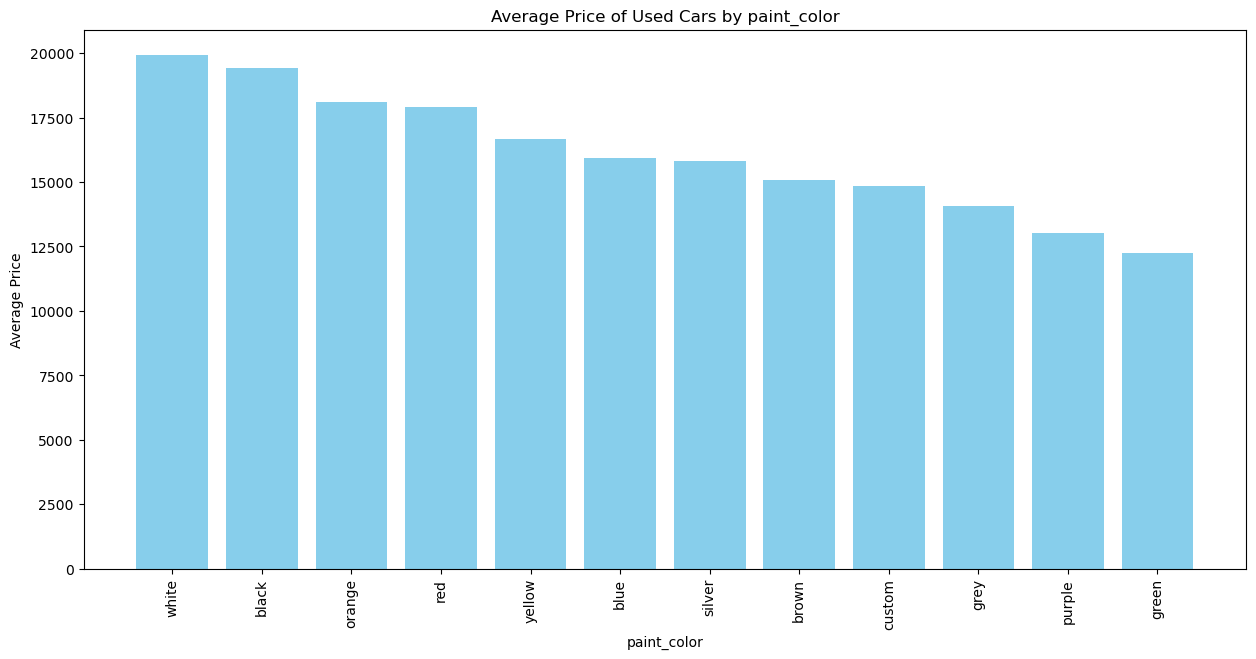

In [48]:
avg_price_by_paint_color = filtered_data.groupby('paint_color')['price'].mean().reset_index()
avg_price_by_paint_color = avg_price_by_paint_color.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_paint_color['paint_color'], avg_price_by_paint_color['price'], color='skyblue')
plt.xlabel('paint_color')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by paint_color')
plt.xticks(rotation=90)
plt.show()

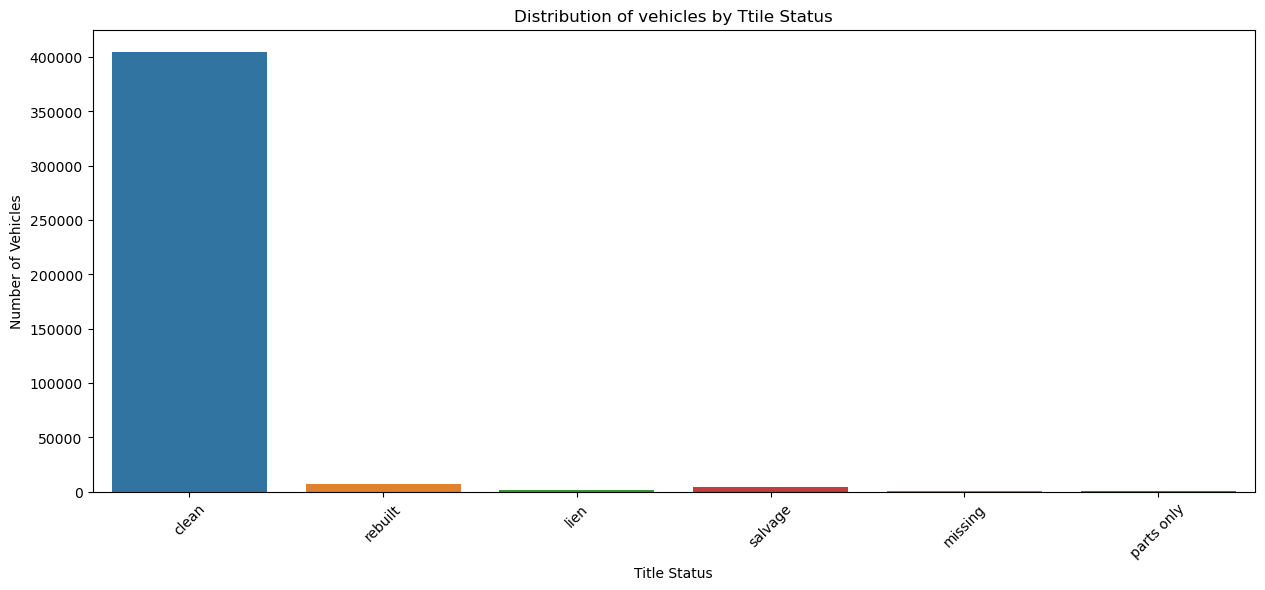

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
title_plot=sns.countplot(x='title_status', data=vehicles_data, ax=ax)
title_plot.set_xticklabels(title_plot.get_xticklabels(), rotation=45)
plt.xlabel("Title Status")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of vehicles by Ttile Status")
plt.show()

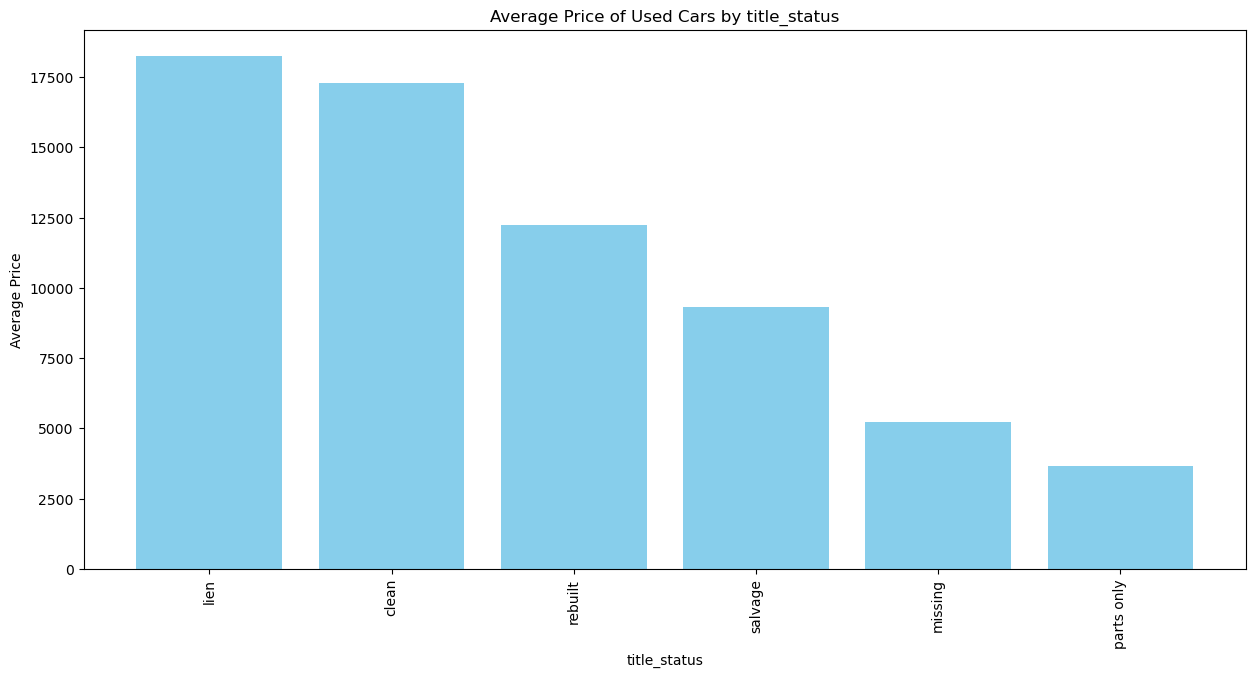

In [50]:
avg_price_by_title_status = filtered_data.groupby('title_status')['price'].mean().reset_index()
avg_price_by_title_status = avg_price_by_title_status.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 7))
plt.bar(avg_price_by_title_status['title_status'], avg_price_by_title_status['price'], color='skyblue')
plt.xlabel('title_status')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by title_status')
plt.xticks(rotation=90)
plt.show()

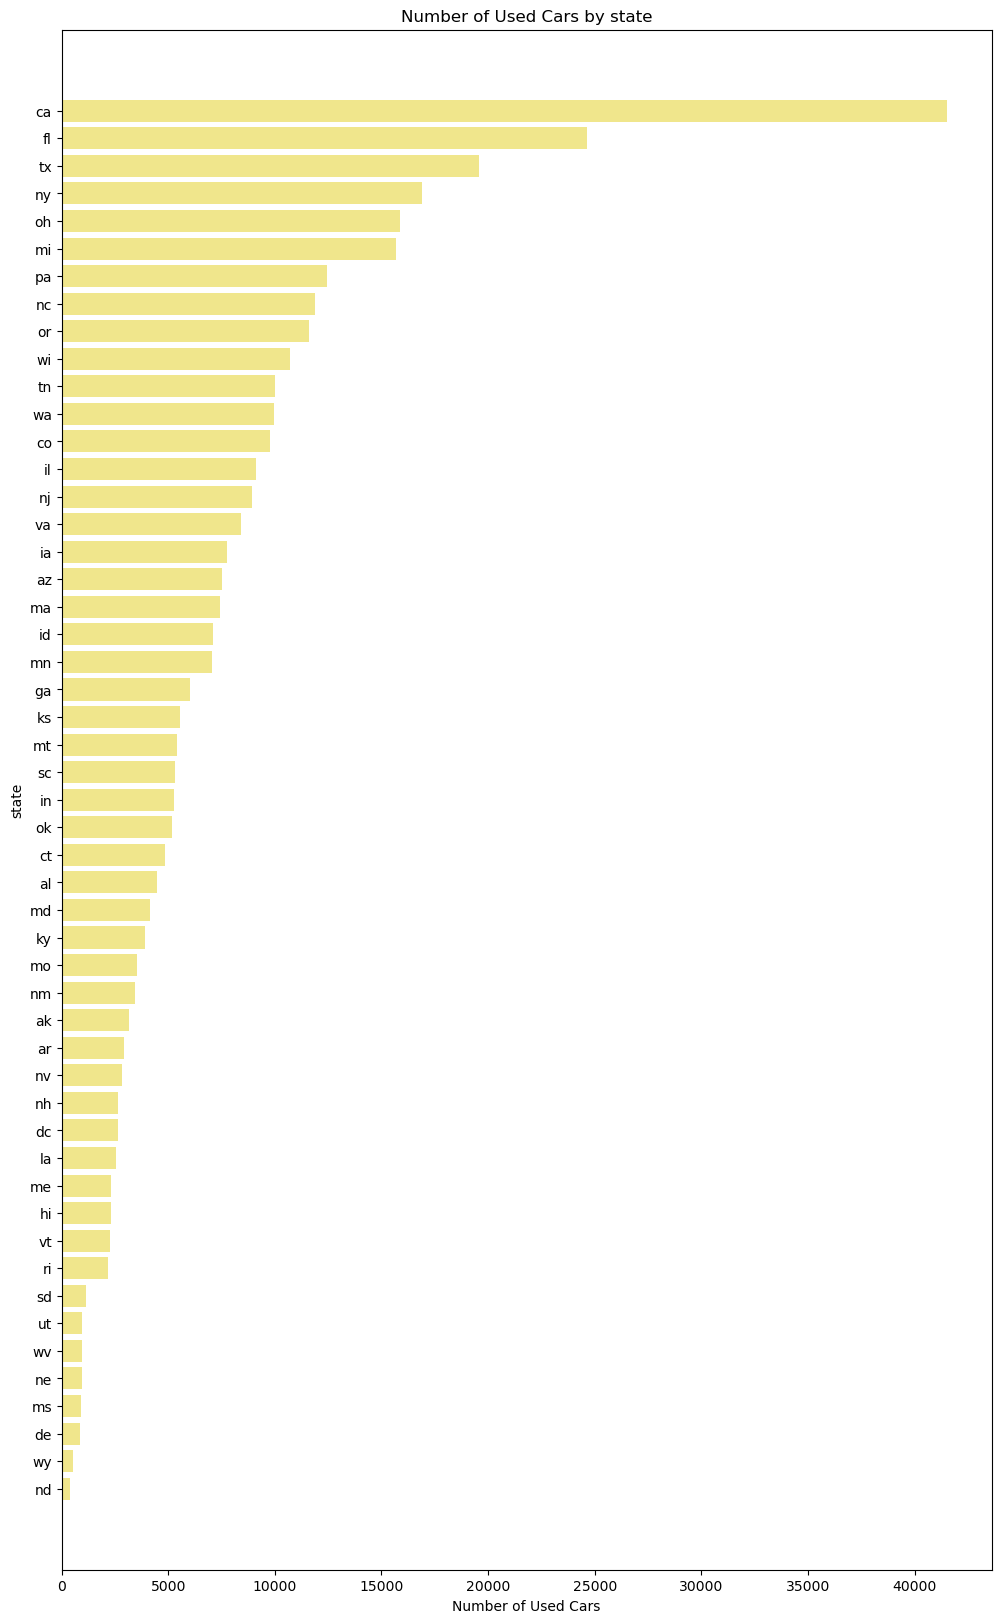

In [51]:
state_counts = filtered_data['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
plt.figure(figsize=(12, 20))
plt.barh(state_counts['state'], state_counts['count'], color='khaki')
plt.xlabel('Number of Used Cars')
plt.ylabel('state')
plt.title('Number of Used Cars by state')
plt.gca().invert_yaxis()  # Invert y-axis to have the state with the highest count at the top
plt.show()

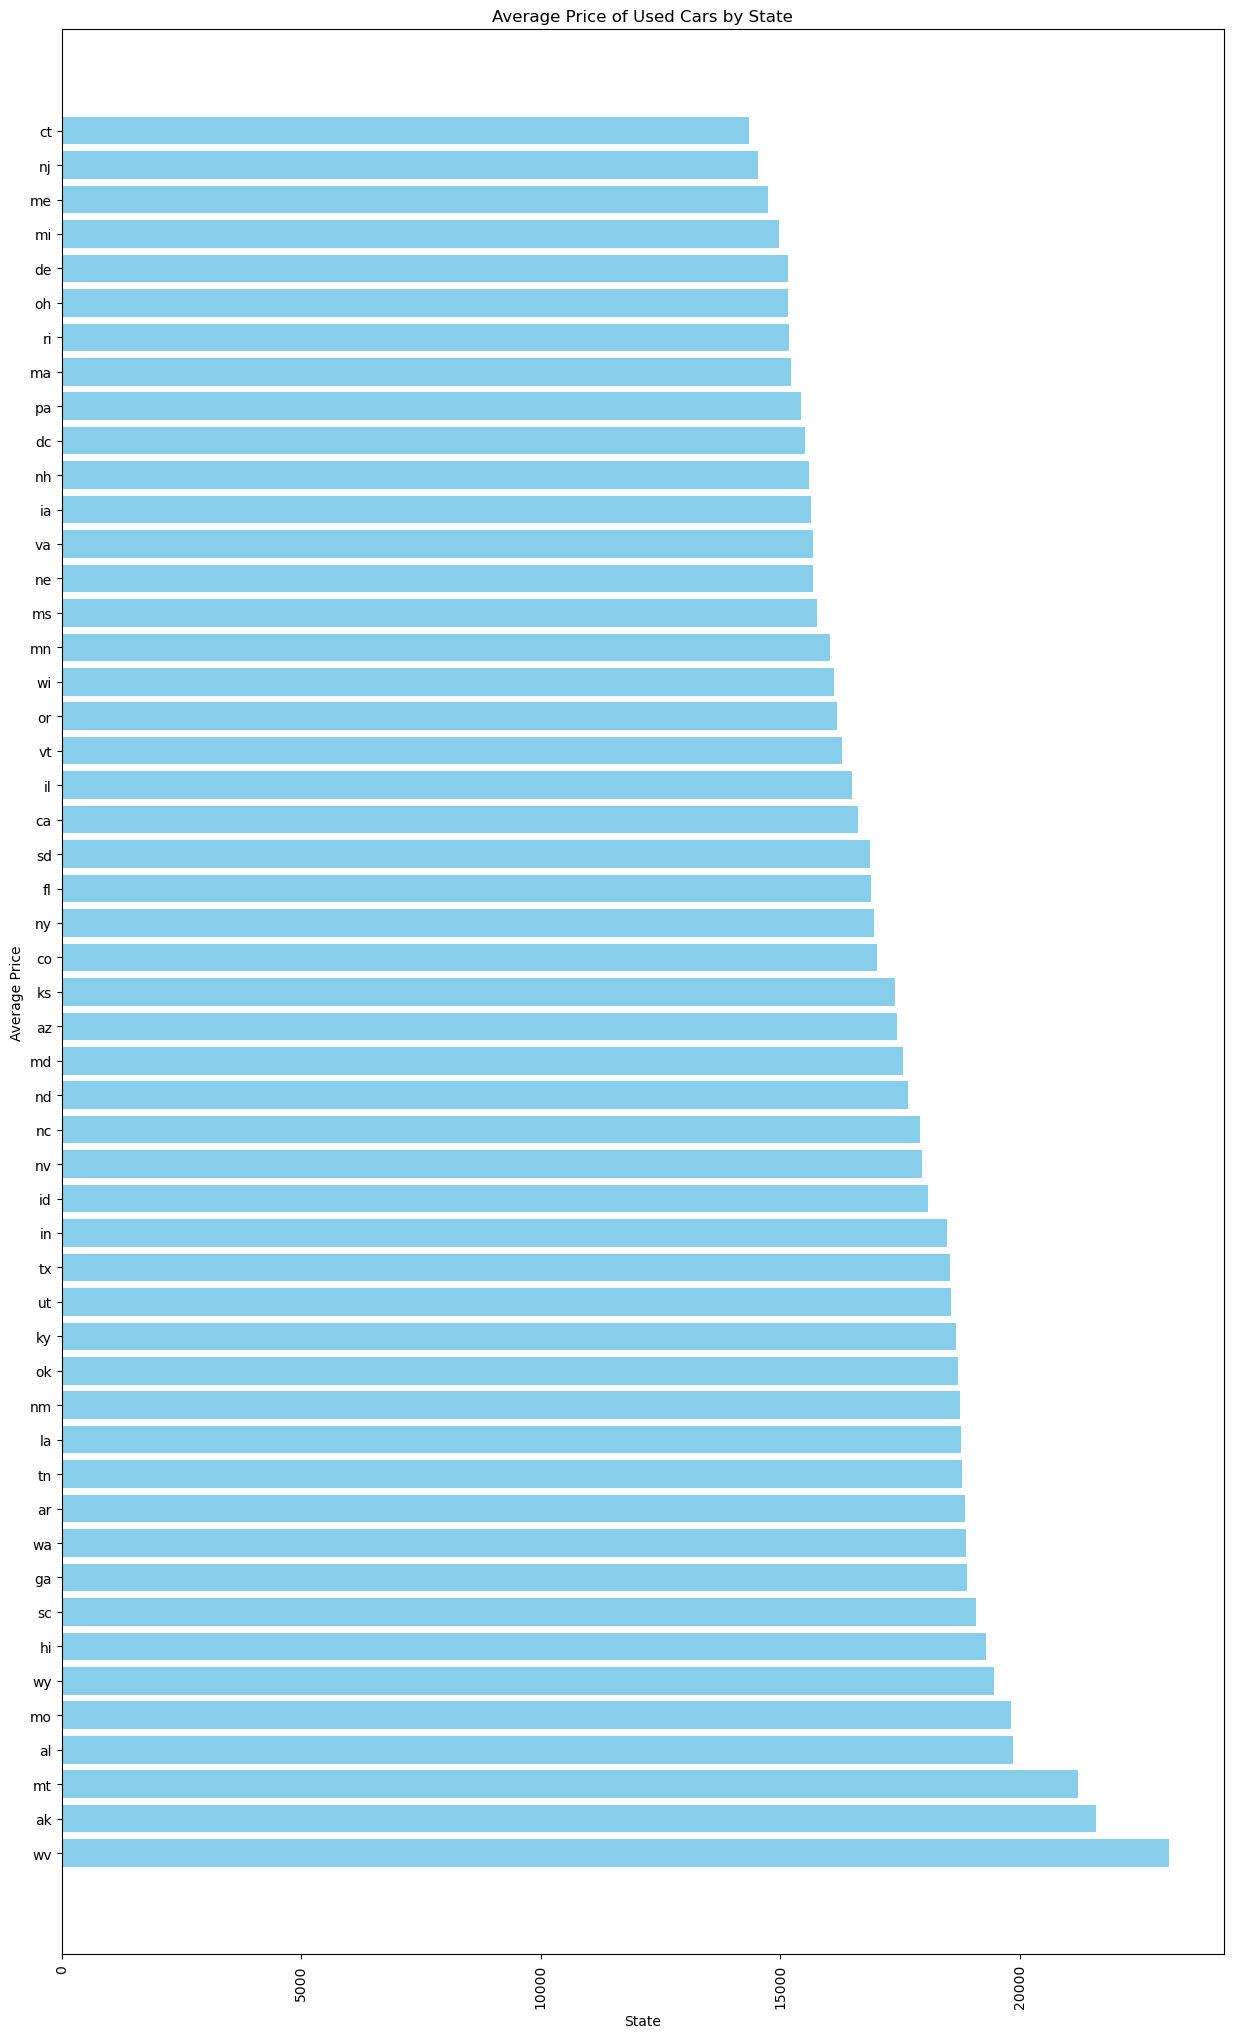

In [52]:
avg_price_by_state = filtered_data.groupby('state')['price'].mean().reset_index()
avg_price_by_state = avg_price_by_state.sort_values(by='price', ascending=False)
plt.figure(figsize=(15, 25))
plt.barh(avg_price_by_state['state'], avg_price_by_state['price'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Average Price of Used Cars by State')
plt.xticks(rotation=90)
plt.show()

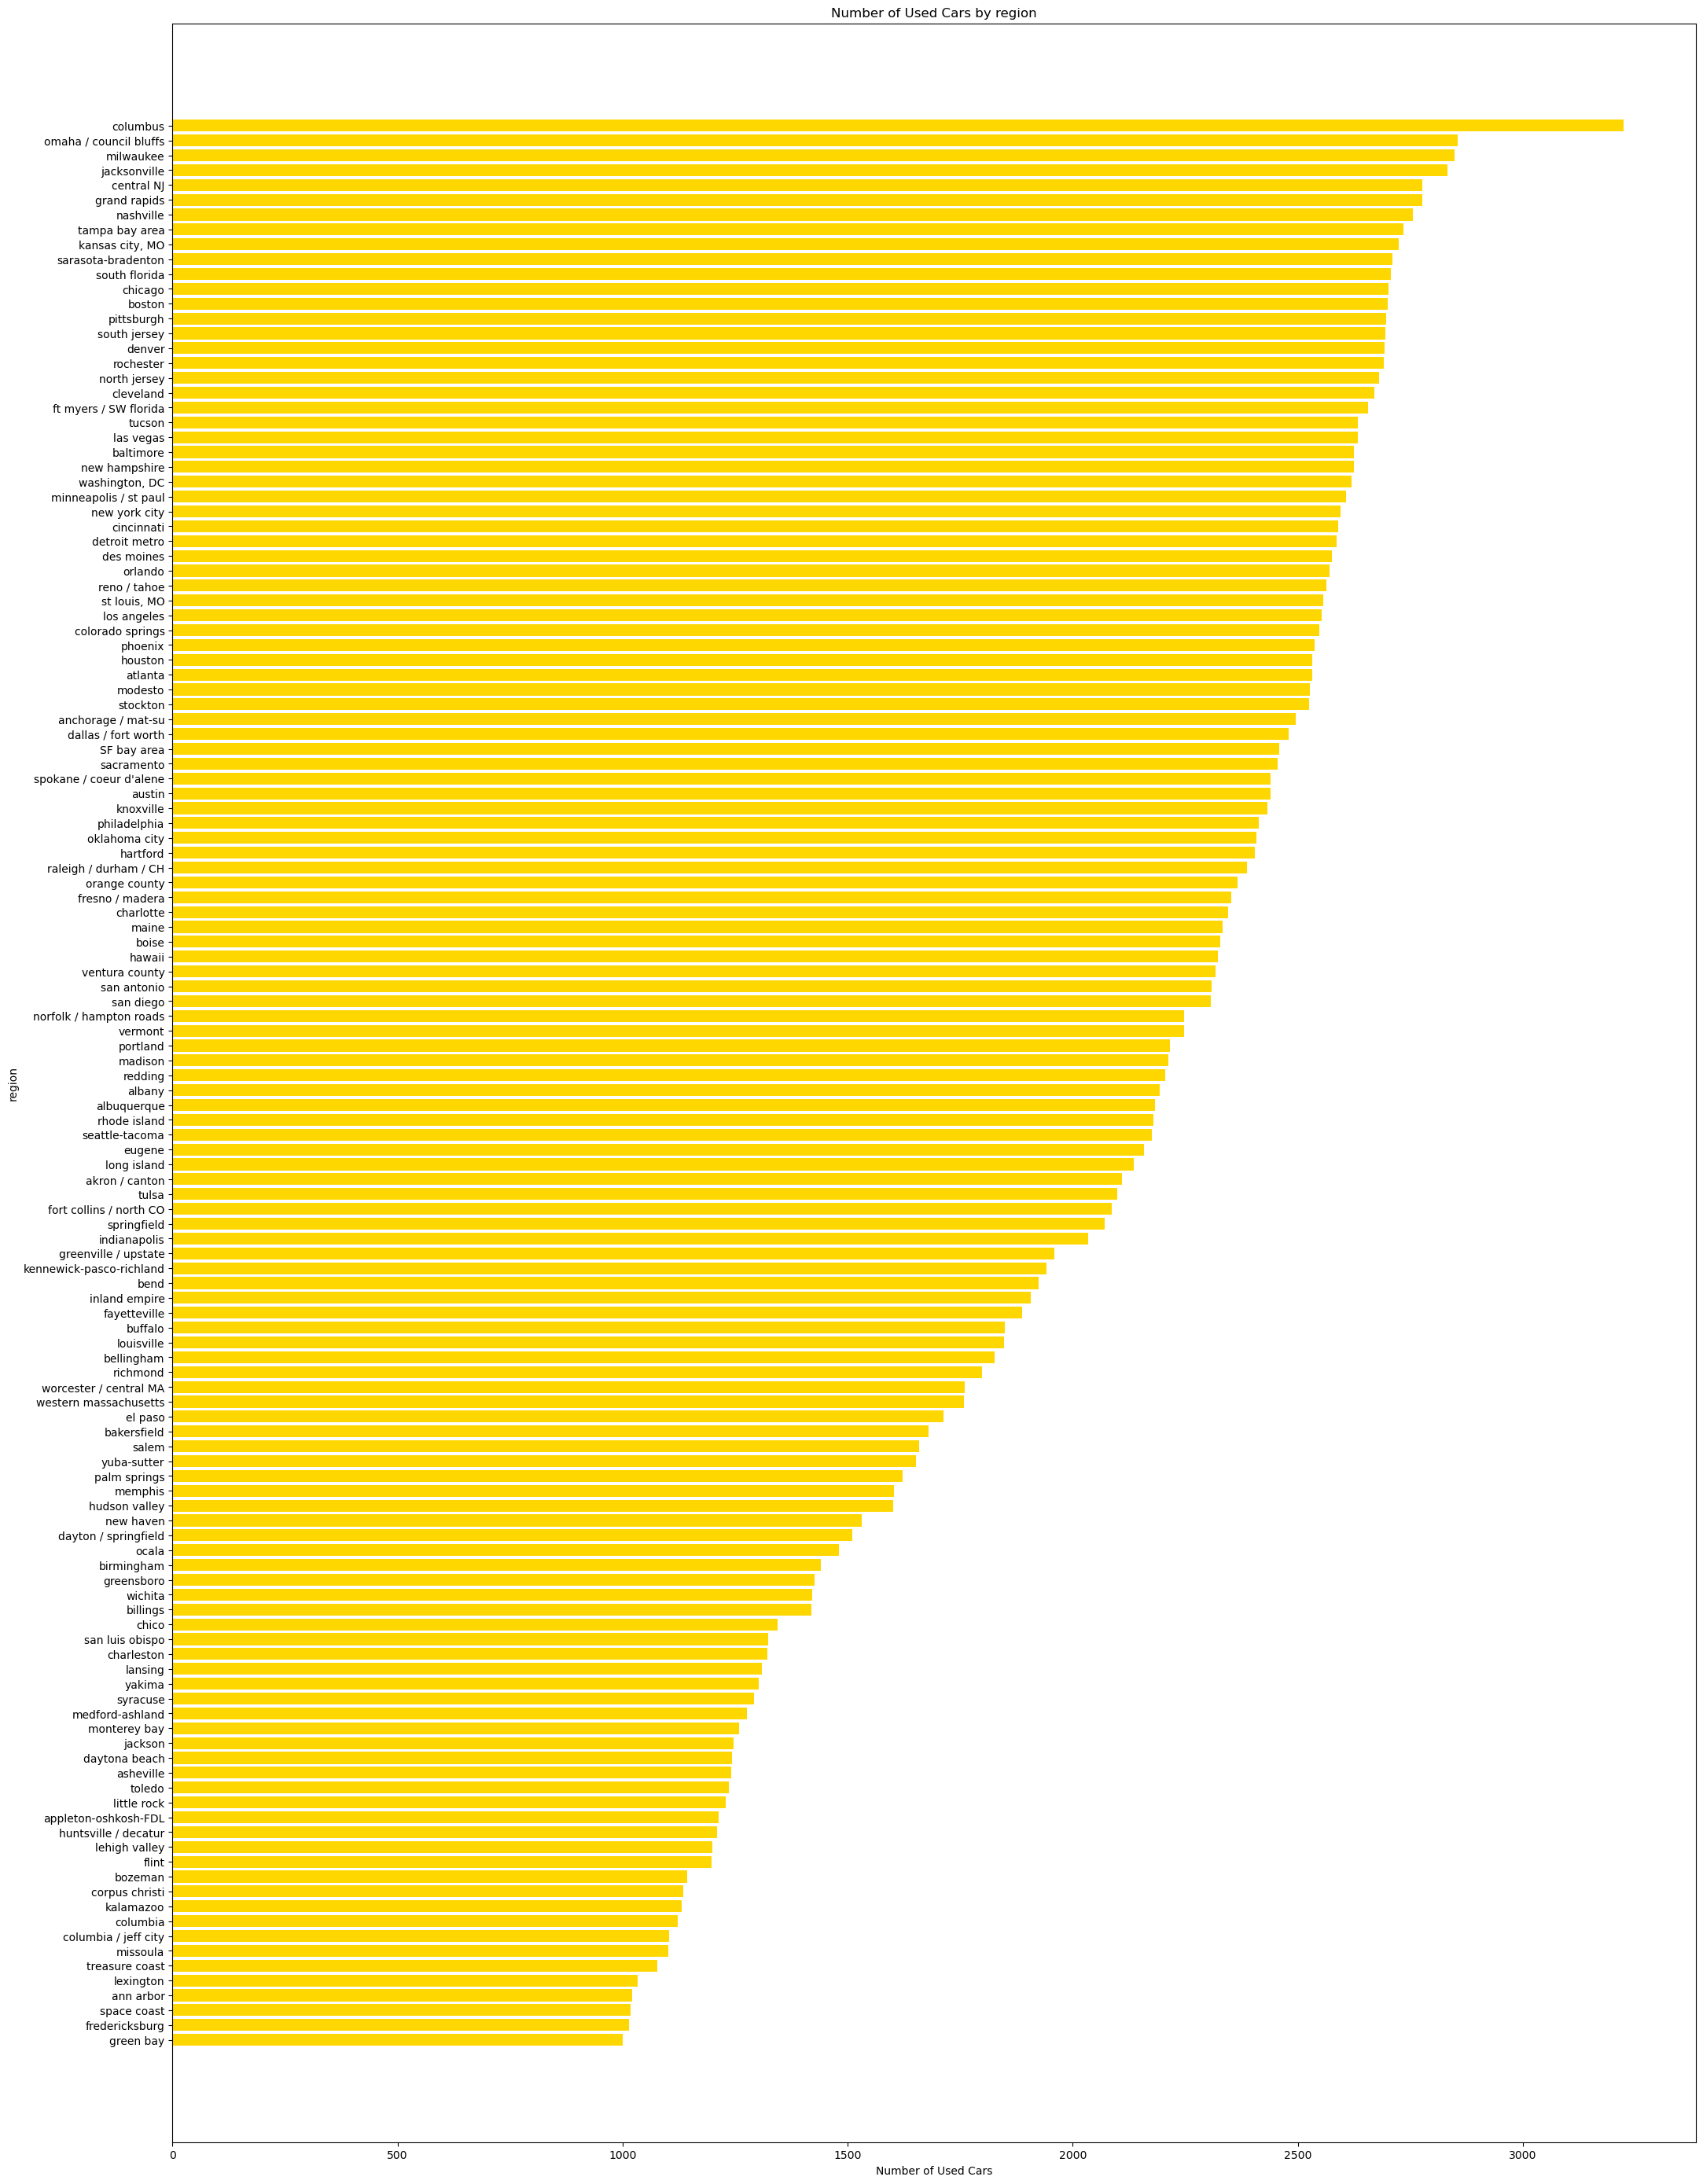

In [53]:
region_counts = filtered_data['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']
filtered_region_counts = region_counts[region_counts['count'] >= 1000]
plt.figure(figsize=(25, 35))
plt.barh(filtered_region_counts['region'], filtered_region_counts['count'], color='gold')
plt.xlabel('Number of Used Cars')
plt.ylabel('region')
plt.title('Number of Used Cars by region')
plt.gca().invert_yaxis()  # Invert y-axis to have the region with the highest count at the top
plt.show()

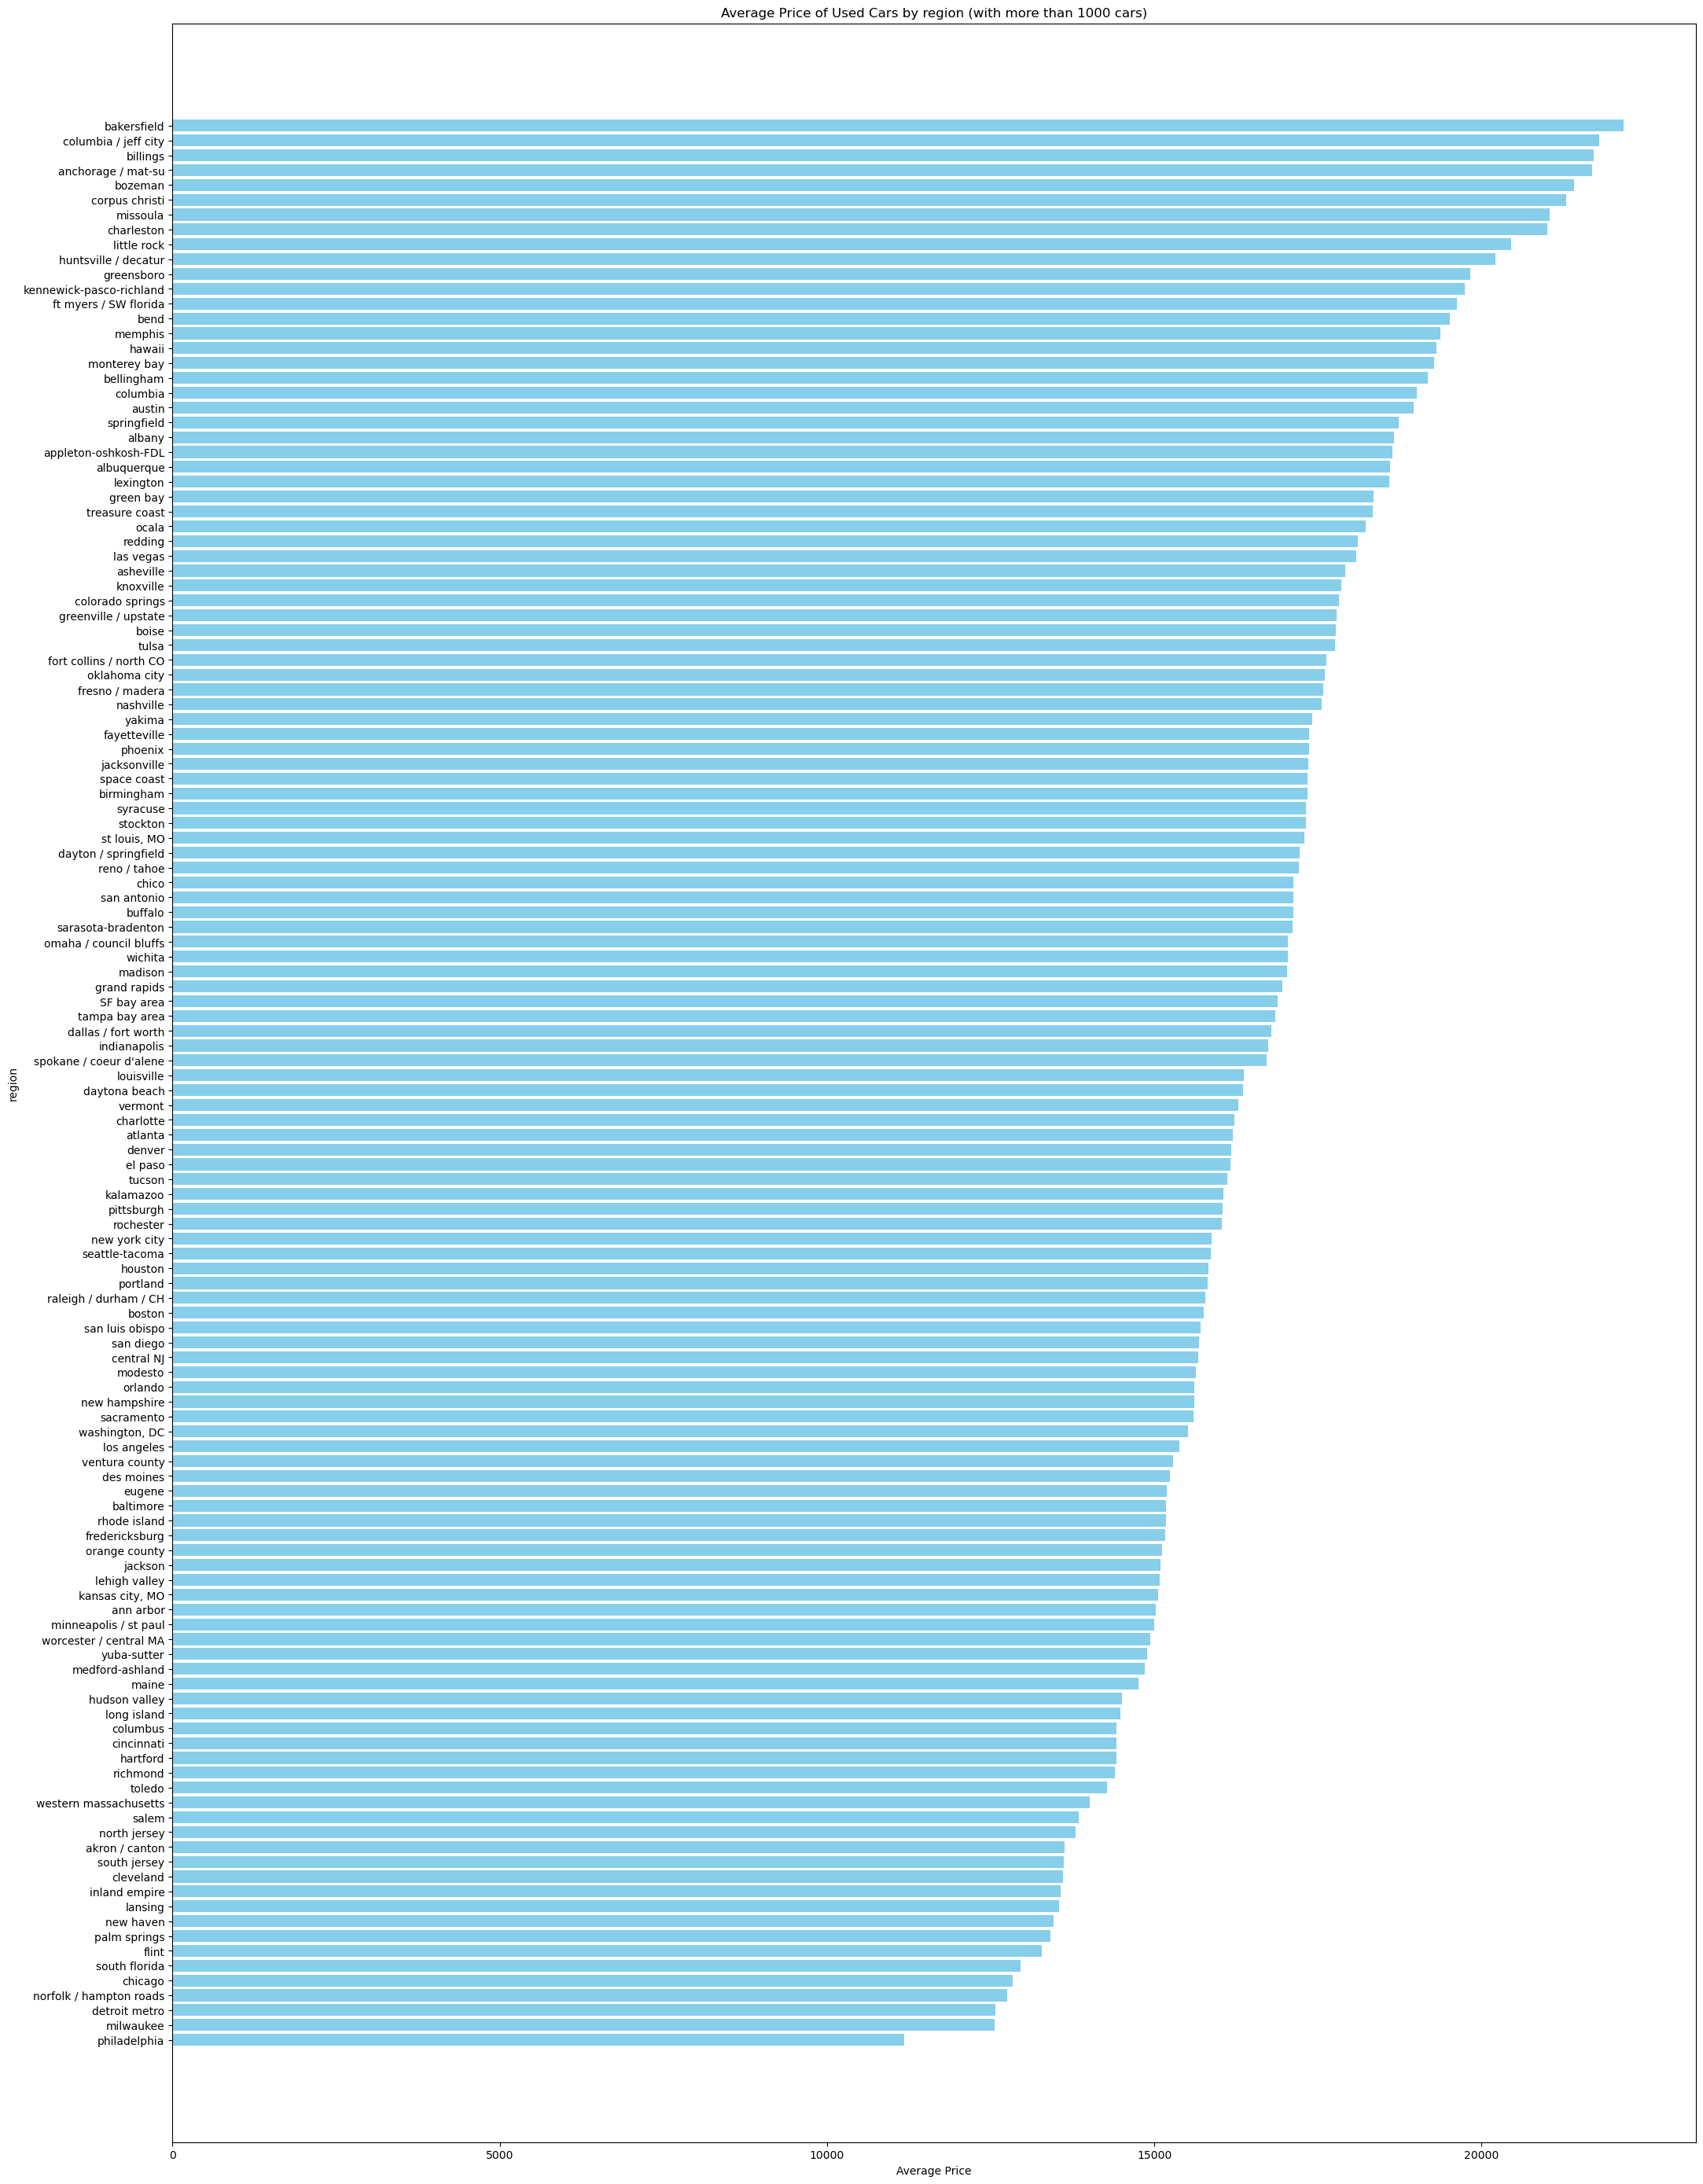

In [54]:
region_counts = filtered_data['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']
filtered_regions = region_counts[region_counts['count'] >= 1000]['region']
filtered_region_data = filtered_data[filtered_data['region'].isin(filtered_regions)]
avg_price_by_region = filtered_region_data.groupby('region')['price'].mean().reset_index()
avg_price_by_region = avg_price_by_region.sort_values(by='price', ascending=False)
plt.figure(figsize=(25, 35))
plt.barh(avg_price_by_region['region'], avg_price_by_region['price'], color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('region')
plt.title('Average Price of Used Cars by region (with more than 1000 cars)')
plt.gca().invert_yaxis()  # Invert y-axis to have the region with the highest average price at the top
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**Data Preparation Steps**

**Removing outliers**
- Removed outlier price data
- Removed outlier odometer data
- Filtered data to only include years after 2000
- Removed rows with unique "model" - model that had fewer than 500 instances 

**Handling null feature data**
- Filled out null  vehicle "manufacturer" data leveraging model information
  - Create a map of model to vehicle manufacturer
  - For rows with "null" vehicle manufacturer information, used the model information to look up vehicle manufacturer information
- Filled out null cylinder data leveraging model information
  - Create a map of model to cylinder
  - For rows with "null" cylinder information, used the model information to look up cylinder information
- Filled out null  vehicle "type" data leveraging model information
  - Create a map of model to vehicle type
  - For rows with "null" vehicle type information, used the model information to look up vehicle type information
- Filled out null  vehicle "size" data leveraging model information
  - Create a map of model to vehicle size
  - For rows with "null" vehicle size information, used the model information to look up vehicle size information
- Filled out null  vehicle "transmission" data leveraging model information
  - Create a map of model to vehicle transmission
  - For rows with "null" vehicle transmission information, used the model information to look up vehicle transmission information
- Filled out null  vehicle "drive" data leveraging model information
  - Create a map of model to vehicle drive
  - For rows with "null" vehicle drive information, used the model information to look up vehicle drive information
- Filled out "null" information for "paint color", "title_status" and "condition" with "other"


**Generating feature data - vehicle age**
- Created a new feature "vehicle_age" by subtracting year make of vehicle from the max year value in the data

**Scaling the numeric features**
- Used StandardScaler to scale the "odometer" and "vehicle_age" features

**One hot encoding categorical variables**
- One hot encoded the categorical variables using pd.getdummies

In [62]:
vehicles_data_clean=vehicles_data.copy()

In [63]:
lower_bound_price =vehicles_data['price'].quantile(0.10)
upper_bound_price = vehicles_data['price'].quantile(0.95)
vehicles_data_clean=vehicles_data_clean[
    (vehicles_data_clean['price'] >= lower_bound_price) & 
    (vehicles_data_clean['price'] <= upper_bound_price)
]
vehicles_data_clean.head()

id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2  NaN  NaN         NaN    fl  
3  NaN  NaN         NaN    ma  
4  NaN  NaN         NaN    nc

In [64]:
vehicles_data_clean = vehicles_data_clean[vehicles_data_clean['year'] >= 2000]

In [65]:
Q1_mileage = vehicles_data['odometer'].quantile(0.25)
Q3_mileage = vehicles_data['odometer'].quantile(0.75)
IQR = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR
upper_bound_mileage = Q3_mileage + 1.5 * IQR
vehicles_data_clean=vehicles_data_clean[
    (vehicles_data_clean['odometer'] >= lower_bound_mileage) & 
    (vehicles_data_clean['odometer'] <= upper_bound_mileage)
]
vehicles_data_clean.head()

id  region  price    year manufacturer                     model  \
27  7316814884  auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28  7316814758  auburn  22590  2010.0    chevrolet            silverado 1500   
29  7316814989  auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30  7316743432  auburn  30990  2017.0       toyota      tundra double cab sr   
31  7316356412  auburn  15000  2013.0         ford                 f-150 xlt   

    condition    cylinders fuel  odometer title_status transmission  \
27       good  8 cylinders  gas   57923.0        clean        other   
28       good  8 cylinders  gas   71229.0        clean        other   
29       good  8 cylinders  gas   19160.0        clean        other   
30       good  8 cylinders  gas   41124.0        clean        other   
31  excellent  6 cylinders  gas  128000.0        clean    automatic   

                  VIN drive       size    type paint_color state  
27  3GTP1VEC4EG551563   NaN        NaN  pickup       white    al  
28  1GCSCSE06AZ123805   NaN        NaN  pickup        blue    al  
29  3GCPWCED5LG130317   NaN        NaN  pickup         red    al  
30  5TFRM5F17HX120972   NaN        NaN  pickup         red    al  
31                NaN   rwd  full-size   truck       black    al

In [66]:
# filtering out the outlier models
model_counts = filtered_data['model'].value_counts().reset_index()
model_counts.columns = ['model', 'count']
filtered_models = model_counts[model_counts['count'] >= 500]['model']
vehicles_data_clean = vehicles_data_clean[vehicles_data_clean['model'].isin(filtered_models)]

In [67]:
# Create a mapping of models to their most common cylinder values
model_cylinders_mapping = vehicles_data_clean.groupby('model')['cylinders'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Fill null values in the 'cylinders' column using the mapping
vehicles_data_clean['cylinders'] = vehicles_data_clean.apply(
    lambda row: model_cylinders_mapping[row['model']] if pd.isnull(row['cylinders']) else row['cylinders'], axis=1
)


In [68]:
# Create a mapping of models to their manufacturer name
model_manufacturer_mapping = vehicles_data_clean.groupby('model')['manufacturer'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Fill null values in the 'manufacturer' column using the mapping
vehicles_data_clean['manufacturer'] = vehicles_data_clean.apply(
    lambda row: model_manufacturer_mapping[row['model']] if pd.isnull(row['manufacturer']) else row['manufacturer'], axis=1
)
#vehicles_data_clean = vehicles_data_clean[vehicles_data_clean['manufacturer'] != 'other']

In [69]:
# Create a mapping of models to their size
model_size_mapping = vehicles_data_clean.groupby('model')['size'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Fill null values in the 'cylinders' column using the mapping
vehicles_data_clean['size'] = vehicles_data_clean.apply(
    lambda row: model_size_mapping[row['model']] if pd.isnull(row['size']) else row['size'], axis=1
)


In [70]:
# Create a mapping of models to their type
model_type_mapping = vehicles_data_clean.groupby('model')['type'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Fill null values in the 'type' column using the mapping
vehicles_data_clean['type'] = vehicles_data_clean.apply(
    lambda row: model_type_mapping[row['model']] if pd.isnull(row['type']) else row['type'], axis=1
)


In [71]:
# Create a mapping of models to their drive
model_drive_mapping = vehicles_data_clean.groupby('model')['drive'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Fill null values in the 'drive' column using the mapping
vehicles_data_clean['drive'] = vehicles_data_clean.apply(
    lambda row: model_drive_mapping[row['model']] if pd.isnull(row['drive']) else row['drive'], axis=1
)

In [72]:
# Create a mapping of models to their transmission
model_transmission_mapping = vehicles_data_clean.groupby('model')['transmission'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Fill null values in the 'transmission' column using the mapping
vehicles_data_clean['transmission'] = vehicles_data_clean.apply(
    lambda row: model_transmission_mapping[row['model']] if pd.isnull(row['transmission']) else row['transmission'], axis=1
)

In [73]:
# Create a mapping of models to their fuel
model_fuel_mapping = vehicles_data_clean.groupby('model')['fuel'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'other')

# Fill null values in the 'fuel' column using the mapping
vehicles_data_clean['fuel'] = vehicles_data_clean.apply(
    lambda row: model_fuel_mapping[row['model']] if pd.isnull(row['fuel']) else row['fuel'], axis=1
)
#vehicles_data_clean = vehicles_data_clean[vehicles_data_clean['fuel'] != 'other']

In [74]:
vehicles_data_clean['paint_color'].fillna('other', inplace=True)
vehicles_data_clean['condition'].fillna('other', inplace=True)
vehicles_data_clean['title_status'].fillna('other', inplace=True)

In [75]:
null_counts = vehicles_data_clean.isnull().sum()
print(null_counts)

id                  0
region              0
price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
VIN             47139
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64


In [76]:
print(f"The size of the cleaned vehicles data set is {len(vehicles_data_clean)}")

The size of the cleaned vehicles data set is 116779


In [77]:
frequency_table = vehicles_data_clean['model'].value_counts().reset_index()
frequency_table.columns = ['model', 'frequency']

print(frequency_table)

                   model  frequency
0                  f-150       6076
1         silverado 1500       3933
2                   1500       3261
3                  camry       2546
4                 accord       2447
..                   ...        ...
101                f-350        503
102  silverado 1500 crew        502
103        sierra 2500hd        481
104      f250 super duty        474
105             camry le        467

[106 rows x 2 columns]


In [78]:
frequency_table = vehicles_data_clean['manufacturer'].value_counts().reset_index()
frequency_table.columns = ['manufacturer', 'frequency']

print(frequency_table)

     manufacturer  frequency
0            ford      22834
1       chevrolet      19610
2          toyota      13486
3           honda       8856
4            jeep       8093
5          nissan       7529
6             ram       5843
7             gmc       4785
8           dodge       4508
9          subaru       4077
10        hyundai       3389
11            bmw       2545
12            kia       2390
13       chrysler       1927
14     volkswagen       1813
15  mercedes-benz       1374
16       cadillac       1156
17          acura        659
18          buick        651
19          other        640
20           audi        614


In [79]:
vehicles_data_analysis = vehicles_data_clean.copy()
vehicles_data_analysis.drop(columns=['VIN'], inplace=True)

In [80]:
max_year = vehicles_data_analysis['year'].max()
# Create the 'vehicle_age' column
vehicles_data_analysis['vehicle_age'] = max_year - vehicles_data_analysis['year']

# Convert 'vehicle_age' to integer type
vehicles_data_analysis['vehicle_age'] = vehicles_data_analysis['vehicle_age'].astype(int)


In [81]:
frequency_table = vehicles_data_analysis['vehicle_age'].value_counts().reset_index()
frequency_table.columns = ['vehicle_age', 'frequency']

print(frequency_table)

    vehicle_age  frequency
0             9      10291
1             8      10093
2             7       9472
3             5       9272
4             6       8918
5            10       8429
6            11       7749
7             4       7579
8            12       6327
9            14       5772
10           15       4905
11            3       4491
12           13       4397
13           16       3816
14           17       3275
15           18       2946
16           19       2284
17            2       2268
18           20       1748
19           21       1395
20           22       1072
21            1        275
22            0          5


In [82]:
vehicles_data_analysis.drop(columns=['year'], inplace=True)

In [83]:
vehicles_data_analysis['odometer'] = vehicles_data_analysis['odometer'].astype(int)

In [84]:
vehicles_data_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116779 entries, 28 to 426869
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            116779 non-null  int64 
 1   region        116779 non-null  object
 2   price         116779 non-null  int64 
 3   manufacturer  116779 non-null  object
 4   model         116779 non-null  object
 5   condition     116779 non-null  object
 6   cylinders     116779 non-null  object
 7   fuel          116779 non-null  object
 8   odometer      116779 non-null  int32 
 9   title_status  116779 non-null  object
 10  transmission  116779 non-null  object
 11  drive         116779 non-null  object
 12  size          116779 non-null  object
 13  type          116779 non-null  object
 14  paint_color   116779 non-null  object
 15  state         116779 non-null  object
 16  vehicle_age   116779 non-null  int32 
dtypes: int32(2), int64(2), object(13)
memory usage: 15.1+ MB


In [85]:
# storing the numeric columns - standard deviation.
std_odometer = vehicles_data_analysis['odometer'].std()
std_vehicle_age = vehicles_data_analysis['vehicle_age'].std()
print(f"The standard deviation of mileage is {std_odometer}")
print(f"The standard deviation of vehicle age is {std_vehicle_age}")

The standard deviation of mileage is 57101.063184025435
The standard deviation of vehicle age is 4.740413382919393


In [86]:
vehicles_data_analysis_df1=vehicles_data_analysis.copy()
vehicles_data_analysis_df1_encoded=pd.get_dummies(vehicles_data_analysis_df1, drop_first=True)
# Initialize the StandardScaler, scale vehicle age and odometer and drop the unscaled columns
scaler = StandardScaler()
vehicles_data_analysis_df1_encoded['odometer_scaled'] = scaler.fit_transform(vehicles_data_analysis_df1_encoded[['odometer']])
vehicles_data_analysis_df1_encoded['vehicle_age_scaled'] = scaler.fit_transform(vehicles_data_analysis_df1_encoded[['vehicle_age']])

vehicles_data_analysis_df1_encoded.drop(['odometer', 'vehicle_age'], axis=1, inplace=True)
vehicles_data_analysis_df1_encoded.head()

id  price  region_abilene  region_akron / canton  region_albany  \
28  7316814758  22590           False                  False          False   
29  7316814989  39590           False                  False          False   
34  7316285779  35000           False                  False          False   
38  7315816316  32990           False                  False          False   
39  7315770394  24590           False                  False          False   

    region_albuquerque  region_altoona-johnstown  region_amarillo  \
28               False                     False            False   
29               False                     False            False   
34               False                     False            False   
38               False                     False            False   
39               False                     False            False   

    region_ames  region_anchorage / mat-su  ...  state_tx  state_ut  state_va  \
28        False                      False  ...     False     False     False   
29        False                      False  ...     False     False     False   
34        False                      False  ...     False     False     False   
38        False                      False  ...     False     False     False   
39        False                      False  ...     False     False     False   

    state_vt  state_wa  state_wi  state_wv  state_wy  odometer_scaled  \
28     False     False     False     False     False        -0.619203   
29     False     False     False     False     False        -1.531081   
34     False     False     False     False     False        -1.113574   
38     False     False     False     False     False        -1.340523   
39     False     False     False     False     False        -1.152382   

    vehicle_age_scaled  
28            0.461040  
29           -1.648489  
34           -1.437536  
38           -1.015630  
39           -1.015630  

[5 rows x 637 columns]

In [87]:
vehicles_data_analysis_df1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116779 entries, 28 to 426869
Columns: 637 entries, id to vehicle_age_scaled
dtypes: bool(633), float64(2), int64(2)
memory usage: 75.0 MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Modeling approach**
- Used the "cleaned" and "feature engineered" data 
- Created a "X" dataframe with all the features and "y" series with all the "price" values
- Split X,y into training and test data
- Developed three regression models
  - Simple Linear Regression
  - Ridge Model
  - Lasso Model
- Simple Linear Regression
  - Created a linear regression model that will not generate any intercept
  - Fit the model with training data 
  - Generated predicted values from test data and training data
  - Calculated mean squared error for predicted test and training data
  - Plotted the predicted and actual values of price on the test and training data
- Ridge Regression
  - Used GridSearchCV to find the optimal alpha for a Ridge Regression Model without intercept 
  - For alpha used range of values 0.01,0.1, 1, 10, 100
  - Fit the model with training data 
  - Generated predicted values from test data and training data
  - Calculated mean squared error for predicted test and training data
  - Plotted the predicted and actual values of price on the test and training data
- Lasso Regression
  - Used GridSearchCV to find the optimal alpha for a Lasso Regression Model without intercept 
  - For alpha used range of values 0.01,0.1, 1, 10, 100
  - Fit the model with training data 
  - Generated predicted values from test data and training data
  - Calculated mean squared error for predicted test and training data
  - Plotted the predicted and actual values of price on the test and training data

**Modeling findings**

**Lasso Model performs best for the used vehicle data**
- Optimal alpha for Lasso: 0.1
- Train MSE: 22485243.949973114
- Test MSE: 23317814.275552988

**Ridge Model also performs well for the used vehicle data**
- Optimal alpha for Ridge: 0.1
- Train MSE: 22467870.146852665
- Test MSE: 23339929.260016266

**Linear Regression Model does not perform well as it overfits vehicle data**
- Train MSE: 22469272.49029094
- Test MSE: 3.137284398551681e+27

**Lasso Model findings**
- Using the coefficients for the Lasso Model we can determine how vehicle price is impacted
  - Impact of mileage 
  - Impact of vehicle age
  - Vehicle make and model
  - Vehicle type and size
  - Vehicle drive type (RWD, FWD) , transmission
  - Vehicle color, condition and title status
  - State and region where the vehicle was sold

In [95]:
vehicles_data_analysis_df1_encoded.set_index('id', inplace=True)

In [96]:
X=vehicles_data_analysis_df1_encoded.drop('price', axis = 1)
y=vehicles_data_analysis_df1_encoded['price']

In [97]:
null_counts = X.isnull().sum()
print(null_counts)

region_abilene              0
region_akron / canton       0
region_albany               0
region_albuquerque          0
region_altoona-johnstown    0
                           ..
state_wi                    0
state_wv                    0
state_wy                    0
odometer_scaled             0
vehicle_age_scaled          0
Length: 635, dtype: int64


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [99]:
#Simple Linear Regression model with all the features
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)
        
# Predict and evaluate
linreg_test_pred = linreg.predict(X_test)
linreg_train_pred = linreg.predict(X_train)
min_price=np.min(linreg_test_pred )
max_price=np.max(linreg_test_pred )
min_test_price=np.min(y_test)
max_test_price=np.max(y_test)
print(f"The minimum predicted price is {min_price}")
print(f"The max predicted price is {max_price}")
print(f"The min test data price is {min_test_price}")
print(f"The max test data price is {max_test_price}")
# Assuming y_pred is your array of predicted prices
linreg_test_mse = mean_squared_error(y_test, linreg_test_pred)
linreg_train_mse=mean_squared_error(y_train, linreg_train_pred)

print(f"The mean squared error for the training set for simple linear regression  {linreg_train_mse}")
print(f"The mean squared error for the validation set for simple linear regression {linreg_test_mse }")

The minimum predicted price is -1.0483874361073574e+16
The max predicted price is 45040.76231129289
The min test data price is 500
The max test data price is 44500
The mean squared error for the training set for simple linear regression  22469272.49029094
The mean squared error for the validation set for simple linear regression 3.137284398551681e+27


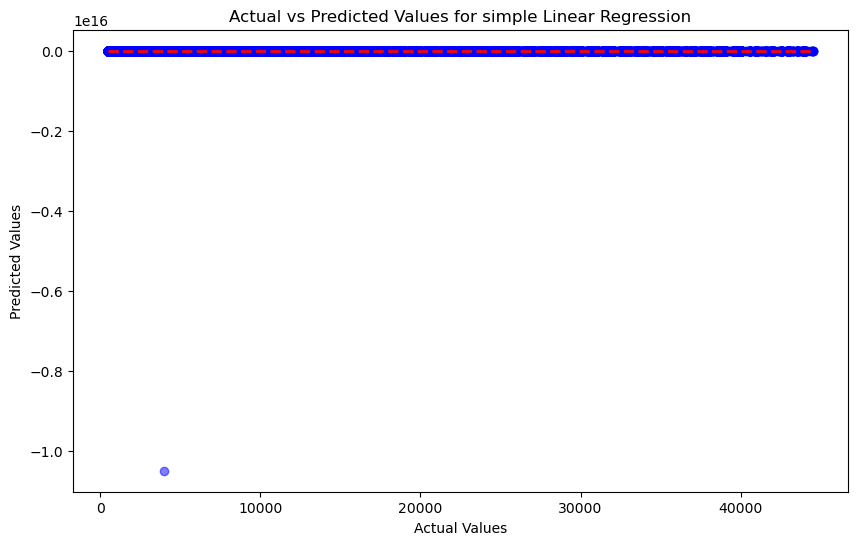

In [100]:
# Scatter plot of y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linreg_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for simple Linear Regression')
plt.show()

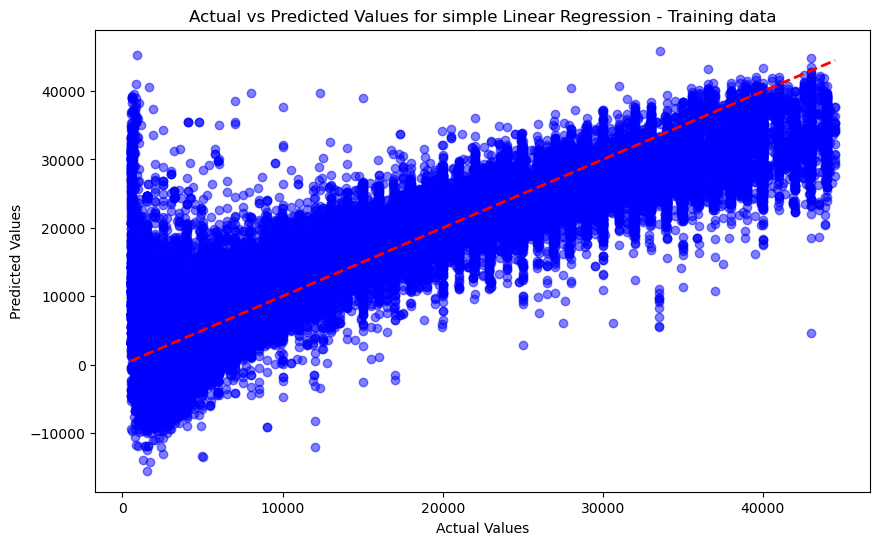

In [101]:
# Scatter plot of y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_train, linreg_train_pred, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for simple Linear Regression - Training data')
plt.show()

**Ridge Model - with optimal alpha**

In [103]:
ridge_param_dict = {'alpha': [0.01,0.1, 1, 10, 100]}
ridge_model = Ridge(fit_intercept=False)
ridge_grid = GridSearchCV(ridge_model, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
optimal_ridge_alpha = ridge_grid.best_params_['alpha']
print(f'Optimal alpha: {optimal_ridge_alpha}')

Train MSE: 22467870.146852665
Test MSE: 23339929.260016266
Optimal alpha: 0.1


In [104]:
min_price_ridge=np.min(ridge_test_preds)
max_price_ridge=np.max(ridge_test_preds)
print(f"The minimum predicted price for Ridge Model is {min_price_ridge}")
print(f"The max predicted price for Ridge Model {max_price_ridge}")

The minimum predicted price for Ridge Model is -22402.402053253256
The max predicted price for Ridge Model 44609.365404129974


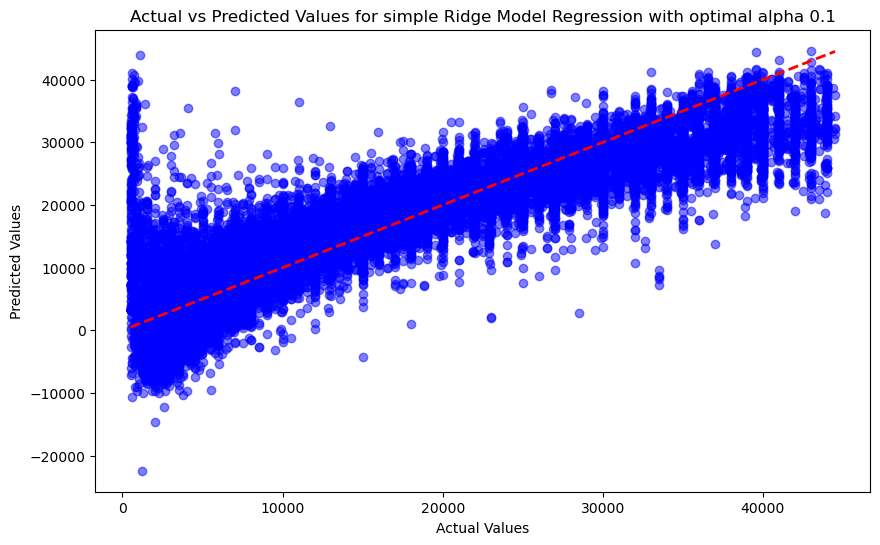

In [105]:
# Scatter plot of y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_test_preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values for simple Ridge Model Regression with optimal alpha {optimal_ridge_alpha}')
plt.show()

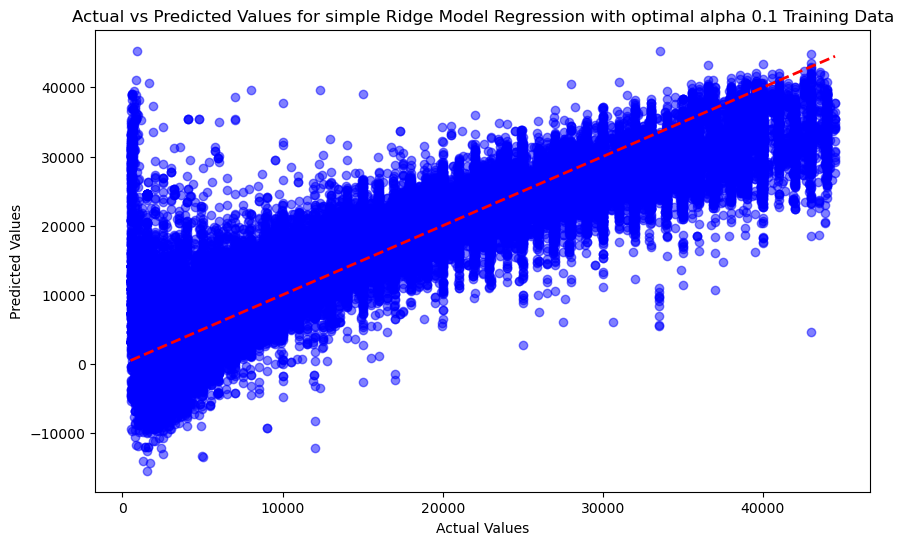

In [106]:
# Scatter plot of y_train vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_train, ridge_train_preds, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values for simple Ridge Model Regression with optimal alpha {optimal_ridge_alpha} Training Data')
plt.show()

**Lasso Regression Model**

In [108]:
#Lasso
lasso_param_dict = {'alpha': [0.01,0.1,1, 10, 100]}
lasso_model = Lasso(fit_intercept=False)
lasso_grid = GridSearchCV(lasso_model, param_grid=lasso_param_dict)
lasso_grid.fit(X_train, y_train)
lasso_train_preds = lasso_grid.predict(X_train)
lasso_test_preds = lasso_grid.predict(X_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_preds)
lasso_test_mse = mean_squared_error(y_test, lasso_test_preds)
print(f'Train MSE: {lasso_train_mse}')
print(f'Test MSE: {lasso_test_mse}')
optimal_lasso_alpha = lasso_grid.best_params_['alpha']
print(f'Optimal alpha for Lasso : {optimal_lasso_alpha}')

Train MSE: 22485243.949973114
Test MSE: 23317814.275552988
Optimal alpha for Lasso : 0.1


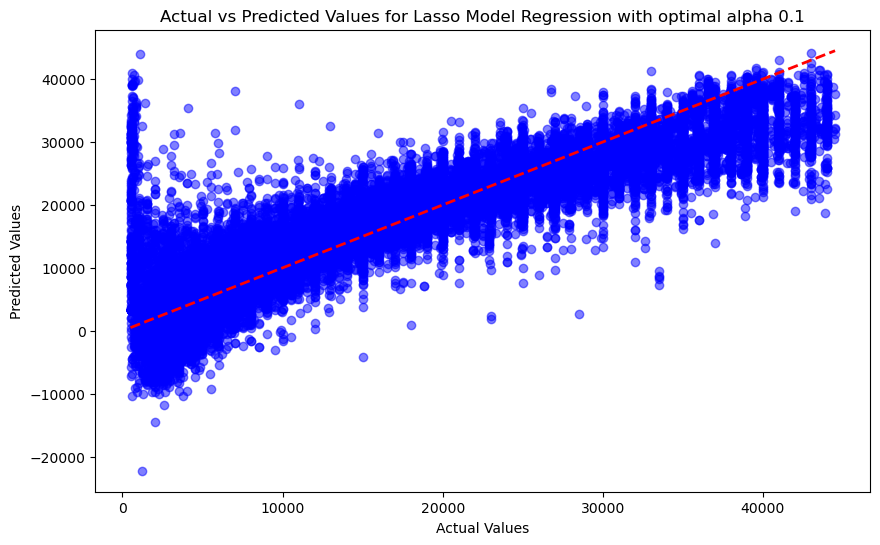

In [109]:
# Scatter plot of y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_test_preds, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values for Lasso Model Regression with optimal alpha {optimal_lasso_alpha}')
plt.show()

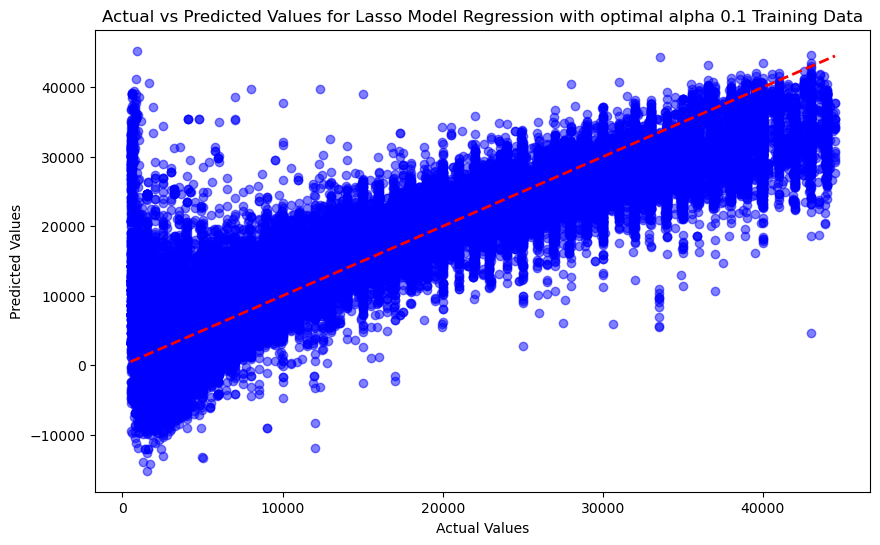

In [110]:
# Scatter plot of y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_train, lasso_train_preds, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values for Lasso Model Regression with optimal alpha {optimal_lasso_alpha} Training Data')
plt.show()

In [111]:
#Comparing the regression models
regression_model_dict={"Regression Model": ["Linear", "Ridge", "Lasso"], "Training MSE": [linreg_train_mse, ridge_train_mse, lasso_train_mse],\
                       "Testing MSE" : [linreg_test_mse, ridge_test_mse, lasso_test_mse]}
regression_model_df=pd.DataFrame(regression_model_dict)
print(regression_model_df)

  Regression Model  Training MSE   Testing MSE
0           Linear  2.246927e+07  3.137284e+27
1            Ridge  2.246787e+07  2.333993e+07
2            Lasso  2.248524e+07  2.331781e+07


**Lasso Model performs the best**

In [113]:
# Feature weights
# Create DataFrame with feature names and weights

lasso_feature_names = X_train.columns
lasso_feature_weights = lasso_grid.best_estimator_.coef_
lasso_weights_df = pd.DataFrame({'Feature': lasso_feature_names, 'Weight': lasso_feature_weights})

print(lasso_weights_df)

                      Feature       Weight
0              region_abilene  1027.641756
1       region_akron / canton   -57.241785
2               region_albany  1360.551823
3          region_albuquerque   113.047810
4    region_altoona-johnstown  1486.780691
..                        ...          ...
630                  state_wi  2802.489515
631                  state_wv  5035.932149
632                  state_wy     0.000000
633           odometer_scaled -2623.489246
634        vehicle_age_scaled -5095.672495

[635 rows x 2 columns]


In [114]:
#Impact of mileage and vehicle age
# Change in odometer (1000 miles)
odometer_change = 1000 / std_odometer

# Change in vehicle age (1 year)
vehicle_age_change = 1 / std_vehicle_age

odometer_coef=lasso_weights_df.loc[lasso_weights_df['Feature'] == 'odometer_scaled', 'Weight'].values[0]
vehicle_age_coef=lasso_weights_df.loc[lasso_weights_df['Feature'] == 'vehicle_age_scaled', 'Weight'].values[0]
print(f"The coefficient of the scaled odometer feature is {odometer_coef}")
print(f"The coefficient of the scaled vehicle age feature is {vehicle_age_coef}")
# Select the value of 'weight' where 'feature' equals 'odometer_scaled'
#weight_value = df.loc[df['feature'] == 'odometer_scaled', 'weight'].values[0]

# Impact on price
price_change_mileage = (odometer_coef * odometer_change)
price_change_vehicle_age = (vehicle_age_coef * vehicle_age_change)
print(f"The impact of 1000 additional miles on vehicle price is {price_change_mileage}")
print(f"The impact of 1 additional year of vehicle age on vehicle price is {price_change_vehicle_age}")

The coefficient of the scaled odometer feature is -2623.489245784625
The coefficient of the scaled vehicle age feature is -5095.672494837604
The impact of 1000 additional miles on vehicle price is -45.94466546672936
The impact of 1 additional year of vehicle age on vehicle price is -1074.9426438627222


In [115]:
#Assessing the impact of manufacturer on vehicle price
manufacturer_df = lasso_weights_df.query('Feature.str.startswith("manufacturer")')
manufacturer_df = manufacturer_df.sort_values(by='Weight', ascending=False)


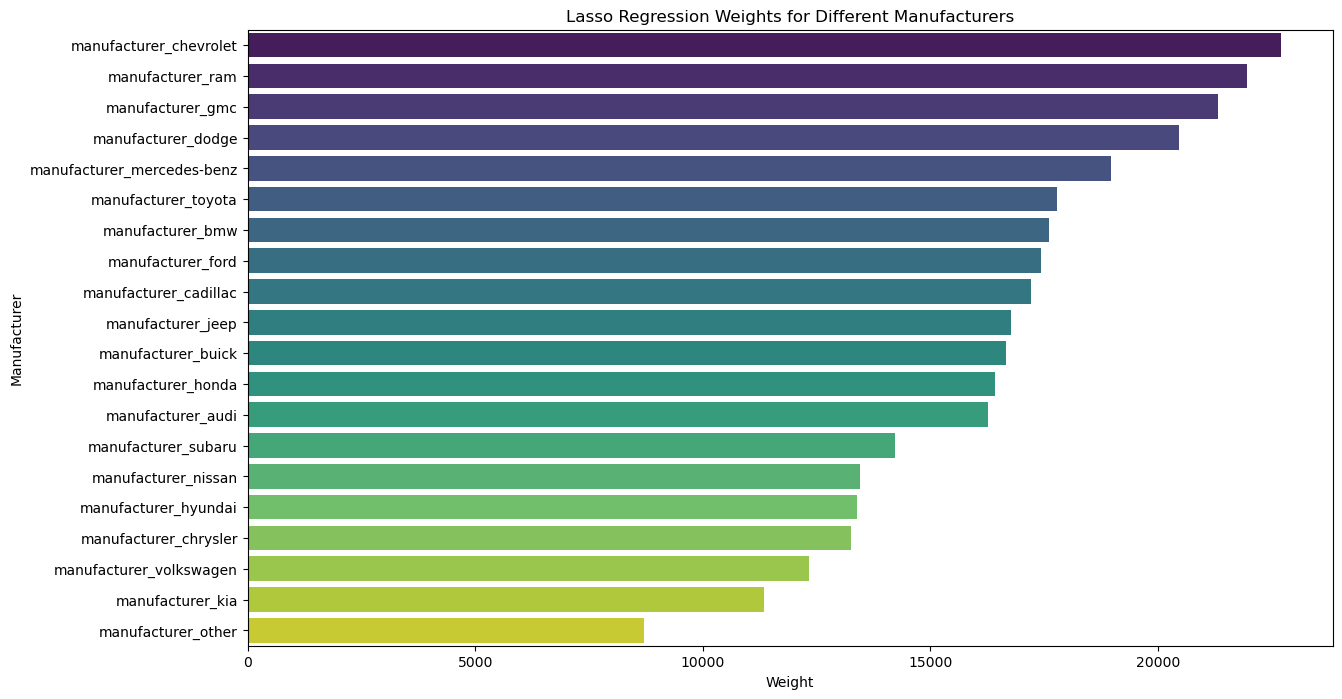

In [116]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=manufacturer_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Manufacturer')
plt.title('Lasso Regression Weights for Different Manufacturers')
plt.show()

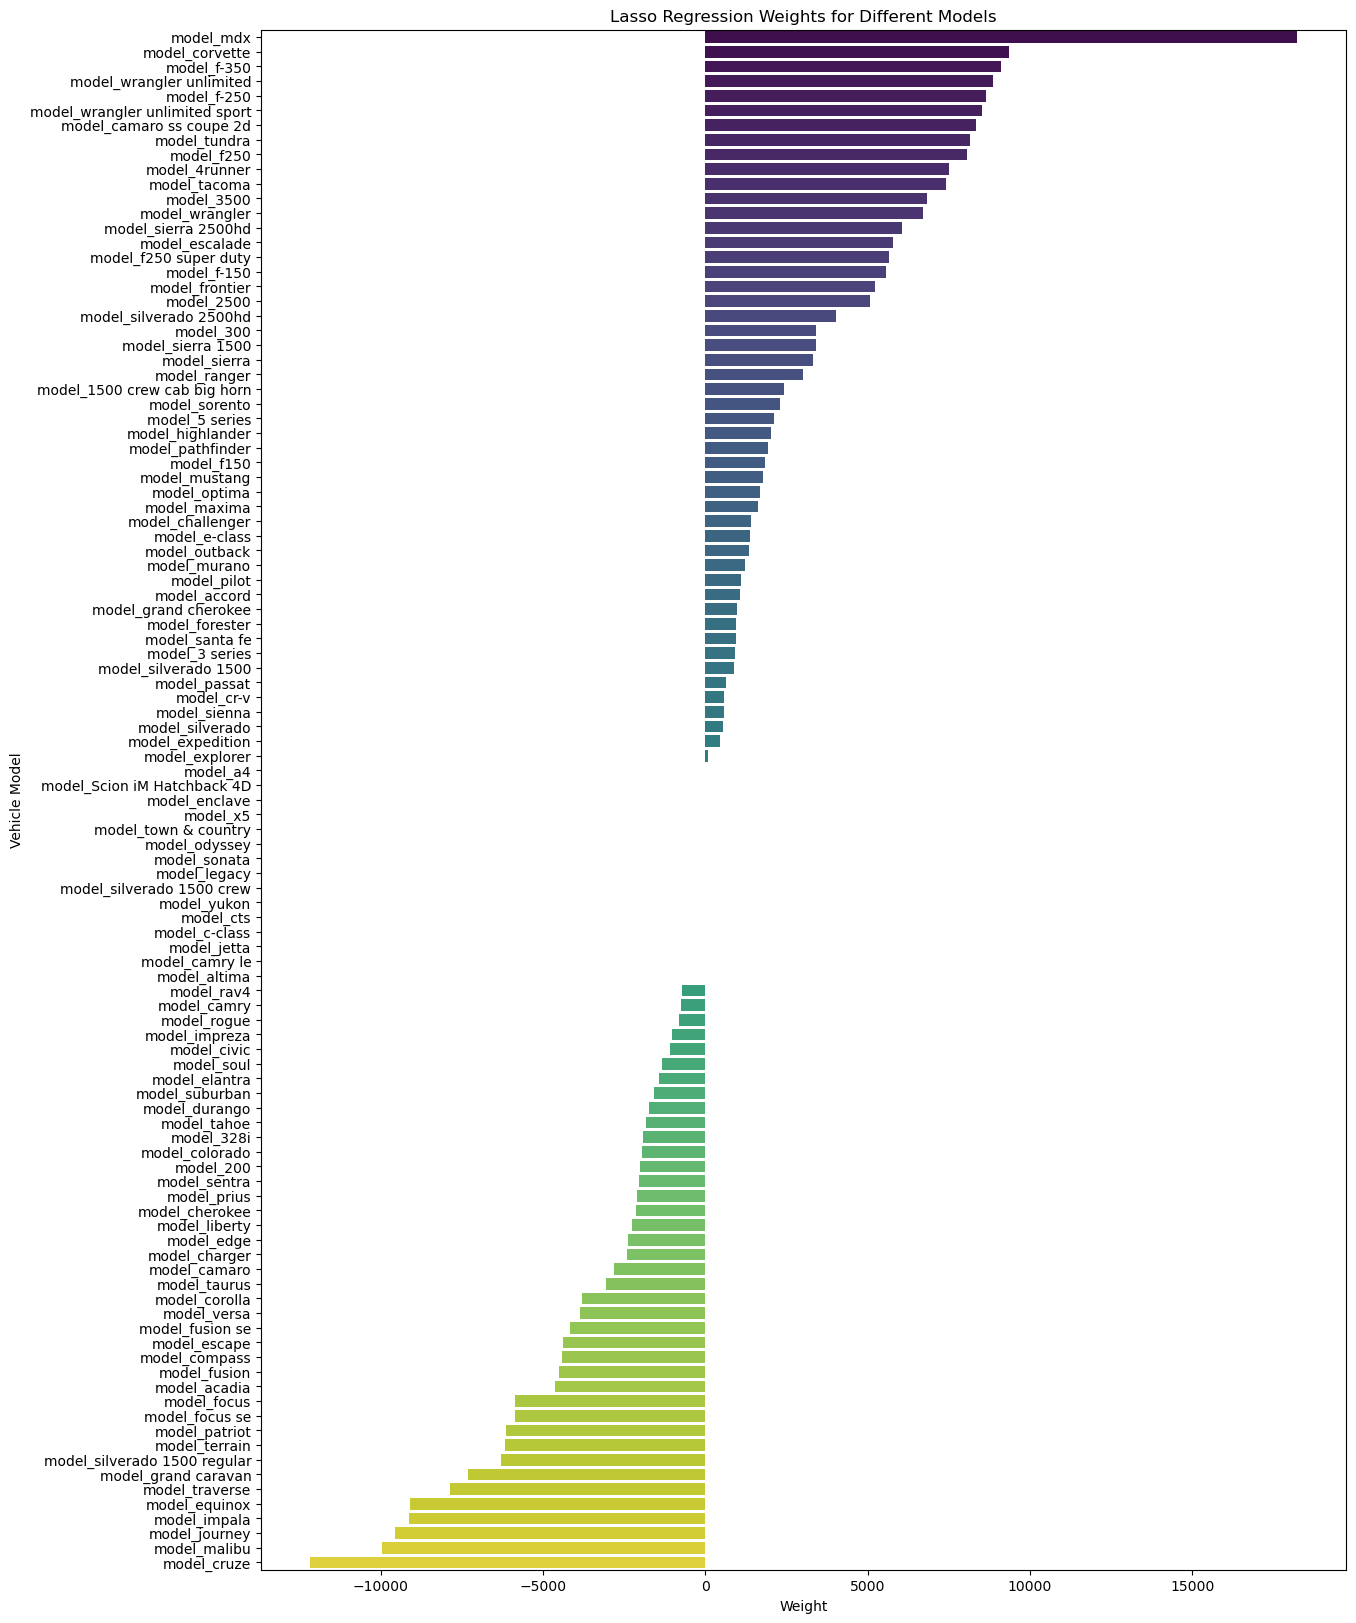

In [117]:
#Assessing the impact of manufacturer on vehicle price
model_df = lasso_weights_df.query('Feature.str.startswith("model")')
model_df = model_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 20))
sns.barplot(x='Weight', y='Feature', data=model_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Model')
plt.title('Lasso Regression Weights for Different Models')
plt.show()

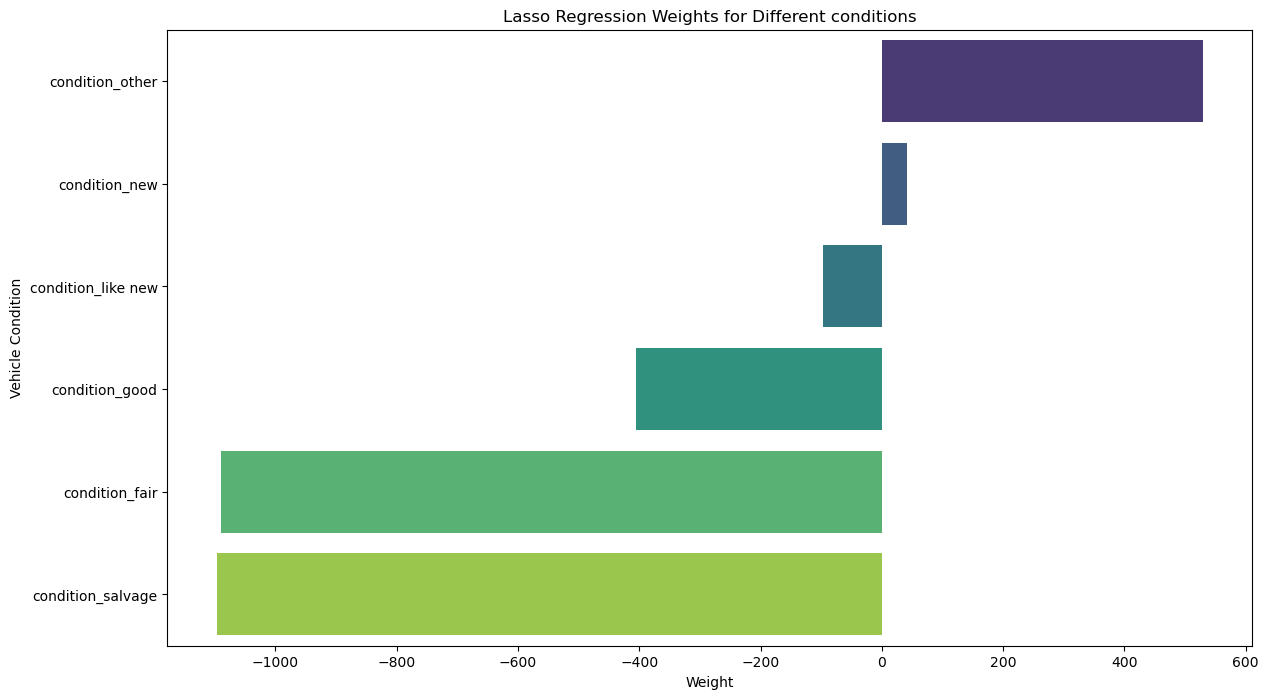

In [118]:
condition_df = lasso_weights_df.query('Feature.str.startswith("condition")')
condition_df = condition_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=condition_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Condition')
plt.title('Lasso Regression Weights for Different conditions')
plt.show()

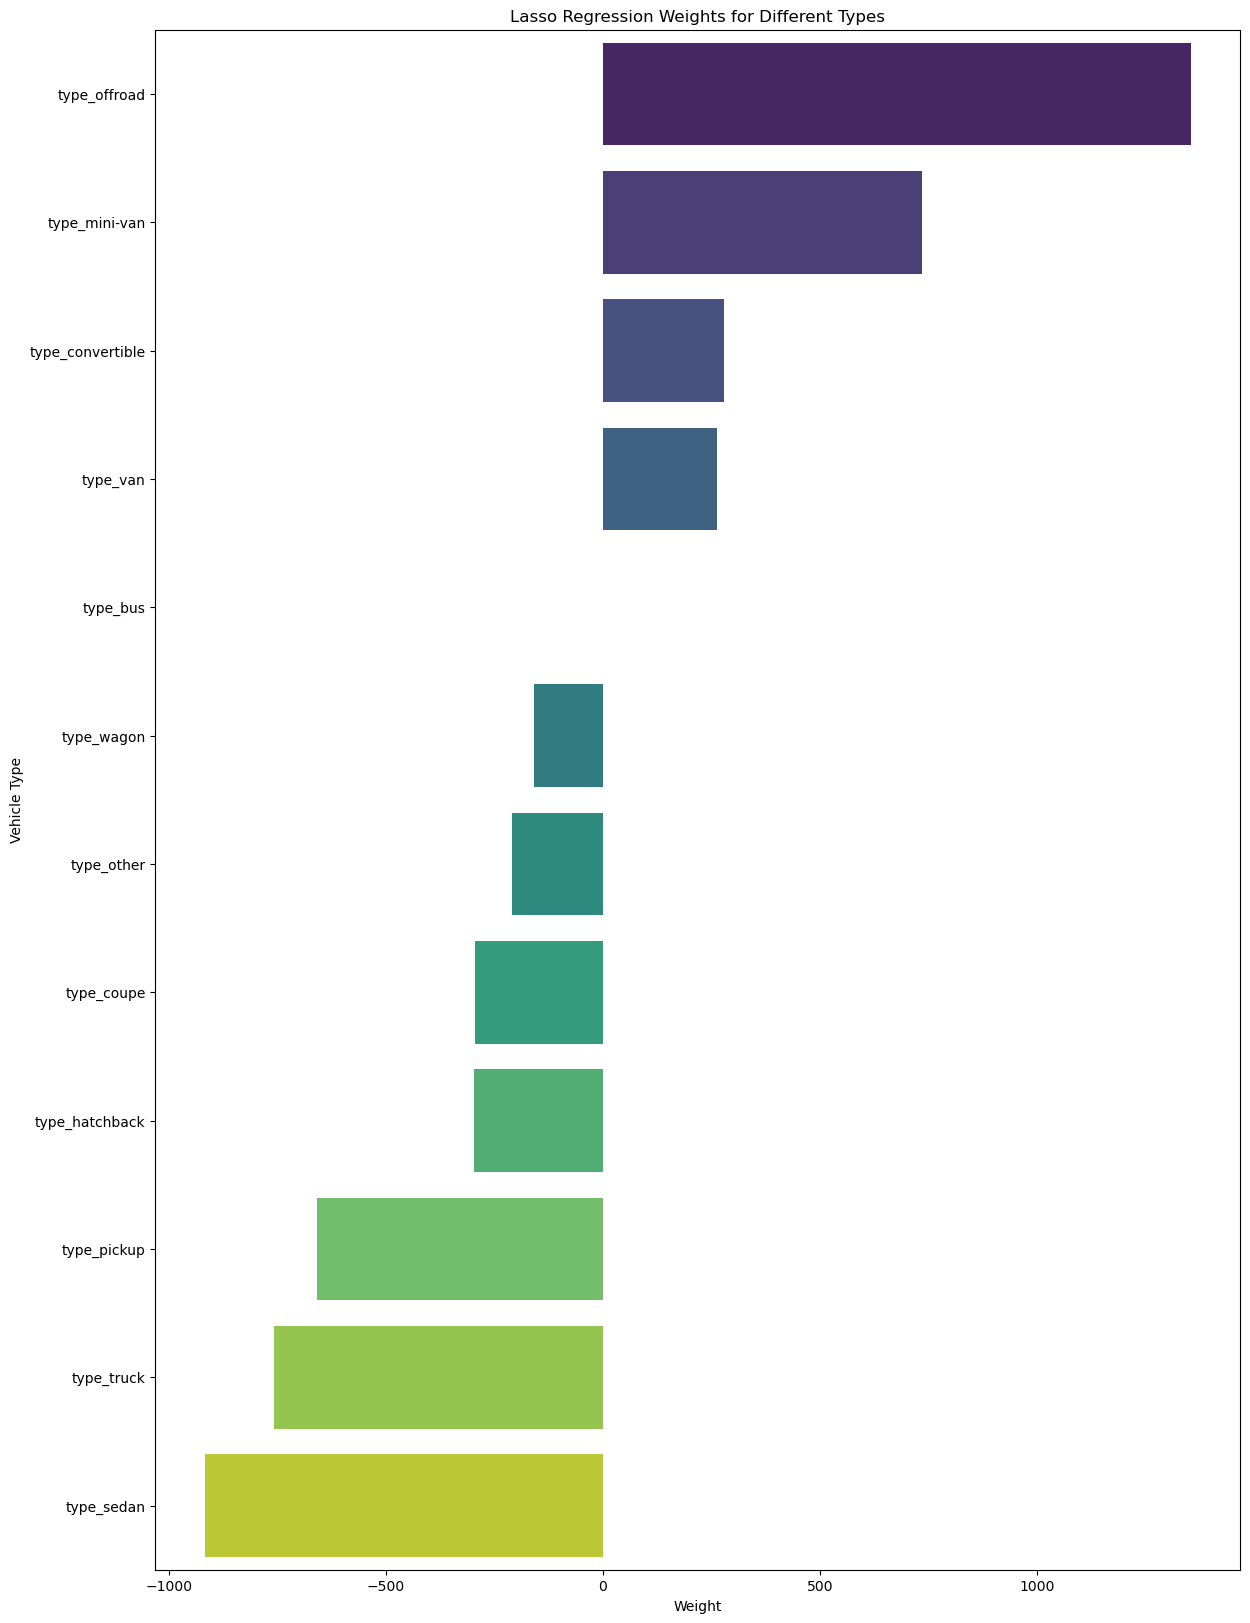

In [119]:
type_df = lasso_weights_df.query('Feature.str.startswith("type")')
type_df = type_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 20))
sns.barplot(x='Weight', y='Feature', data=type_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Type')
plt.title('Lasso Regression Weights for Different Types')
plt.show()

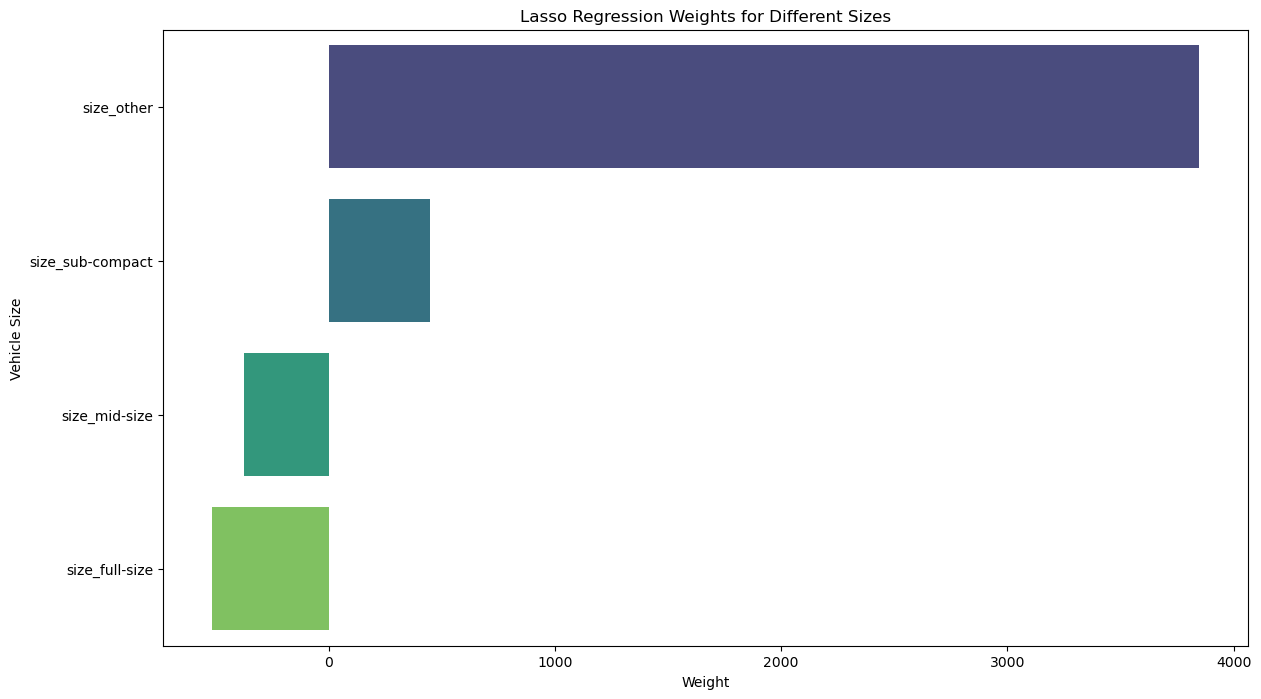

In [120]:
size_df = lasso_weights_df.query('Feature.str.startswith("size")')
size_df = size_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=size_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Size')
plt.title('Lasso Regression Weights for Different Sizes')
plt.show()

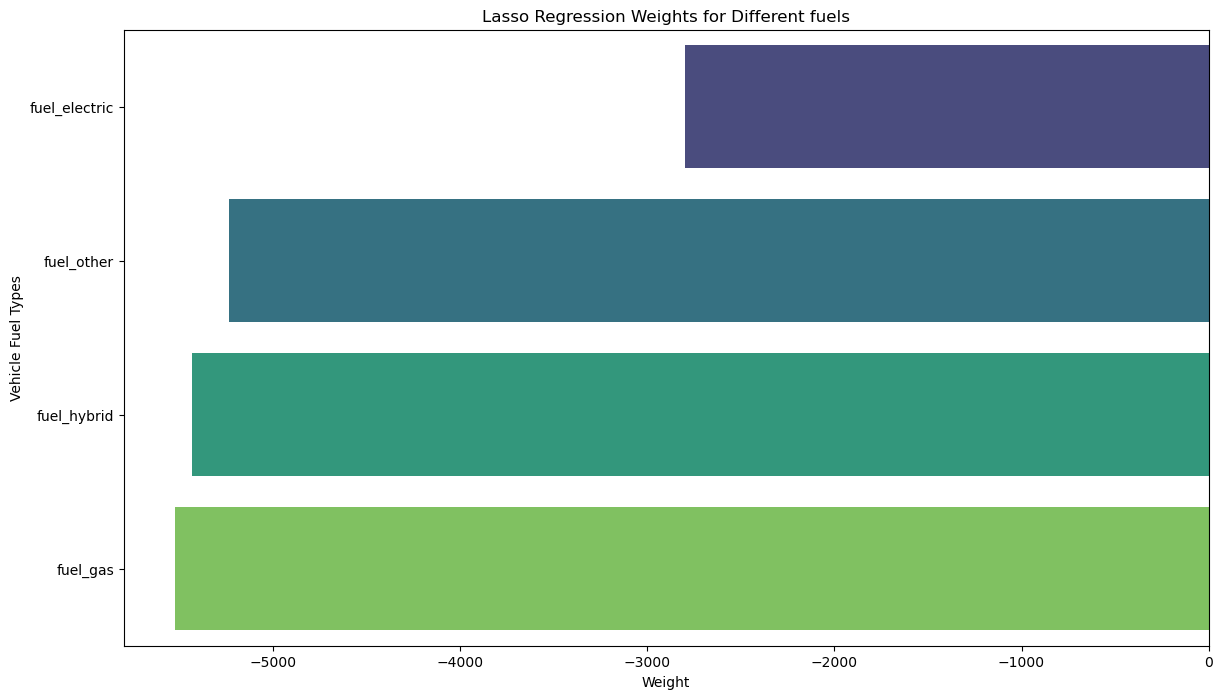

In [121]:
fuel_df = lasso_weights_df.query('Feature.str.startswith("fuel")')
fuel_df = fuel_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=fuel_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Fuel Types')
plt.title('Lasso Regression Weights for Different fuels')
plt.show()

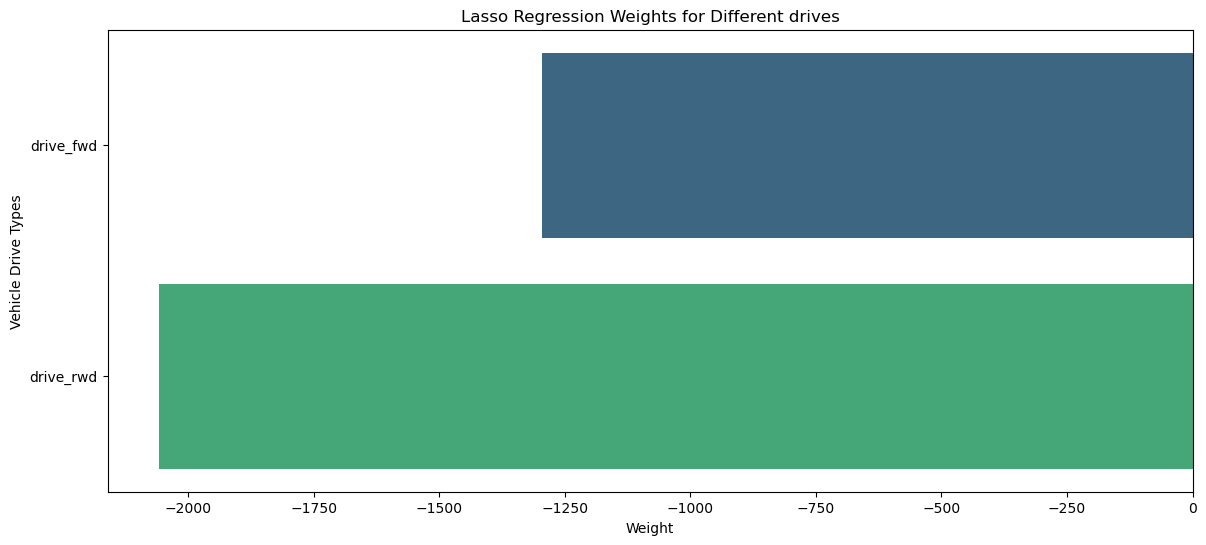

In [122]:
drive_df = lasso_weights_df.query('Feature.str.startswith("drive")')
drive_df = drive_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x='Weight', y='Feature', data=drive_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Drive Types')
plt.title('Lasso Regression Weights for Different drives')
plt.show()

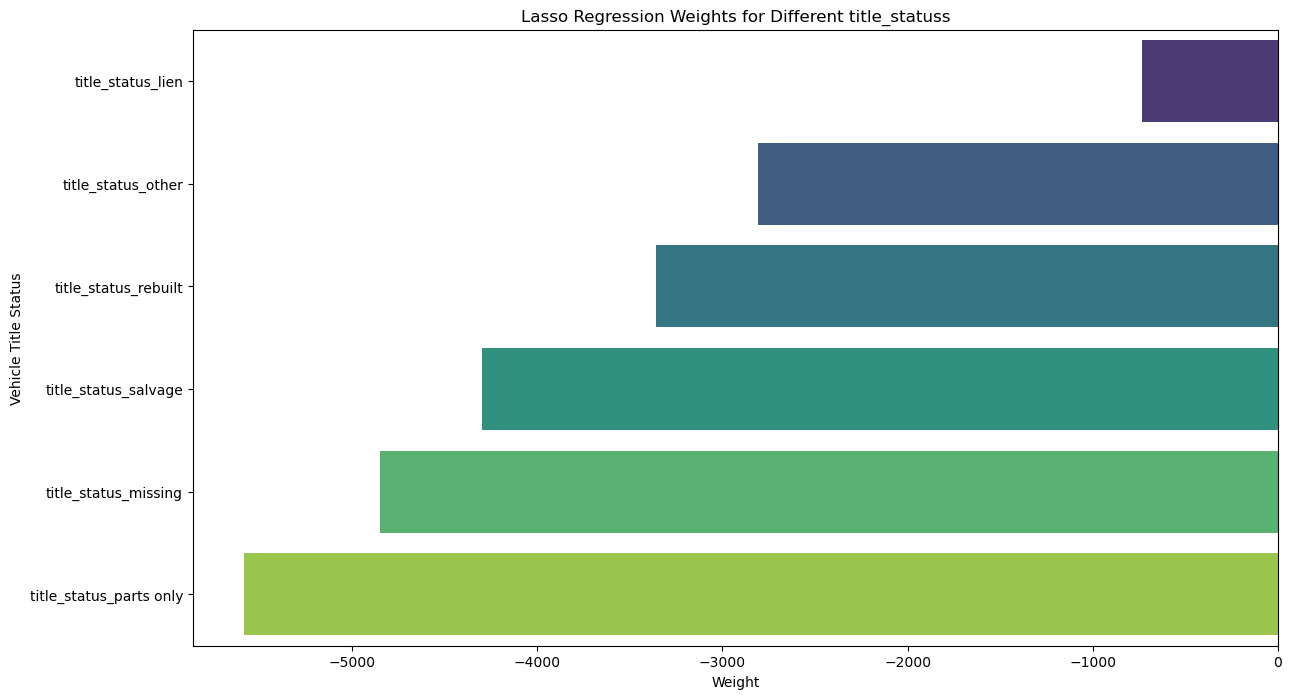

In [123]:
title_status_df = lasso_weights_df.query('Feature.str.startswith("title_status")')
title_status_df = title_status_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=title_status_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Title Status')
plt.title('Lasso Regression Weights for Different title_statuss')
plt.show()

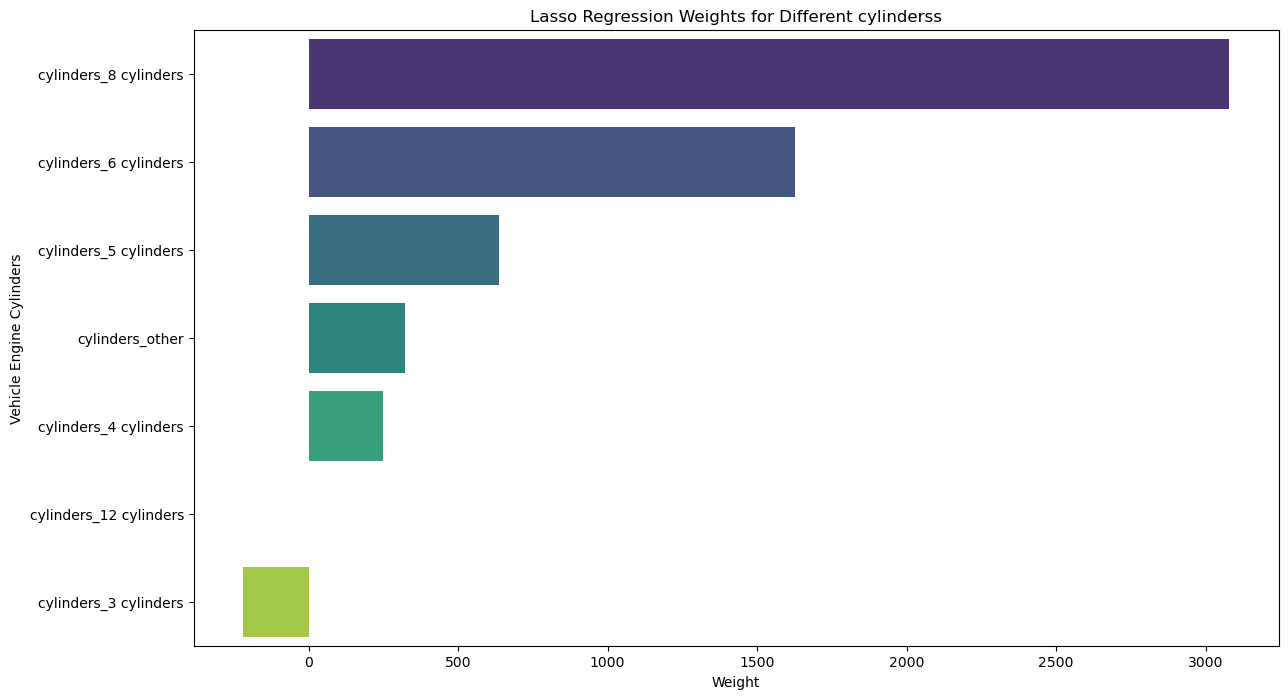

In [124]:
cylinders_df = lasso_weights_df.query('Feature.str.startswith("cylinders")')
cylinders_df = cylinders_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=cylinders_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Engine Cylinders')
plt.title('Lasso Regression Weights for Different cylinderss')
plt.show()

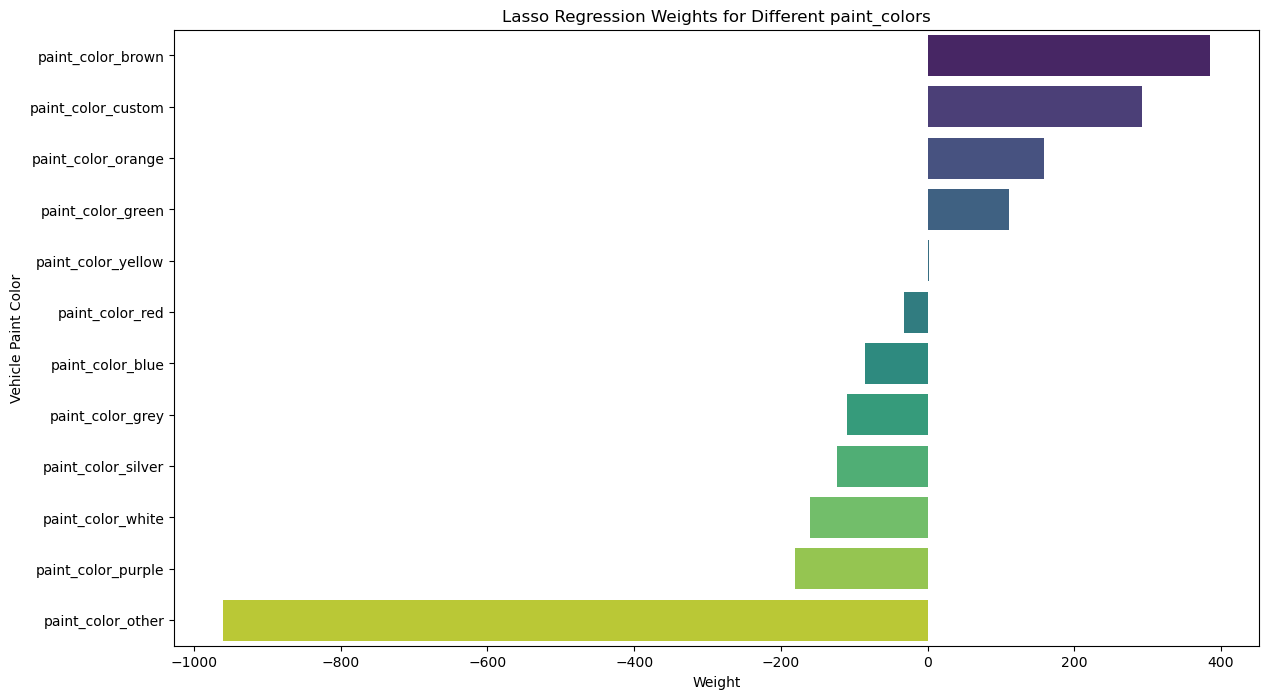

In [125]:
paint_color_df = lasso_weights_df.query('Feature.str.startswith("paint_color")')
paint_color_df = paint_color_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=paint_color_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Paint Color')
plt.title('Lasso Regression Weights for Different paint_colors')
plt.show()

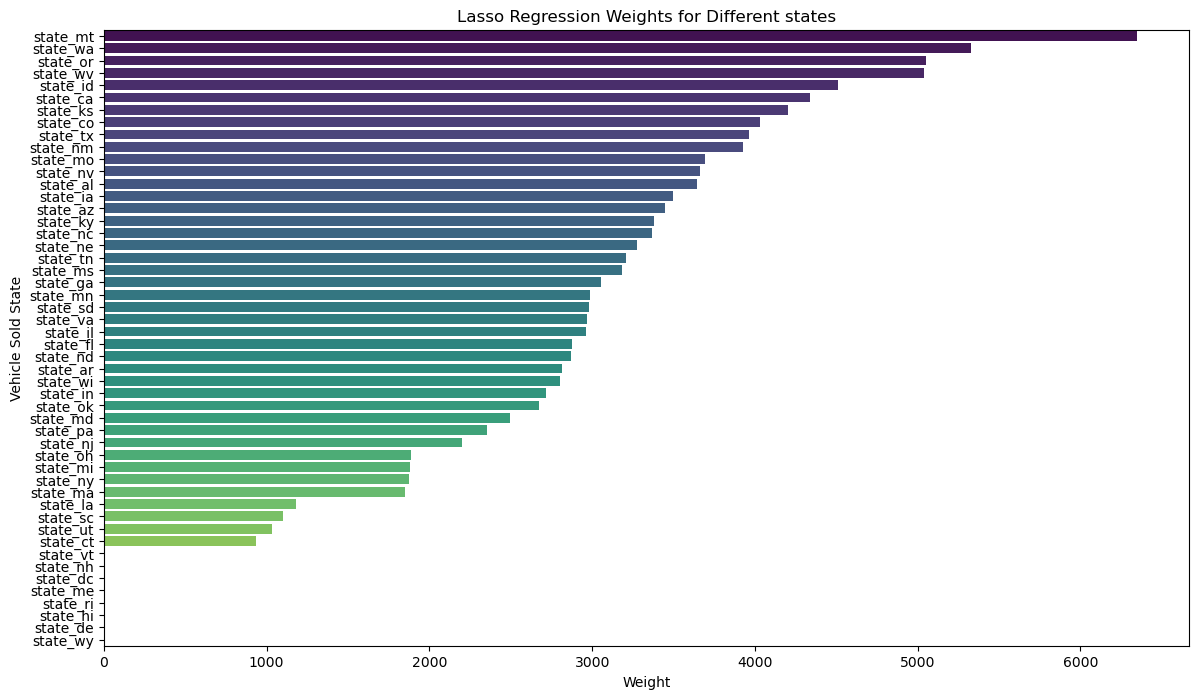

In [126]:
state_df = lasso_weights_df.query('Feature.str.startswith("state")')
state_df = state_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='Weight', y='Feature', data=state_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Sold State')
plt.title('Lasso Regression Weights for Different states')
plt.show()

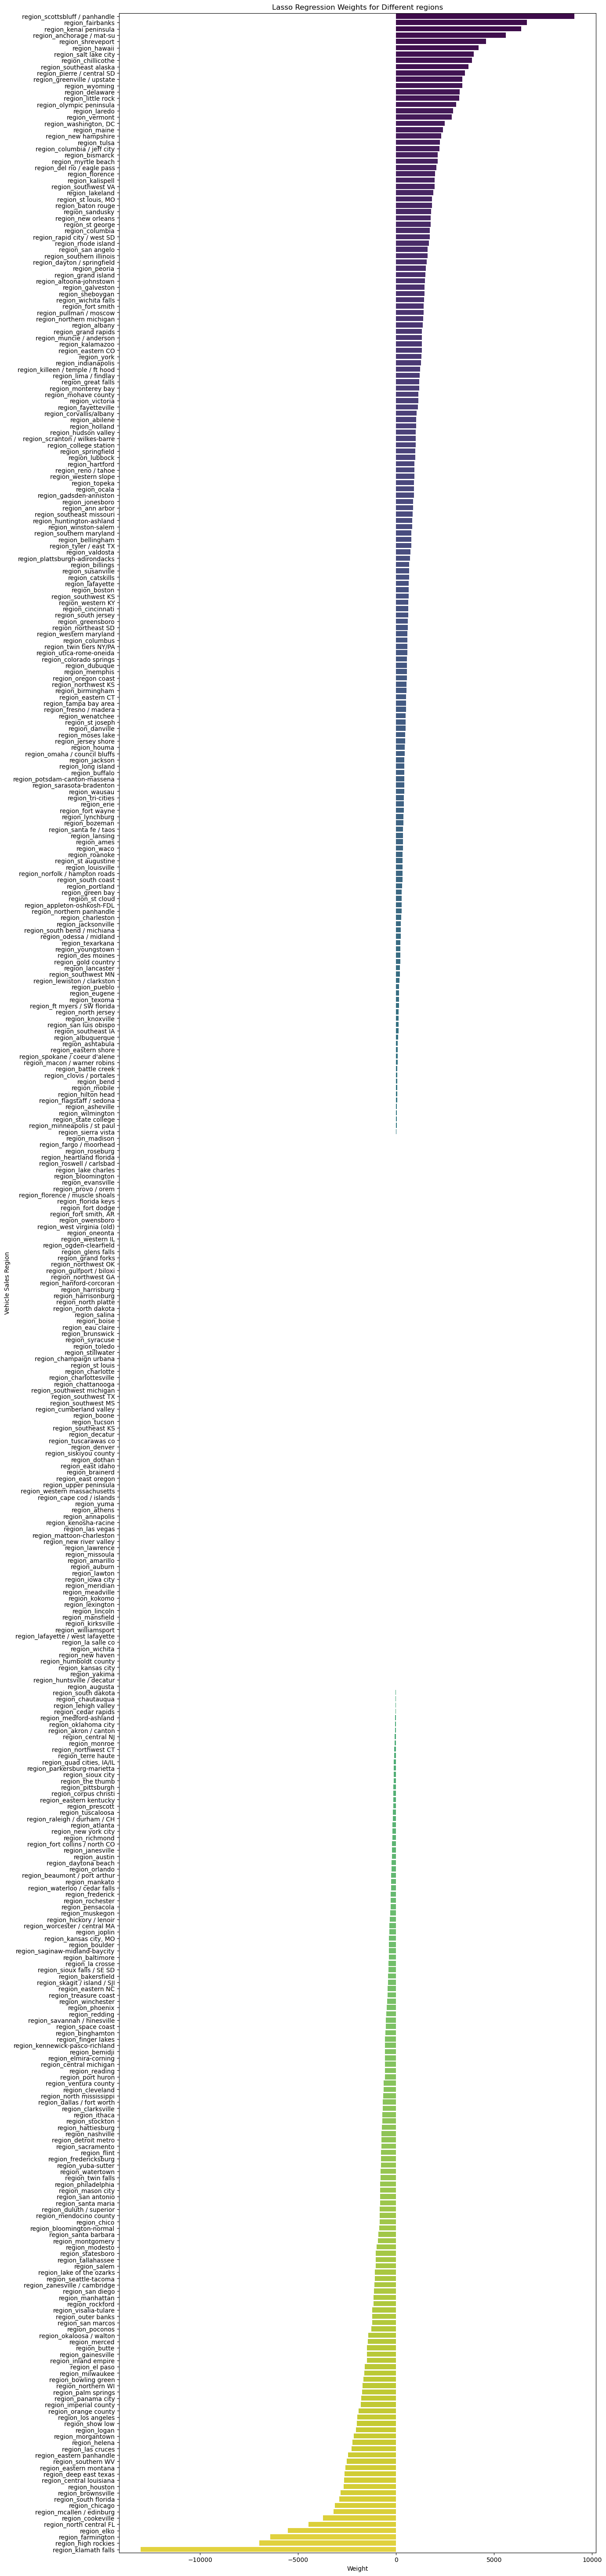

In [127]:
region_df = lasso_weights_df.query('Feature.str.startswith("region")')
region_df = region_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14,75))
sns.barplot(x='Weight', y='Feature', data=region_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Sales Region')
plt.title('Lasso Regression Weights for Different regions')
plt.show()

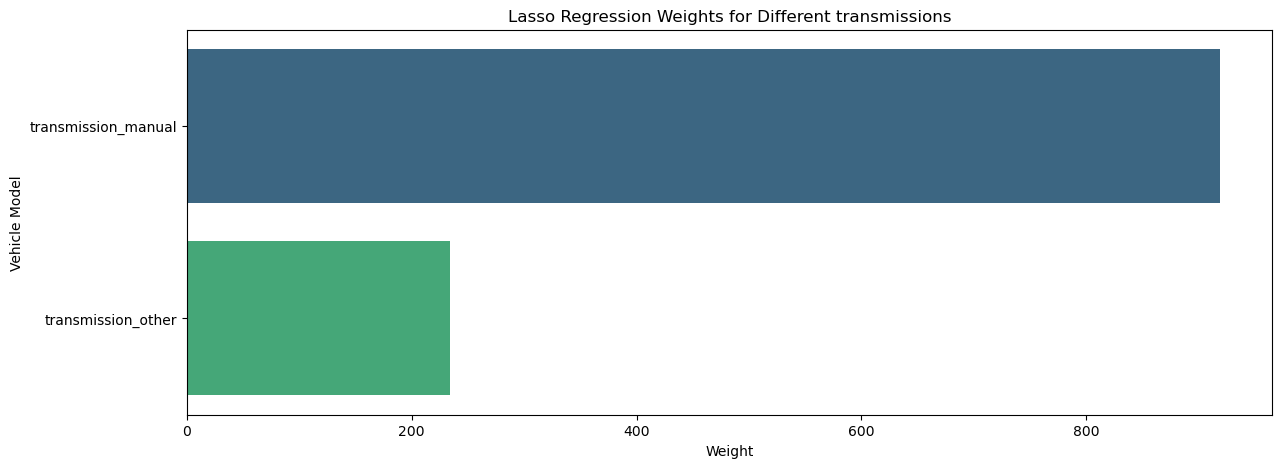

In [128]:
transmission_df = lasso_weights_df.query('Feature.str.startswith("transmission")')
transmission_df = transmission_df.sort_values(by='Weight', ascending=False)
plt.figure(figsize=(14, 5))
sns.barplot(x='Weight', y='Feature', data=transmission_df, palette='viridis')
plt.xlabel('Weight')
plt.ylabel('Vehicle Model')
plt.title('Lasso Regression Weights for Different transmissions')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Lasso Model Evaluation**
- The model is a good representation of the used vehicle data and can predict prices used car vehicles
- The model does not overfit the data as the training and testing mse are similar
- The model does have limitations - findings from the scatter plot of actual vs predicted prices
  - The model does predict negative prices and hence will require manual adjustments
  - For vehicles at lower price points, the model predictions are not very accurate - the gap between predicted and actual values can be quite big
  - For vehicles at higher price points, the model predictions are usually below the actual values hence will need adjustment

**Lasso Model Findings**
- Mileage and Age
  - 1000 additional miles reduces vehicle price by \$46 
  - 1 additional year of vehicle age reduces price by \$1075
- Make and Model
  - MDX is the model that commands a price premium of \$15K
  - Corvette and F350 also command a price premium of \$5K
  - Cruze is a model that needs to be discounted by more than \$10K
  - Chevy, RAM, GMC, Dodge and Mercedes cars commands a price premium of \$20K
- State and Region of sales
  - Vehicles in MT command a premium of \$6K 
  - In WA, OR and WV command a premium of \$5K
  - Vehicles sold in Scottsbluff panhandle region command a premium of around \$10K
  - Vehicles sold in Fairbanks, Kenai Peninsula command a premium of around \$5K
  - Vehicles sold in Klamath fall region need to be discounted by around \$10K
  - Vehicles sold in High Rockies, Farmington, Elko need to be discounted by around \$5K
- Vehicle condition and title
  - Vehicles in fair or salvage condition will need to be discounted by \$1K
  - Vehicles with missing, salvage and parts only title need to be discounted by \$4K to \$5K
- Vehicle type, size, #of cyliders
  - Off road vehicles command a price premium of \$1K
  - Sedans have to be discounted by \$1K
  - Vehicle with 8 cylinders command a premium of \$3K 
  - Vehicle 6 cylinders command a premium of \$1.5K
  - Vehicles that don't fall within the regular compact, midsize or full size command a premium of \$4K
- Vehicle Fuel
  - Gas powered and hybrid vehicles need to discounted by around \$5K
  - Electric vehicles need to be discounted by less than \$2K
- Vehicle color
  - Vehicles with uncommon colors need to be discounted by ~$1K

**Improvement of model -  next steps**
- Model's accuracy is low for lower priced and higher priced cars
  - It is likely that as part of cleaning some of the higher priced and lower priced cars were filtered out, that skewed the training set
- Model's coefficients for vehicle manufacturers are not very intuitive, as the model does not give higher weights to more premium brands, rather higher weights are given to mass-market brands
  - It is likely the model of the car is correlated with the manufacturer of the car and thus the coe
- To further improve the model, we recommend the following :
  - Analyzing the data for lower-priced and higher-priced cars and creating custom data-cleaning procedures
  - Analyzing the data for vehicles with outlier price and mileage data, and create custom data-cleaning procedures so as to retain most of the data
  - Consider combining the manufacturer and model of the car into a single feature and re-running the model

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

**Findings from the used car pricing predictive model**
- Model and Make of the car are the most significant factors in determining price of a used car
  - Consumers value MDX model highly, willing to pay \$15K additional
  - Consumers also value Corvette and F350 willing to pay \$5K premium
  - Consumers don't prefer Cruze model, it needs to be discounted by around \$10K 
  - Consumers have strong preference for Chevy, RAM, GMC, Dodge and Mercedes cars willing to pay \$20K 
- State and Region where the vehicle is sold also has a strong influence in determining price
  - Vehicles sold in MT, WV, OR, WA can command a price premium of \$5K to \\$6K
  - Vehicles sold in Scottsbluff Panhandle region (Nebraska) command a price premium of \$10K
  - Vehicles sold in Fairbanks and Kenai peninsula Alaska command a price premium of \$5K
  - Vehicles sold in Klamath Fall region need to be discounted by \$10K
- Mileage and Year make of the car impact the pricing of the car
  - For every 1000 miles of mileage the price needs to be discounted by \$50
  - Every additional year in the age of the vehicle results in a price discount of \$1075
- Consumers have a strong preference for vehicles with a clean title
  - Vehicles that lack clean titles have to be discounted by \$4K to \\$5K
- Consumers prefer 6 and 8-cylinder cars
  - 8 cylinder cars command a price premium of \$3K 
  - 6 cylinder cars command premium of \$1.5K
- Consumers don't differentiate between hybrid and gas cars; willing to pay additional \$2K for electric cars
- Consumers don't prefer uncommon colors, such vehicles need to be discounted by \$1K

**Using the predictive model**
- The model can give out "negative" price predictions; in these situations you will need to make manual adjustments and use a "floor" price as a minimum
- The model is not very accurate in predicting prices for low priced; for such vehicles recommend making manual adjustments to the predicted price
- The model underestimates the price of very high priced vehicles; in such cases recommend making "upward" adjustment to the predicted price

**Next steps - recommendation**
- Recommend maintaining a log of vehicles sold with the following information: 
  - Vehicle details - make, model, mileage, year, vehicle features
  - Predicted model price
  - The listed price 
  - Actual price it was sold
  - Days car was in inventory
- Recommend reviewing and sharing the data every three months with the model team
- The model team can then take the vehicle sales data and refine the model based on the learnings